In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as m_dates
from itertools import product
import yaml
pd.set_option('display.max_colwidth', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
with open("../config/inputs.yaml") as file:
    cfg = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
output_dir = cfg.get('output_dir')
eval_params = cfg.get('eval_params')
time_horizons = eval_params.get('time_horizons')
metrics = eval_params.get('metrics')
commods = cfg.get('commod_ids')
commods

{'WTIPUUS': 'West Texas Intermediate Spot Average, Crude Oil',
 'BREPUUS': 'Brent Spot Average, Crude Oil',
 'MGWHUUS': 'Gasoline, Liquid Fuels - Refiner prices for resale',
 'DSWHUUS': 'Diesel Fuel, Liquid Fuels - Refiner prices for resale',
 'D2WHUUS': 'Heating Oil, Liquid Fuels - Refiner prices for resale',
 'MGRARUS': 'Gasoline Regular Grade, Liquid Fuels - Retail prices including Texas',
 'MGEIAUS': 'Gasoline All Grades, Liquid Fuels - Retail prices including Texas',
 'DSRTUUS': 'On-highway Diesel Fuel, Liquid Fuels - Retail prices including Texas',
 'D2RCAUS': 'Heating Oil, Liquid Fuels - Retail prices including Texas',
 'NGHHMCF': 'Henry Hub Spot, Natural Gas',
 'NGRCUUS': 'Retail prices - Residential sector, Natural Gas',
 'ESRCUUS': 'Retail prices - residential sector, Electricity'}

In [4]:
def line_plot_date(
        idf: pd.DataFrame,
        x_ax: str,
        y_ax: list,
        title: str,
        labels: tuple,
        markers=None,  # list of tuples: [ (col_name, marker), ... ]
        date_grid_major="y",  # y = years, m = months, d = days
        date_grid_minor="m",  # y = years, m = months, d = days
        date_format="%Y-%m",
        fig_size=(10, 5),
        legend=True,
        vertical_marker=False
):
    df = idf.copy()
    df.reset_index(inplace=True)
    df[x_ax] = pd.to_datetime(df[x_ax])
    years = m_dates.YearLocator()  # every year
    months = m_dates.MonthLocator()  # every month
    days = m_dates.DayLocator()  # every month
    hours = m_dates.HourLocator()  # every hour
    minutes = m_dates.MinuteLocator()  # every minute
    years_fmt = m_dates.DateFormatter(date_format)

    fig, ax = plt.subplots(figsize=fig_size)
    for _y_ax in y_ax:
        ax.plot(x_ax, _y_ax, data=df)

    # plot markers
    markers = {} if markers is None else markers
    for marker_name, marker_info in markers.items():
        # get index values where marker is True
        marker_array = list(df[df[marker_name]].index.values)
        marker_target, marker_shape = marker_info
        marker_color = marker_shape[0]

        # plot markers
        ax.plot(
            df[x_ax],
            df[marker_target],
            marker_shape,
            markersize=12,
            markevery=marker_array
        )
        if vertical_marker:
            for marker_val in marker_array:
                ax.axvline(x=df[x_ax][marker_val], color=marker_color)

    # format the ticks
    loc_map = {"y": years, "m": months, "d": days, "h": hours, "i": minutes}
    ax.xaxis.set_major_locator(loc_map[date_grid_major])
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(loc_map[date_grid_minor])

    # noinspection SpellCheckingInspection
    datemin, datemax = min(df[x_ax]), max(df[x_ax])
    ax.set_xlim(datemin, datemax)

    ax.set(xlabel=labels[0], ylabel=labels[1], title=title)
    ax.grid(True)
    ax.axis('tight')
    if legend:
        ax.legend(
            loc='best', ncol=1, bbox_to_anchor=(1, 0.5)
        )

    fig.autofmt_xdate()

    plt_obj = plt.gcf()
    plt.show()
    print("\n\n")

In [5]:
for (commod_id, commod_name), val_type in product(commods.items(), ("price", "pct")):
    print(f"Sample Data view and Description of {commod_id}_{val_type} ({commod_name})")
    df = pd.read_csv(os.path.join(output_dir, "forecast_evals", f"{commod_id}_{val_type}.csv"))
    display(df.head(10))
    display(df.describe())
    print("\n\n")

Sample Data view and Description of WTIPUUS_price (West Texas Intermediate Spot Average, Crude Oil)


commod_id    ref_date    1M_mae     1M_mse   1M_rmse    1M_mre    2M_mae  \
0   WTIPUUS  2005-01-01  3.840000  14.745601  3.840000  3.840000  4.245001   
1   WTIPUUS  2005-02-01  1.339291   1.793699  1.339291  1.339291  4.563461   
2   WTIPUUS  2005-03-01  3.310001  10.956109  3.310001  3.310001  3.240000   
3   WTIPUUS  2005-04-01  4.020000  16.160404  4.020000  4.020000  5.519999   
4   WTIPUUS  2005-05-01  0.169998   0.028899  0.169998  0.169998  3.134998   
5   WTIPUUS  2005-06-01  4.349998  18.922487  4.349998  4.349998  5.674999   
6   WTIPUUS  2005-07-01  0.500000   0.250000  0.500000  0.500000  3.200001   
7   WTIPUUS  2005-08-01  6.031883  36.383615  6.031883  6.031883  5.997164   
8   WTIPUUS  2005-09-01  4.010002  16.080117  4.010002  4.010002  5.150003   
9   WTIPUUS  2005-10-01  1.490002   2.220105  1.490002  1.490002  3.835001   

      2M_mse   2M_rmse    2M_mre  ...   6M_rmse     6M_mre     9M_mae  \
0  18.184058  4.264277  4.650002  ...  8.818143  13.209999  12.162222   
1  31.220456  5.587527  7.787632  ...  8.359654  13.593197  11.347237   
2  10.502499  3.240756  3.310001  ...  8.312998  15.850002   8.816666   
3  32.720378  5.720173  7.019997  ...  6.226146   9.339996   4.879999   
4  18.619440  4.315025  6.099998  ...  9.446049  13.489998   8.369999   
5  33.961243  5.827628  7.000000  ...  8.316355  12.489998   7.698888   
6  17.530009  4.186885  5.900002  ...  3.652728   5.989998   3.971110   
7  35.981527  5.998460  6.121880  ...  5.274226   8.757442   6.007323   
8  27.822138  5.274669  6.290005  ...  5.947253  10.029999   5.150002   
9  20.206254  4.495137  6.180000  ...  3.642111   6.180000   4.126668   

       9M_mse    9M_rmse     9M_mre    12M_mae     12M_mse   12M_rmse  \
0  191.196988  13.827400  22.729996  13.451666  219.040944  14.800032   
1  172.880610  13.148407  20.732365  12.759451  204.577387  14.303055   
2  108.767005  10.429142  16.729996  10.132499  132.779778  11.523011   
3   32.139580   5.669178   9.339996   5.601666   39.778139   6.306991   
4   87.398751   9.348730  13.489998   9.465833  109.328809  10.456042   
5   69.278533   8.323373  12.489998   9.271667  104.190188  10.207360   
6   22.609774   4.754974   7.980003   6.455833   65.363312   8.084758   
7   50.883023   7.133234  14.485962   8.501972  102.426201  10.120583   
8   37.469363   6.121222  10.029999   6.270835   51.802210   7.197375   
9   23.673784   4.865571   7.089996   4.753335   32.259696   5.679762   

     12M_mre  
0  22.729996  
1  21.575672  
2  17.380005  
3   9.830002  
4  17.690010  
5  17.339996  
6  14.339996  
7  17.691715  
8  11.410004  
9  10.160004  

[10 rows x 26 columns]

1M_mae      1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  195.000000  195.000000  195.000000  194.000000   
mean     3.177063   19.191853    3.177063    3.177063    4.965624   
std      3.024073   61.327503    3.024073    3.024073    4.362529   
min      0.000000    0.000000    0.000000    0.000000    0.470000   
25%      1.219500    1.487181    1.219500    1.219500    2.326250   
50%      2.510000    6.300100    2.510000    2.510000    3.718750   
75%      4.125001   17.015661    4.125001    4.125001    6.003416   
max     28.390000  805.992100   28.390000   28.390000   38.540000   

            2M_mse     2M_rmse      2M_mre      3M_mae       3M_mse  ...  \
count   194.000000  194.000000  194.000000  193.000000   193.000000  ...   
mean     52.346365    5.479053    6.988225    6.348010    92.623838  ...   
std     139.317939    4.737302    6.173249    5.773800   253.049830  ...   
min       0.240500    0.490408    0.610000    0.843333     0.771367  ...   
25%       6.492201    2.547672    3.142500    3.023335    12.349367  ...   
50%      18.982446    4.356860    5.690000    4.680000    28.437810  ...   
75%      41.513812    6.443121    8.455000    7.820000    78.264667  ...   
max    1588.354100   39.854160   48.690000   48.066667  2560.600867  ...   

          6M_rmse      6M_mre      9M_mae       9M_mse     9M_rmse  \
count  190.000000  190.000000  187.000000   187.000000  187.000000   
mean    10.764592   16.828376   11.223824   309.623974   13.037408   
std     10.148800   14.938384   10.636821   786.984561   11.849083   
min      1.875751    2.780000    2.667556     8.936196    2.989347   
25%      5.293869    8.030000    5.211112    36.977853    6.080924   
50%      7.913679   12.951000    7.892077    87.398751    9.348730   
75%     11.942158   18.677500   12.386556   208.595750   14.442778   
max     66.522534  103.120000   69.455556  5980.870511   77.336088   

           9M_mre     12M_mae      12M_mse    12M_rmse     12M_mre  
count  187.000000  184.000000   184.000000  184.000000  184.000000  
mean    21.349126   12.582997   368.025172   14.670925   24.979191  
std     16.773850   11.263413   796.372404   12.394517   17.858971  
min      4.468000    2.520917     7.848242    2.801471    4.468000  
25%     10.790000    5.841667    49.229875    7.016397   13.290000  
50%     15.981000    8.968334   109.718508   10.474644   18.265001  
75%     25.605000   14.078646   318.796415   17.854390   31.700250  
max    102.880000   70.720833  5894.173358   76.773520  102.880000  

[8 rows x 24 columns]




Sample Data view and Description of WTIPUUS_pct (West Texas Intermediate Spot Average, Crude Oil)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   WTIPUUS  2005-01-01  0.088238  0.007786  0.088238  0.088238  0.052289   
1   WTIPUUS  2005-02-01  0.028593  0.000818  0.028593  0.028593  0.081343   
2   WTIPUUS  2005-03-01  0.068744  0.004726  0.068744  0.068744  0.034950   
3   WTIPUUS  2005-04-01  0.074020  0.005479  0.074020  0.074020  0.065422   
4   WTIPUUS  2005-05-01  0.003209  0.000010  0.003209  0.003209  0.064527   
5   WTIPUUS  2005-06-01  0.087297  0.007621  0.087297  0.087297  0.067162   
6   WTIPUUS  2005-07-01  0.008873  0.000079  0.008873  0.008873  0.050163   
7   WTIPUUS  2005-08-01  0.102235  0.010452  0.102235  0.102235  0.054479   
8   WTIPUUS  2005-09-01  0.063187  0.003993  0.063187  0.063187  0.049435   
9   WTIPUUS  2005-10-01  0.022717  0.000516  0.022717  0.022717  0.048882   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.004026  0.063454  0.088238  ...  0.087956  0.132927  0.067438  0.006557   
1  0.009399  0.096950  0.134093  ...  0.084501  0.136928  0.065301  0.006294   
2  0.002364  0.048616  0.068744  ...  0.080620  0.134674  0.059244  0.005024   
3  0.004354  0.065985  0.074020  ...  0.081315  0.133483  0.062018  0.005125   
4  0.007924  0.089015  0.125845  ...  0.070386  0.125845  0.057985  0.004981   
5  0.004916  0.070115  0.087297  ...  0.068031  0.091910  0.063012  0.004761   
6  0.004221  0.064971  0.091453  ...  0.047787  0.092978  0.045841  0.003236   
7  0.005397  0.073462  0.103761  ...  0.068355  0.112442  0.058778  0.005017   
8  0.002633  0.051312  0.063187  ...  0.068817  0.124542  0.060176  0.004989   
9  0.003074  0.055445  0.075048  ...  0.055403  0.098140  0.045503  0.003550   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.080972  0.132927  0.061480  0.005463  0.073914  0.132927  
1  0.079334  0.136928  0.064536  0.005957  0.077185  0.136928  
2  0.070877  0.134674  0.059711  0.004995  0.070673  0.134674  
3  0.071588  0.133483  0.061570  0.005052  0.071077  0.133483  
4  0.070577  0.125845  0.058796  0.004985  0.070608  0.125845  
5  0.068997  0.106573  0.060119  0.004628  0.068026  0.107673  
6  0.056882  0.110607  0.045635  0.003573  0.059775  0.116522  
7  0.070834  0.118381  0.049050  0.003901  0.062460  0.118381  
8  0.070634  0.124542  0.051929  0.004001  0.063256  0.124542  
9  0.059582  0.115516  0.051560  0.004419  0.066478  0.134228  

[10 rows x 26 columns]

1M_mae      1M_mse     1M_rmse      1M_mre      2M_mae      2M_mse  \
count  195.000000  195.000000  195.000000  195.000000  194.000000  194.000000   
mean     0.050130    0.004911    0.050130    0.050130    0.061735    0.008409   
std      0.049100    0.013505    0.049100    0.049100    0.052048    0.022338   
min      0.000000    0.000000    0.000000    0.000000    0.004550    0.000040   
25%      0.018063    0.000326    0.018063    0.018063    0.030689    0.001176   
50%      0.037433    0.001401    0.037433    0.037433    0.047680    0.002995   
75%      0.065841    0.004336    0.065841    0.065841    0.078985    0.007870   
max      0.396375    0.157113    0.396375    0.396375    0.409422    0.252457   

          2M_rmse      2M_mre      3M_mae      3M_mse  ...     6M_rmse  \
count  194.000000  194.000000  193.000000  193.000000  ...  190.000000   
mean     0.069929    0.090431    0.065881    0.009823  ...    0.085747   
std      0.059471    0.078714    0.053356    0.025254  ...    0.061412   
min      0.006330    0.008950    0.005222    0.000041  ...    0.023146   
25%      0.034289    0.044656    0.035161    0.001943  ...    0.051436   
50%      0.054726    0.072639    0.051758    0.003789  ...    0.069334   
75%      0.088713    0.112364    0.078310    0.008318  ...    0.089193   
max      0.502451    0.700680    0.394874    0.222375  ...    0.413588   

           6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre     12M_mae  \
count  190.000000  187.000000  187.000000  187.000000  187.000000  184.000000   
mean     0.149898    0.070896    0.011616    0.089752    0.174036    0.071464   
std      0.113888    0.042772    0.020892    0.059831    0.133768    0.039161   
min      0.042795    0.022893    0.001005    0.031697    0.054999    0.027327   
25%      0.092943    0.044345    0.003391    0.058230    0.111826    0.046221   
50%      0.120558    0.058642    0.004833    0.069521    0.132927    0.058958   
75%      0.159604    0.081376    0.009834    0.099168    0.194858    0.084268   
max      0.759868    0.245465    0.114894    0.338960    0.759868    0.201888   

          12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  
mean     0.011862    0.092325    0.192765  
std      0.018750    0.057931    0.148638  
min      0.001238    0.035179    0.068117  
25%      0.003571    0.059755    0.120216  
50%      0.005214    0.072204    0.138784  
75%      0.010979    0.104780    0.216883  
max      0.088143    0.296890    0.759868  

[8 rows x 24 columns]




Sample Data view and Description of BREPUUS_price (Brent Spot Average, Crude Oil)


commod_id    ref_date   1M_mae     1M_mse  1M_rmse   1M_mre    2M_mae  \
0   BREPUUS  2012-07-01  3.62000  13.104400  3.62000  3.62000  8.990000   
1   BREPUUS  2012-08-01  8.36000  69.889600  8.36000  8.36000  9.110000   
2   BREPUUS  2012-09-01  0.14000   0.019600  0.14000  0.14000  0.214565   
3   BREPUUS  2012-10-01  0.28913   0.083596  0.28913  0.28913  1.114565   
4   BREPUUS  2012-11-01  0.06000   0.003600  0.06000  0.06000  0.245000   
5   BREPUUS  2012-12-01  0.93000   0.864900  0.93000  0.93000  2.945000   
6   BREPUUS  2013-01-01  1.96000   3.841600  1.96000  1.96000  4.490000   
7   BREPUUS  2013-02-01  0.02000   0.000400  0.02000  0.02000  3.230000   
8   BREPUUS  2013-03-01  1.44000   2.073600  1.44000  1.44000  4.140000   
9   BREPUUS  2013-04-01  6.75000  45.562500  6.75000  6.75000  6.095000   

       2M_mse    2M_rmse    2M_mre  ...    6M_rmse  6M_mre     9M_mae  \
0  109.657000  10.471724  14.36000  ...  11.288840   14.36  12.120097   
1   83.554600   9.140821   9.86000  ...   9.601731   13.46   9.346763   
2    0.051598   0.227152   0.28913  ...   5.180310   11.02   2.937681   
3    1.923598   1.386938   1.94000  ...   5.655494   11.02   2.931014   
4    0.094250   0.307002   0.43000  ...   5.592166   11.02   3.192222   
5   12.733250   3.568368   4.96000  ...   4.943074   10.02   3.661111   
6   26.561000   5.153737   7.02000  ...   3.642925    7.02   4.061833   
7   20.737000   4.553790   6.44000  ...   6.327596   10.75   4.636944   
8   23.951700   4.894047   6.75000  ...   4.198545    6.75   3.608056   
9   37.578050   6.130094   6.75000  ...   4.692434    6.75   4.522500   

       9M_mse    9M_rmse   9M_mre    12M_mae     12M_mse   12M_rmse  12M_mre  
0  163.217004  12.775641  18.5200  10.226739  127.502736  11.291711    18.52  
1  101.288135  10.064201  16.5200   8.093406   81.985452   9.054582    16.55  
2   21.298966   4.615080  11.0200   3.234928   22.713975   4.765918    11.05  
3   21.297500   4.614921  11.0200   3.897969   28.175117   5.308024    11.05  
4   23.130678   4.809436  11.0500   4.306875   32.027299   5.659267    11.05  
5   23.974544   4.896381  10.0500   4.451042   29.755966   5.454903    10.05  
6   22.148624   4.706232   7.5965   4.848542   29.972424   5.474708     8.76  
7   31.286532   5.593437  10.7500   4.616875   29.336241   5.416294    10.75  
8   16.015599   4.001949   6.7500   4.104375   20.135199   4.487226     6.76  
9   23.198788   4.816512   6.7600   4.600208   23.386991   4.836010     6.76  

[10 rows x 26 columns]

1M_mae      1M_mse     1M_rmse      1M_mre      2M_mae      2M_mse  \
count  105.000000  105.000000  105.000000  105.000000  104.000000  104.000000   
mean     2.939120   13.686410    2.939120    2.939120    4.649597   39.790998   
std      2.257547   18.904475    2.257547    2.257547    3.273219   54.821010   
min      0.020000    0.000400    0.020000    0.020000    0.214565    0.051598   
25%      1.380000    1.904400    1.380000    1.380000    2.022500    4.410025   
50%      2.250000    5.062500    2.250000    2.250000    3.937750   20.626675   
75%      4.270000   18.232900    4.270000    4.270000    6.364563   44.780717   
max      9.575000   91.680625    9.575000    9.575000   14.287500  289.993040   

          2M_rmse      2M_mre      3M_mae      3M_mse  ...     6M_rmse  \
count  104.000000  104.000000  103.000000  103.000000  ...  100.000000   
mean     5.145883    6.623275    5.899761   69.161962  ...    9.529527   
std      3.666076    4.877533    4.314682  114.643739  ...    7.023690   
min      0.227152    0.289130    0.789710    1.179142  ...    1.731949   
25%      2.099978    2.737500    2.756833   11.794005  ...    4.933320   
50%      4.541658    5.810000    4.724000   28.349742  ...    7.507149   
75%      6.687093    8.455000    8.017167   76.679698  ...   11.753753   
max     17.029182   24.080500   21.598333  662.828993  ...   37.361945   

           6M_mre     9M_mae       9M_mse    9M_rmse     9M_mre    12M_mae  \
count  100.000000  97.000000    97.000000  97.000000  97.000000  94.000000   
mean    15.114500   9.901357   201.210439  11.611737  19.926747  11.543728   
std     11.253654   7.229898   310.855384   8.189593  13.715260   8.137957   
min      2.520000   2.594667     9.226832   3.037570   4.870000   3.001500   
25%      7.526875   4.563611    26.616888   5.159156   9.870000   5.006979   
50%     11.280000   7.640000    87.689865   9.364287  15.770000   9.562917   
75%     17.945000  12.837889   205.331845  14.329405  22.730000  15.466333   
max     59.240500  36.328556  1535.054439  39.179771  59.240000  40.268583   

           12M_mse   12M_rmse    12M_mre  
count    94.000000  94.000000  94.000000  
mean    270.419880  13.654553  24.163973  
std     369.901788   9.212817  15.549534  
min      13.537146   3.679286   6.760000  
25%      33.764988   5.810480  11.117000  
50%     139.104241  11.794216  20.032000  
75%     360.330367  18.982244  36.688750  
max    1794.784912  42.364902  59.240000  

[8 rows x 24 columns]




Sample Data view and Description of BREPUUS_pct (Brent Spot Average, Crude Oil)


commod_id    ref_date    1M_mae        1M_mse   1M_rmse    1M_mre    2M_mae  \
0   BREPUUS  2012-07-01  0.038041  1.447132e-03  0.038041  0.038041  0.071350   
1   BREPUUS  2012-08-01  0.081466  6.636644e-03  0.081466  0.081466  0.048051   
2   BREPUUS  2012-09-01  0.001235  1.525234e-06  0.001235  0.001235  0.001284   
3   BREPUUS  2012-10-01  0.002562  6.563077e-06  0.002562  0.002562  0.008682   
4   BREPUUS  2012-11-01  0.000537  2.884773e-07  0.000537  0.000537  0.001965   
5   BREPUUS  2012-12-01  0.008527  7.271683e-05  0.008527  0.008527  0.022697   
6   BREPUUS  2013-01-01  0.017911  3.208037e-04  0.017911  0.017911  0.031509   
7   BREPUUS  2013-02-01  0.000177  3.134806e-08  0.000177  0.000177  0.027928   
8   BREPUUS  2013-03-01  0.012412  1.540491e-04  0.012412  0.012412  0.030720   
9   BREPUUS  2013-04-01  0.061396  3.769481e-03  0.061396  0.061396  0.036801   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.006200  0.078741  0.104658  ...  0.047239  0.104658  0.037171  0.002333   
1  0.003425  0.058527  0.081466  ...  0.040386  0.081466  0.036143  0.002072   
2  0.000002  0.001285  0.001332  ...  0.029826  0.050607  0.026841  0.001195   
3  0.000113  0.010622  0.014801  ...  0.035092  0.050607  0.027230  0.001197   
4  0.000006  0.002429  0.003393  ...  0.040979  0.057343  0.028283  0.001335   
5  0.000716  0.026757  0.036866  ...  0.036364  0.047728  0.029109  0.001160   
6  0.001178  0.034318  0.045107  ...  0.034182  0.047997  0.029527  0.001229   
7  0.001550  0.039371  0.055679  ...  0.039819  0.057938  0.028149  0.001145   
8  0.001251  0.035371  0.048252  ...  0.030716  0.048679  0.020525  0.000665   
9  0.001959  0.044263  0.061396  ...  0.035172  0.061396  0.022516  0.000911   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.048303  0.104658  0.033694  0.002085  0.045665  0.104658  
1  0.045515  0.081466  0.031334  0.001714  0.041398  0.081466  
2  0.034567  0.057343  0.026703  0.001139  0.033744  0.057343  
3  0.034592  0.057343  0.026939  0.001140  0.033758  0.057343  
4  0.036532  0.057343  0.024710  0.001087  0.032975  0.057343  
5  0.034064  0.047728  0.023331  0.000883  0.029723  0.047728  
6  0.035056  0.048679  0.025704  0.000997  0.031583  0.048679  
7  0.033839  0.057938  0.026384  0.001021  0.031956  0.057938  
8  0.025794  0.048679  0.021872  0.000685  0.026163  0.048679  
9  0.030189  0.061396  0.021363  0.000769  0.027724  0.061396  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  105.000000  1.050000e+02  105.000000  105.000000  104.000000   
mean     0.051165  4.801277e-03    0.051165    0.051165    0.064635   
std      0.046951  9.280731e-03    0.046951    0.046951    0.056241   
min      0.000177  3.134806e-08    0.000177    0.000177    0.001284   
25%      0.017911  3.208037e-04    0.017911    0.017911    0.030713   
50%      0.039314  1.545557e-03    0.039314    0.039314    0.053072   
75%      0.070040  4.905577e-03    0.070040    0.070040    0.077635   
max      0.272001  7.398467e-02    0.272001    0.272001    0.353479   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  104.000000  104.000000  104.000000  103.000000  103.000000  ...   
mean     0.009335    0.072288    0.093020    0.068663    0.011209  ...   
std      0.021768    0.064414    0.085312    0.060521    0.026362  ...   
min      0.000002    0.001285    0.001332    0.005790    0.000074  ...   
25%      0.001102    0.033196    0.041257    0.033324    0.001491  ...   
50%      0.003493    0.059103    0.076962    0.051001    0.004134  ...   
75%      0.007544    0.086858    0.113231    0.080946    0.009013  ...   
max      0.174576    0.417823    0.576254    0.359206    0.168137  ...   

          6M_rmse      6M_mre     9M_mae     9M_mse    9M_rmse     9M_mre  \
count  100.000000  100.000000  97.000000  97.000000  97.000000  97.000000   
mean     0.089241    0.155897   0.075244   0.014012   0.095780   0.185942   
std      0.071461    0.127345   0.050758   0.023065   0.069920   0.147157   
min      0.016753    0.025999   0.014268   0.000322   0.017943   0.036988   
25%      0.046770    0.078666   0.045476   0.002759   0.052523   0.090527   
50%      0.072975    0.115877   0.064160   0.006361   0.079756   0.168514   
75%      0.098731    0.193761   0.089519   0.013436   0.115913   0.215257   
max      0.379090    0.629727   0.236467   0.097607   0.312421   0.629727   

         12M_mae    12M_mse   12M_rmse    12M_mre  
count  94.000000  94.000000  94.000000  94.000000  
mean    0.076319   0.014566   0.100023   0.211358  
std     0.046391   0.020807   0.067901   0.161303  
min     0.017880   0.000482   0.021956   0.038552  
25%     0.049962   0.003271   0.057190   0.099424  
50%     0.067389   0.007250   0.085149   0.191242  
75%     0.094122   0.014222   0.119255   0.230011  
max     0.198269   0.075632   0.275013   0.629727  

[8 rows x 24 columns]




Sample Data view and Description of MGWHUUS_price (Gasoline, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date     1M_mae      1M_mse    1M_rmse     1M_mre  \
0   MGWHUUS  2005-01-01   4.949112   24.493709   4.949112   4.949112   
1   MGWHUUS  2005-02-01   0.795715    0.633163   0.795715   0.795715   
2   MGWHUUS  2005-03-01   5.813217   33.793494   5.813217   5.813217   
3   MGWHUUS  2005-04-01  24.885696  619.297886  24.885696  24.885696   
4   MGWHUUS  2005-05-01   4.376114   19.150373   4.376114   4.376114   
5   MGWHUUS  2005-06-01   7.038803   49.544749   7.038803   7.038803   
6   MGWHUUS  2005-07-01   7.403122   54.806215   7.403122   7.403122   
7   MGWHUUS  2005-08-01  18.192810  330.978338  18.192810  18.192810   
8   MGWHUUS  2005-09-01  10.543518  111.165773  10.543518  10.543518   
9   MGWHUUS  2005-10-01  26.446716  699.428804  26.446716  26.446716   

      2M_mae       2M_mse    2M_rmse     2M_mre  ...    6M_rmse     6M_mre  \
0  10.890663   134.192088  11.584131  14.838516  ...  20.343205  31.143494   
1   6.452446    54.053026   7.352076   9.976501  ...  18.099512  27.254562   
2   7.103951    64.741875   8.046234  10.882278  ...  20.072512  43.413712   
3  15.565613   273.423530  16.535523  21.145508  ...  33.230833  69.849594   
4  11.339012   129.706760  11.388888  12.403702  ...  42.843703  79.211685   
5  11.149841   125.553367  11.205060  12.260880  ...  37.960798  69.670502   
6  13.161804   206.658764  14.375631  18.943298  ...  23.581356  46.584702   
7  39.291901  1711.509246  41.370391  52.240097  ...  27.394716  48.040100   
8  12.086205   148.456221  12.184261  13.628891  ...  18.266944  32.724594   
9  35.901268  1378.289592  37.125323  45.355820  ...  25.813586  44.055801   

      9M_mae       9M_mse    9M_rmse      9M_mre    12M_mae      12M_mse  \
0  34.991379  2171.589082  46.600312  102.596497  38.248711  2181.994681   
1  35.294573  2042.344736  45.192308   96.303009  37.876306  2050.460425   
2  27.694928  1382.706337  37.184759   81.418091  29.612606  1375.360443   
3  21.130819   820.189503  28.638951   65.649597  20.091417   718.737285   
4  31.766091  1412.294227  37.580503   75.011688  32.383841  1455.847836   
5  27.468079  1138.703041  33.744674   69.670502  32.058551  1453.084345   
6  15.220101   445.345549  21.103212   46.584702  24.386222   980.977095   
7  24.329954   893.490359  29.891309   54.257813  33.381397  1605.412072   
8  18.626012   482.231914  21.959779   34.595612  27.201614  1069.138972   
9  24.207431   737.298150  27.153235   44.055801  27.697760   998.971213   

    12M_rmse    12M_mre  
0  46.711826  98.396500  
1  45.282010  92.103012  
2  37.085852  81.418091  
3  26.809276  65.649597  
4  38.155574  75.011688  
5  38.119343  69.670502  
6  31.320554  50.656097  
7  40.067594  68.614426  
8  32.697691  64.242020  
9  31.606506  55.126816  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000   195.000000  195.000000  195.000000  194.000000   
mean     8.648436   149.227019    8.648436    8.648436   13.667187   
std      8.649580   569.515272    8.649580    8.649580   12.426129   
min      0.150200     0.022560    0.150200    0.150200    0.695300   
25%      3.069450     9.426992    3.069450    3.069450    5.860437   
50%      6.509900    42.378798    6.509900    6.509900   11.226571   
75%     12.166750   148.041807   12.166750   12.166750   17.784100   
max     88.092500  7760.288556   88.092500   88.092500  122.130250   

             2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count    194.000000  194.000000  194.000000  193.000000    193.000000  ...   
mean     412.448578   15.174019   19.446316   16.701573    653.658169  ...   
std     1249.919502   13.532987   17.497688   14.651824   1851.960180  ...   
min        0.510601    0.714564    0.860100    1.199067      1.866066  ...   
25%       37.279172    6.105461    7.975278    7.710767     82.929899  ...   
50%      148.716694   12.194945   15.758052   14.577300    271.146287  ...   
75%      374.844548   19.360010   24.227725   21.243700    616.189963  ...   
max    15823.220205  125.790382  152.253700  132.625167  19817.750064  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  190.000000  190.000000  187.000000    187.000000  187.000000   
mean    27.176948   43.924123   27.604910   1799.856336   32.817269   
std     24.104191   36.828435   23.834263   4290.698574   26.958666   
min      2.643814    5.263900    5.566356     46.485772    6.818048   
25%     14.745440   24.689326   14.469644    334.446166   18.285922   
50%     22.106647   35.601000   22.223733    683.634131   26.146398   
75%     30.587127   46.940300   30.980604   1344.118881   36.658449   
max    157.903533  249.123000  157.112833  31706.250261  178.062490   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  187.000000  184.000000    184.000000  184.000000  184.000000  
mean    56.091779   30.960198   2105.232488   36.706198   64.630547  
std     40.563647   24.791581   4268.068170   27.604873   42.328461  
min     11.281100    6.908883     74.784617    8.647810   15.065300  
25%     32.615250   16.185637    376.091803   19.393070   35.994750  
50%     42.687000   23.614447    785.838795   28.032159   50.470848  
75%     66.018500   38.014759   2199.705416   46.899886   82.221225  
max    250.004000  160.811142  31326.347930  176.992508  250.004000  

[8 rows x 24 columns]




Sample Data view and Description of MGWHUUS_pct (Gasoline, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   MGWHUUS  2005-01-01  0.114348  0.013076  0.114348  0.114348  0.089272   
1   MGWHUUS  2005-02-01  0.010069  0.000101  0.010069  0.010069  0.064237   
2   MGWHUUS  2005-03-01  0.039099  0.001529  0.039099  0.039099  0.074500   
3   MGWHUUS  2005-04-01  0.189557  0.035932  0.189557  0.189557  0.102040   
4   MGWHUUS  2005-05-01  0.068451  0.004685  0.068451  0.068451  0.044104   
5   MGWHUUS  2005-06-01  0.006391  0.000041  0.006391  0.006391  0.021165   
6   MGWHUUS  2005-07-01  0.065447  0.004283  0.065447  0.065447  0.112565   
7   MGWHUUS  2005-08-01  0.110481  0.012206  0.110481  0.110481  0.120593   
8   MGWHUUS  2005-09-01  0.104324  0.010884  0.104324  0.104324  0.054633   
9   MGWHUUS  2005-10-01  0.117541  0.013816  0.117541  0.117541  0.104388   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.008986  0.094794  0.121153  ...  0.084032  0.144403  0.100661  0.012667   
1  0.005001  0.070719  0.093813  ...  0.092609  0.163978  0.120032  0.017475   
2  0.006098  0.078088  0.097898  ...  0.098429  0.165892  0.113083  0.014572   
3  0.011437  0.106943  0.134050  ...  0.116988  0.172678  0.109021  0.013413   
4  0.002947  0.054282  0.075749  ...  0.119759  0.178109  0.092705  0.011066   
5  0.000502  0.022413  0.028539  ...  0.120789  0.149115  0.089115  0.010583   
6  0.014904  0.122084  0.159824  ...  0.105394  0.145426  0.074878  0.007954   
7  0.014630  0.120954  0.129934  ...  0.101886  0.152950  0.094837  0.010345   
8  0.004180  0.064652  0.089204  ...  0.094675  0.135455  0.083003  0.009059   
9  0.010905  0.104428  0.107297  ...  0.088455  0.132057  0.080506  0.009108   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.112548  0.188228  0.100678  0.012581  0.112167  0.181854  
1  0.132194  0.203921  0.102993  0.012723  0.112797  0.182427  
2  0.120717  0.178158  0.097797  0.011462  0.107058  0.178158  
3  0.115816  0.166304  0.090102  0.010422  0.102086  0.176633  
4  0.105194  0.173929  0.091998  0.010917  0.104483  0.173929  
5  0.102871  0.173489  0.085987  0.010290  0.101442  0.173489  
6  0.089184  0.158532  0.076173  0.008915  0.094421  0.159588  
7  0.101710  0.152950  0.076645  0.007929  0.089043  0.152950  
8  0.095178  0.141255  0.081063  0.008283  0.091010  0.144875  
9  0.095435  0.152022  0.092460  0.011877  0.108983  0.221511  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.044492  3.539295e-03    0.044492    0.044492    0.058472   
std      0.039596  7.925737e-03    0.039596    0.039596    0.045397   
min      0.000398  1.586230e-07    0.000398    0.000398    0.002631   
25%      0.016604  2.756951e-04    0.016604    0.016604    0.026771   
50%      0.033750  1.139040e-03    0.033750    0.033750    0.049515   
75%      0.062571  3.915555e-03    0.062571    0.062571    0.077832   
max      0.296080  8.766356e-02    0.296080    0.296080    0.313273   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  194.000000  194.000000  194.000000  193.000000  193.000000  ...   
mean     0.006799    0.065145    0.083275    0.061149    0.008115  ...   
std      0.013723    0.050675    0.065488    0.046831    0.016908  ...   
min      0.000013    0.003644    0.005153    0.001093    0.000002  ...   
25%      0.000960    0.030980    0.039984    0.033259    0.001480  ...   
50%      0.003011    0.054876    0.070973    0.053517    0.003828  ...   
75%      0.007096    0.084236    0.107995    0.075260    0.008116  ...   
max      0.098147    0.313284    0.420614    0.332028    0.134968  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.080824    0.140425    0.067243    0.009938    0.084832    0.165303   
std      0.054690    0.099238    0.037238    0.015551    0.052505    0.113397   
min      0.018940    0.027127    0.018613    0.000524    0.022902    0.032108   
25%      0.047987    0.086632    0.042897    0.003104    0.055710    0.103968   
50%      0.069211    0.122690    0.059036    0.005293    0.072754    0.139963   
75%      0.093728    0.159529    0.078982    0.009083    0.095306    0.178386   
max      0.340683    0.629213    0.207487    0.089264    0.298771    0.632611   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.067401    0.010086    0.086906    0.182420  
std      0.033040    0.013971    0.050470    0.126058  
min      0.020591    0.000525    0.022918    0.037337  
25%      0.044763    0.003122    0.055877    0.112731  
50%      0.059947    0.005289    0.072726    0.143702  
75%      0.079408    0.009453    0.097219    0.197298  
max      0.167142    0.068458    0.261646    0.632611  

[8 rows x 24 columns]




Sample Data view and Description of DSWHUUS_price (Diesel Fuel, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date   1M_mae       1M_mse  1M_rmse   1M_mre    2M_mae  \
0   DSWHUUS  2007-10-01  15.2662   233.056862  15.2662  15.2662  31.38585   
1   DSWHUUS  2007-11-01  17.2993   299.265780  17.2993  17.2993  16.28735   
2   DSWHUUS  2007-12-01   1.8386     3.380450   1.8386   1.8386   1.41465   
3   DSWHUUS  2008-01-01  12.6284   159.476487  12.6284  12.6284  10.13345   
4   DSWHUUS  2008-02-01  28.7420   826.102564  28.7420  28.7420  44.85415   
5   DSWHUUS  2008-03-01   9.8580    97.180164   9.8580   9.8580  27.47245   
6   DSWHUUS  2008-04-01  28.4449   809.112336  28.4449  28.4449  46.93120   
7   DSWHUUS  2008-05-01  34.0134  1156.911380  34.0134  34.0134  42.37670   
8   DSWHUUS  2008-06-01  11.3878   129.681989  11.3878  11.3878  17.90200   
9   DSWHUUS  2008-07-01  16.2236   263.205197  16.2236  16.2236  49.97465   

        2M_mse    2M_rmse   2M_mre  ...     6M_rmse    6M_mre      9M_mae  \
0  1194.462609  34.560998  45.8562  ...   51.004175   90.0857   75.487200   
1   266.846151  16.335426  17.5397  ...   51.230977   93.0071   72.723333   
2     2.123490   1.457220   1.7643  ...   61.647275  113.8345   65.705278   
3   112.517856  10.607443  13.2689  ...   77.005544  127.9137   68.671511   
4  2246.356710  47.395746  60.1663  ...   95.612926  129.5477   76.624556   
5  1090.187555  33.017988  45.7878  ...   75.446101  108.6149   64.859756   
6  2574.633917  50.740851  66.2210  ...   61.094572   93.6272   72.062100   
7  1853.663324  43.054191  49.9845  ...   54.395606  106.2991   74.348589   
8   329.843368  18.161590  20.9617  ...  113.602386  202.3767  131.650367   
9  3451.759682  58.751678  80.8663  ...  165.798741  258.0364  169.301522   

         9M_mse     9M_rmse    9M_mre     12M_mae       12M_mse    12M_rmse  \
0   8066.865640   89.815732  160.0611   84.605375   9418.730078   97.050142   
1   7998.749163   89.435726  143.8789   69.609642   7369.754590   85.847275   
2   6604.576276   81.268544  127.7321   62.919858   6044.868938   77.748755   
3   6520.896345   80.752067  129.5708   69.847742   6422.850974   80.142691   
4   7423.281010   86.158465  135.4329   74.832517   6903.191181   83.085445   
5   5260.196374   72.527211  117.3595   71.303083   6329.111347   79.555712   
6   6383.574424   79.897274  138.4222   81.137258   8223.097198   90.681295   
7   8611.662846   92.799046  166.0597   98.458883  13730.098141  117.175501   
8  24470.775906  156.431378  232.8223  157.014725  31958.680817  178.769910   
9  36522.729480  191.109208  257.3841  182.887358  40010.044629  200.025110   

    12M_mre  
0  159.8769  
1  149.7641  
2  136.0274  
3  129.7708  
4  135.4329  
5  117.3595  
6  138.2539  
7  174.0647  
8  241.5813  
9  258.0608  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000   162.000000  162.000000  162.000000  161.000000   
mean     8.822237   159.446797    8.822237    8.822237   13.263852   
std      9.062111   544.551190    9.062111    9.062111   12.787346   
min      0.000000     0.000000    0.000000    0.000000    0.780050   
25%      2.984200     8.912800    2.984200    2.984200    4.914200   
50%      6.506500    42.337447    6.506500    6.506500    9.401200   
75%     11.924950   142.210070   11.924950   11.924950   16.398950   
max     81.408200  6627.295027   81.408200   81.408200   99.501450   

             2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count    161.000000  161.000000  161.000000  160.000000    160.000000  ...   
mean     412.277309   14.759299   19.075277   16.620530    713.077589  ...   
std     1050.181974   13.987696   18.238215   16.691041   1883.863808  ...   
min        0.609215    0.780522    0.807200    0.320733      0.171657  ...   
25%       36.820308    6.067974    7.310100    6.820667     65.426285  ...   
50%      117.973940   10.861581   14.432800   10.993600    150.992990  ...   
75%      307.374862   17.532109   22.250300   19.786700    488.266050  ...   
max    10444.414589  102.197919  122.822600  128.968000  17609.789504  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  157.000000  157.000000  154.000000    154.000000  154.000000   
mean    28.649699   45.394497   30.188971   2431.331753   35.349299   
std     28.932743   43.720922   30.719635   5615.238629   34.488878   
min      3.859395    5.980200    5.567578     38.402608    6.196984   
25%     11.461690   19.139300   10.258647    149.329995   12.219728   
50%     18.381785   29.969200   19.577861    543.196110   23.306555   
75%     35.215327   53.518000   37.987639   2023.608119   44.984345   
max    165.798741  258.036400  169.301522  36522.729480  191.109208   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  154.000000  151.000000    151.000000  151.000000  151.000000  
mean    58.150605   34.604845   2967.391801   40.481688   67.524484  
std     49.180874   33.131688   6115.017950   36.571605   51.094596  
min      8.317500    5.563558     43.088899    6.564213   12.196500  
25%     22.469800   11.772596    215.245986   14.665271   30.238950  
50%     41.317850   22.203033    786.014943   28.035958   48.909300  
75%     81.697050   46.551226   3447.023406   58.711115   96.787650  
max    257.384100  182.887358  40010.044629  200.025110  258.060800  

[8 rows x 24 columns]




Sample Data view and Description of DSWHUUS_pct (Diesel Fuel, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   DSWHUUS  2007-10-01  0.069743  0.004864  0.069743  0.069743  0.092529   
1   DSWHUUS  2007-11-01  0.063752  0.004064  0.063752  0.063752  0.040210   
2   DSWHUUS  2007-12-01  0.005934  0.000035  0.005934  0.005934  0.006362   
3   DSWHUUS  2008-01-01  0.048100  0.002314  0.048100  0.048100  0.062667   
4   DSWHUUS  2008-02-01  0.114327  0.013071  0.114327  0.114327  0.109432   
5   DSWHUUS  2008-03-01  0.032407  0.001050  0.032407  0.032407  0.080252   
6   DSWHUUS  2008-04-01  0.092665  0.008587  0.092665  0.092665  0.099877   
7   DSWHUUS  2008-05-01  0.103248  0.010660  0.103248  0.103248  0.075484   
8   DSWHUUS  2008-06-01  0.032506  0.001057  0.032506  0.032506  0.023091   
9   DSWHUUS  2008-07-01  0.032835  0.001078  0.032835  0.032835  0.100369   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.009273  0.096296  0.119199  ...  0.084473  0.134751  0.069894  0.006782   
1  0.002699  0.051948  0.073100  ...  0.075659  0.148513  0.056941  0.005243   
2  0.000055  0.007388  0.010118  ...  0.084013  0.157287  0.063933  0.007066   
3  0.004186  0.064697  0.078745  ...  0.093648  0.150242  0.078755  0.008059   
4  0.011980  0.109452  0.111534  ...  0.083602  0.123167  0.099138  0.013605   
5  0.007846  0.088579  0.117747  ...  0.095669  0.150765  0.112079  0.017672   
6  0.010197  0.100978  0.114746  ...  0.088952  0.142265  0.125418  0.022746   
7  0.006915  0.083154  0.110367  ...  0.126889  0.243791  0.112740  0.017947   
8  0.000587  0.024238  0.030459  ...  0.144655  0.255890  0.108649  0.018526   
9  0.013976  0.118219  0.162833  ...  0.181886  0.319807  0.113439  0.019797   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.082355  0.150587  0.070630  0.006907  0.083110  0.150587  
1  0.072405  0.153998  0.082054  0.011081  0.105265  0.251488  
2  0.084057  0.157287  0.089528  0.013931  0.118028  0.263351  
3  0.089773  0.150242  0.112148  0.019212  0.138609  0.313655  
4  0.116641  0.239788  0.110235  0.016547  0.128634  0.222543  
5  0.132937  0.259414  0.111911  0.016644  0.129013  0.224898  
6  0.150816  0.300841  0.105278  0.015939  0.126251  0.240115  
7  0.133968  0.214074  0.101811  0.015127  0.122993  0.219890  
8  0.136111  0.232428  0.098771  0.015714  0.125356  0.232428  
9  0.140703  0.232380  0.117683  0.019792  0.140683  0.232380  

[10 rows x 26 columns]

1M_mae      1M_mse     1M_rmse      1M_mre      2M_mae      2M_mse  \
count  162.000000  162.000000  162.000000  162.000000  161.000000  161.000000   
mean     0.042781    0.003311    0.042781    0.042781    0.054300    0.005619   
std      0.038596    0.007038    0.038596    0.038596    0.041387    0.009244   
min      0.000000    0.000000    0.000000    0.000000    0.004820    0.000033   
25%      0.014766    0.000218    0.014766    0.014766    0.024500    0.000739   
50%      0.032456    0.001053    0.032456    0.032456    0.043739    0.002315   
75%      0.058890    0.003469    0.058890    0.058890    0.072999    0.006380   
max      0.268737    0.072220    0.268737    0.268737    0.243796    0.061123   

          2M_rmse      2M_mre      3M_mae      3M_mse  ...     6M_rmse  \
count  161.000000  161.000000  160.000000  160.000000  ...  157.000000   
mean     0.059804    0.075960    0.056142    0.006262  ...    0.069426   
std      0.045338    0.058262    0.040312    0.009889  ...    0.040315   
min      0.005724    0.006268    0.004459    0.000031  ...    0.014571   
25%      0.027176    0.035427    0.026121    0.001029  ...    0.040055   
50%      0.048109    0.057943    0.045425    0.003016  ...    0.058615   
75%      0.079873    0.103636    0.072954    0.006663  ...    0.087266   
max      0.247230    0.337991    0.241689    0.062685  ...    0.207166   

           6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre     12M_mae  \
count  157.000000  154.000000  154.000000  154.000000  154.000000  151.000000   
mean     0.119030    0.057700    0.006529    0.071635    0.134671    0.057576   
std      0.069271    0.029075    0.006751    0.037503    0.073126    0.026874   
min      0.023282    0.017808    0.000486    0.022043    0.036657    0.018257   
25%      0.068259    0.036639    0.002031    0.045063    0.082554    0.039253   
50%      0.100389    0.048265    0.003466    0.058870    0.111193    0.048755   
75%      0.150765    0.075335    0.009065    0.095208    0.193396    0.077818   
max      0.319807    0.143519    0.028238    0.168040    0.316290    0.123336   

          12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  
mean     0.006580    0.072836    0.146637  
std      0.006262    0.035826    0.076576  
min      0.000503    0.022437    0.038653  
25%      0.002204    0.046950    0.090873  
50%      0.003484    0.059022    0.114256  
75%      0.009646    0.098214    0.211266  
max      0.025367    0.159269    0.344528  

[8 rows x 24 columns]




Sample Data view and Description of D2WHUUS_price (Heating Oil, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date     1M_mae      1M_mse    1M_rmse     1M_mre  \
0   D2WHUUS  2005-01-01  12.983482  168.570814  12.983482  12.983482   
1   D2WHUUS  2005-02-01   1.201096    1.442631   1.201096   1.201096   
2   D2WHUUS  2005-03-01   9.606018   92.275583   9.606018   9.606018   
3   D2WHUUS  2005-04-01  18.711304  350.112887  18.711304  18.711304   
4   D2WHUUS  2005-05-01  19.084015  364.199624  19.084015  19.084015   
5   D2WHUUS  2005-06-01  11.919296  142.069623  11.919296  11.919296   
6   D2WHUUS  2005-07-01   0.765717    0.586322   0.765717   0.765717   
7   D2WHUUS  2005-08-01  12.500107  156.252670  12.500107  12.500107   
8   D2WHUUS  2005-09-01   9.411194   88.570570   9.411194   9.411194   
9   D2WHUUS  2005-10-01   7.026520   49.371980   7.026520   7.026520   

      2M_mae      2M_mse    2M_rmse     2M_mre  ...    6M_rmse     6M_mre  \
0  11.275944  127.300926  11.282771  11.668396  ...  31.578795  47.106606   
1  10.706360  160.461165  12.667327  17.476517  ...  30.672975  47.765213   
2   0.495895    0.308313   0.555259   0.745697  ...  30.735157  51.721497   
3   2.878586    8.867960   2.977912   3.641281  ...  25.509381  48.915787   
4  26.989044  790.898236  28.122913  34.894089  ...  43.951147  63.608597   
5  16.797348  290.434170  17.042129  19.675415  ...  27.174443  42.809677   
6   8.779114   99.282307   9.964051  13.491806  ...  18.842510  35.258682   
7  18.446289  375.622845  19.380992  24.392487  ...  17.162930  31.633209   
8   9.811752   96.430943   9.819926  10.212326  ...  17.719660  27.736618   
9  13.054092  251.906672  15.871568  22.081680  ...  17.990827  25.438324   

      9M_mae       9M_mse    9M_rmse     9M_mre    12M_mae      12M_mse  \
0  41.124731  2204.908432  46.956453  83.642982  45.865365  2621.926641   
1  39.384905  2073.380590  45.534389  77.048203  42.288495  2250.336417   
2  36.150287  1635.994473  40.447429  66.145599  36.473784  1628.851557   
3  21.534075   737.848488  27.163367  51.940689  20.337306   626.087706   
4  39.776850  1786.582545  42.267985  63.759903  40.678491  1873.884162   
5  22.620361   664.358796  25.775159  45.720200  28.164485  1017.277856   
6  12.358336   269.455550  16.415101  35.258698  20.666496   678.759031   
7  16.851273   464.306911  21.547782  44.702911  24.818029   941.745649   
8  16.348046   368.471981  19.195624  28.349121  19.776583   506.034542   
9  16.004730   294.329498  17.156034  25.438309  16.858859   322.408243   

    12M_rmse    12M_mre  
0  51.204752  86.582191  
1  47.437711  80.463493  
2  40.359033  71.092987  
3  25.021745  51.940704  
4  43.288384  64.301407  
5  31.894794  53.225922  
6  26.053004  44.319000  
7  30.687875  53.340118  
8  22.495212  32.863693  
9  17.955730  25.438309  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000   195.000000  195.000000  195.000000  194.000000   
mean     8.381569   134.211990    8.381569    8.381569   12.393605   
std      8.018166   442.624298    8.018166    8.018166   11.501331   
min      0.004900     0.000024    0.004900    0.004900    0.495895   
25%      3.059800     9.363042    3.059800    3.059800    5.332663   
50%      6.560400    43.038848    6.560400    6.560400    9.015850   
75%     11.851348   140.459070   11.851348   11.851348   15.551850   
max     76.570300  5863.010842   76.570300   76.570300   96.651100   

            2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count   194.000000  194.000000  194.000000  193.000000    193.000000  ...   
mean    346.506904   13.755840   17.668063   15.454446    584.305098  ...   
std     875.484935   12.573731   16.348785   14.411708   1446.847195  ...   
min       0.308313    0.555259    0.745697    1.561533      2.885638  ...   
25%      34.518972    5.871483    7.070203    6.660600     64.358545  ...   
50%     103.289405   10.162368   12.478050   11.432300    183.357988  ...   
75%     285.094689   16.882483   21.792350   17.474444    426.455279  ...   
max    9686.150053   98.418240  115.217600  108.033267  13194.302966  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  190.000000  190.000000  187.000000    187.000000  187.000000   
mean    26.927644   42.882729   28.486942   2042.858480   33.427822   
std     25.517038   39.048227   27.092380   4534.401693   30.502700   
min      3.315872    5.228100    4.195100     28.941340    5.379716   
25%     12.905410   20.838125   11.691450    194.233771   13.936671   
50%     18.248187   30.806782   18.761144    480.082591   21.910787   
75%     31.478285   48.991922   36.807611   1967.520180   44.356170   
max    152.181609  245.892500  161.662622  32973.478061  181.586007   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  187.000000  184.000000    184.000000  184.000000  184.000000  
mean    55.624039   32.994704   2592.604907   38.937801   66.442171  
std     44.603593   29.555263   4963.632293   32.898857   48.401538  
min      8.422700    4.025592     25.784794    5.077873    9.290100  
25%     24.750698   12.658985    243.002695   15.588492   29.605975  
50%     38.591200   21.465134    707.378089   26.591136   48.922550  
75%     71.698800   44.610115   3096.747274   55.647881   94.911975  
max    243.086800  172.365108  35234.653841  187.708960  238.137900  

[8 rows x 24 columns]




Sample Data view and Description of D2WHUUS_pct (Heating Oil, Liquid Fuels - Refiner prices for resale)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   D2WHUUS  2005-01-01  0.009959  0.000099  0.009959  0.009959  0.013602   
1   D2WHUUS  2005-02-01  0.024797  0.000615  0.024797  0.024797  0.075869   
2   D2WHUUS  2005-03-01  0.049757  0.002476  0.049757  0.049757  0.007765   
3   D2WHUUS  2005-04-01  0.057887  0.003351  0.057887  0.057887  0.030941   
4   D2WHUUS  2005-05-01  0.004296  0.000018  0.004296  0.004296  0.055931   
5   D2WHUUS  2005-06-01  0.081084  0.006575  0.081084  0.081084  0.074971   
6   D2WHUUS  2005-07-01  0.017620  0.000310  0.017620  0.017620  0.063031   
7   D2WHUUS  2005-08-01  0.095556  0.009131  0.095556  0.095556  0.081883   
8   D2WHUUS  2005-09-01  0.051710  0.002674  0.051710  0.051710  0.015575   
9   D2WHUUS  2005-10-01  0.035133  0.001234  0.035133  0.035133  0.051878   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.000250  0.015804  0.021649  ...  0.081976  0.159291  0.067510  0.006850   
1  0.006334  0.079588  0.099913  ...  0.095023  0.158307  0.076083  0.007680   
2  0.000078  0.008857  0.012025  ...  0.082570  0.124080  0.075278  0.006998   
3  0.000991  0.031475  0.036716  ...  0.077212  0.118392  0.067739  0.007460   
4  0.005986  0.077369  0.109389  ...  0.071793  0.120106  0.050729  0.005364   
5  0.007195  0.084826  0.114654  ...  0.075245  0.105335  0.054670  0.004951   
6  0.005814  0.076250  0.105939  ...  0.087210  0.160485  0.056458  0.005036   
7  0.007066  0.084061  0.100897  ...  0.074316  0.133399  0.067079  0.006536   
8  0.000346  0.018605  0.025751  ...  0.071144  0.134091  0.062404  0.006003   
9  0.004343  0.065904  0.092523  ...  0.062566  0.134797  0.050134  0.004510   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.082766  0.159292  0.066774  0.007856  0.088632  0.183544  
1  0.087638  0.158307  0.068233  0.007692  0.087706  0.167058  
2  0.083655  0.123462  0.065303  0.006389  0.079928  0.165737  
3  0.086372  0.179907  0.057787  0.005432  0.073704  0.165330  
4  0.073241  0.157237  0.057707  0.005901  0.076816  0.158209  
5  0.070367  0.147609  0.057045  0.005307  0.072849  0.147609  
6  0.070965  0.145907  0.055956  0.005239  0.072383  0.145907  
7  0.080848  0.142160  0.055961  0.004708  0.068616  0.134370  
8  0.077478  0.135839  0.053032  0.004538  0.067368  0.134091  
9  0.067159  0.134797  0.054849  0.005720  0.075632  0.163865  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.040744  2.932969e-03    0.040744    0.040744    0.052221   
std      0.035770  6.090050e-03    0.035770    0.035770    0.039479   
min      0.000202  4.073054e-08    0.000202    0.000202    0.002715   
25%      0.013543  1.834712e-04    0.013543    0.013543    0.022031   
50%      0.031343  9.823864e-04    0.031343    0.031343    0.042887   
75%      0.058322  3.401646e-03    0.058322    0.058322    0.070487   
max      0.262613  6.896580e-02    0.262613    0.262613    0.227455   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  194.000000  194.000000  194.000000  193.000000  193.000000  ...   
mean     0.005210    0.058139    0.074834    0.054508    0.005728  ...   
std      0.007990    0.042883    0.055306    0.036546    0.008221  ...   
min      0.000013    0.003589    0.005062    0.003586    0.000021  ...   
25%      0.000621    0.024914    0.031709    0.028144    0.001083  ...   
50%      0.002089    0.045707    0.060170    0.048125    0.003161  ...   
75%      0.006272    0.079191    0.104078    0.069365    0.006602  ...   
max      0.054708    0.233897    0.311282    0.223636    0.056022  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.067136    0.115300    0.056232    0.005838    0.068813    0.129228   
std      0.036068    0.061508    0.027419    0.005770    0.033293    0.062702   
min      0.013125    0.016224    0.014434    0.000277    0.016655    0.026116   
25%      0.039824    0.066156    0.037339    0.002000    0.044726    0.081635   
50%      0.060639    0.105714    0.047594    0.003412    0.058415    0.119029   
75%      0.083310    0.144975    0.070279    0.007476    0.086466    0.161614   
max      0.198309    0.297517    0.133024    0.026726    0.163481    0.321582   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.056080    0.005841    0.069737    0.140819  
std      0.024954    0.005300    0.031354    0.063595  
min      0.016740    0.000407    0.020170    0.036154  
25%      0.038855    0.002229    0.047211    0.092569  
50%      0.047317    0.003546    0.059547    0.123205  
75%      0.068801    0.007931    0.089057    0.192353  
max      0.124750    0.023155    0.152167    0.322530  

[8 rows x 24 columns]




Sample Data view and Description of MGRARUS_price (Gasoline Regular Grade, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date   1M_mae      1M_mse  1M_rmse   1M_mre    2M_mae  \
0   MGRARUS  2007-10-01   0.0334    0.001116   0.0334   0.0334  16.16445   
1   MGRARUS  2007-11-01  12.5688  157.974733  12.5688  12.5688   9.84530   
2   MGRARUS  2007-12-01   0.3567    0.127235   0.3567   0.3567   3.21715   
3   MGRARUS  2008-01-01   7.7023   59.325425   7.7023   7.7023   7.99540   
4   MGRARUS  2008-02-01   7.0433   49.608075   7.0433   7.0433  12.01140   
5   MGRARUS  2008-03-01   2.1495    4.620350   2.1495   2.1495   5.04140   
6   MGRARUS  2008-04-01   0.5226    0.273111   0.5226   0.5226   8.23300   
7   MGRARUS  2008-05-01   9.4947   90.149328   9.4947   9.4947  20.93365   
8   MGRARUS  2008-06-01   2.9528    8.719028   2.9528   2.9528   5.06765   
9   MGRARUS  2008-07-01  10.4988  110.224801  10.4988  10.4988  27.41030   

        2M_mse    2M_rmse   2M_mre  ...     6M_rmse    6M_mre      9M_mae  \
0   521.500218  22.836379  32.2955  ...   32.120933   42.2646   43.330011   
1   104.347384  10.215057  12.5688  ...   21.399850   32.7473   37.551833   
2    18.532228   4.304907   6.0776  ...   17.695574   35.6111   31.287611   
3    64.012329   8.000771   8.2885  ...   28.974890   61.5232   36.250822   
4   168.955748  12.998298  16.9795  ...   48.098397   81.5588   43.643189   
5    33.778800   5.811953   7.9333  ...   43.457410   68.1482   39.645489   
6   127.232557  11.279741  15.9434  ...   31.069416   45.6481   49.793600   
7   569.067279  23.855131  32.3726  ...   32.326295   62.5478   72.492644   
8    30.153667   5.491235   7.1825  ...   92.777488  194.9432  115.838278   
9  1037.323378  32.207505  44.3218  ...  145.112077  251.9437  152.189467   

         9M_mse     9M_rmse    9M_mre     12M_mae       12M_mse    12M_rmse  \
0   2541.969190   50.417945   98.3387   56.319217   4193.578337   64.757844   
1   2205.019474   46.957635   89.3175   42.562758   2615.009357   51.137162   
2   1720.289253   41.476370   76.2168   35.728483   2061.253326   45.401028   
3   2070.171653   45.499139   73.5522   43.206158   2930.476914   54.133880   
4   2652.900212   51.506312   81.5588   54.832500   4018.890068   63.394716   
5   2425.696162   49.251357   86.7432   58.080625   5058.358196   71.122136   
6   4625.552803   68.011417  152.2477   69.883775   7714.230826   87.830694   
7  10237.177458  101.178938  185.1960   93.512150  13806.746512  117.502113   
8  21776.111319  147.567311  234.0768  135.104933  25667.100631  160.209552   
9  31296.028765  176.906836  251.9437  159.816542  31961.819494  178.778689   

    12M_mre  
0  107.0154  
1   89.3175  
2   76.2168  
3  108.2734  
4  106.1140  
5  126.0723  
6  152.2477  
7  185.1960  
8  234.0768  
9  251.9437  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000   162.000000  162.000000  162.000000  161.000000   
mean     5.441883    59.709746    5.441883    5.441883    9.776677   
std      5.502961   199.939175    5.502961    5.502961    9.244569   
min      0.006200     0.000038    0.006200    0.006200    0.243750   
25%      2.065800     4.269865    2.065800    2.065800    4.849150   
50%      3.966200    15.730927    3.966200    3.966200    7.292600   
75%      7.461700    55.702414    7.461700    7.461700   12.559000   
max     46.671200  2178.200909   46.671200   46.671200   90.743100   

             2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count    161.000000  161.000000  161.000000  160.000000    160.000000  ...   
mean     237.010379   11.187478   14.698230   13.554391    476.513594  ...   
std      835.034788   10.608948   14.365839   12.861015   1612.437185  ...   
min        0.115844    0.340359    0.481300    1.112267      1.880878  ...   
25%       27.591400    5.252752    6.600800    6.143983     51.398433  ...   
50%       68.216167    8.259308   10.641900   10.787450    160.116212  ...   
75%      216.776876   14.723345   19.437900   16.867708    401.042248  ...   
max    10176.642567  100.879347  134.815000  121.338067  17889.918639  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  157.000000  157.000000  154.000000    154.000000  154.000000   
mean    25.276776   40.053977   26.400210   1840.482425   31.536083   
std     24.937870   37.918205   25.396681   4695.697762   29.180250   
min      3.415881    4.704600    5.156500     42.487884    6.518273   
25%     11.527510   19.004900   12.912339    262.657243   16.206685   
50%     19.204535   31.329400   18.058311    517.112195   22.740006   
75%     28.494210   43.266200   29.930769   1238.042162   35.185095   
max    155.984346  251.943700  152.189467  31296.028765  176.906836   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  154.000000  151.000000    151.000000  151.000000  151.000000  
mean    52.008675   29.795954   2144.617789   35.357846   59.435668  
std     42.082037   26.673828   4736.850184   30.006724   43.113953  
min     10.144400    6.076783     55.382880    7.441967   15.284500  
25%     27.836925   13.889671    289.409042   17.009517   31.622350  
50%     38.748200   21.324725    620.743894   24.914732   42.721800  
75%     62.230225   36.604208   2048.816655   45.263647   77.189000  
max    251.943700  159.816542  31961.819494  178.778689  251.943700  

[8 rows x 24 columns]




Sample Data view and Description of MGRARUS_pct (Gasoline Regular Grade, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date    1M_mae        1M_mse   1M_rmse    1M_mre    2M_mae  \
0   MGRARUS  2007-10-01  0.000119  1.419611e-08  0.000119  0.000119  0.057727   
1   MGRARUS  2007-11-01  0.044841  2.010673e-03  0.044841  0.044841  0.031214   
2   MGRARUS  2007-12-01  0.001158  1.341235e-06  0.001158  0.001158  0.011230   
3   MGRARUS  2008-01-01  0.025518  6.511593e-04  0.025518  0.025518  0.013760   
4   MGRARUS  2008-02-01  0.023148  5.358211e-04  0.023148  0.023148  0.027523   
5   MGRARUS  2008-03-01  0.007100  5.040883e-05  0.007100  0.007100  0.019205   
6   MGRARUS  2008-04-01  0.001611  2.595238e-06  0.001611  0.001611  0.024645   
7   MGRARUS  2008-05-01  0.027457  7.538979e-04  0.027457  0.027457  0.043900   
8   MGRARUS  2008-06-01  0.007841  6.148442e-05  0.007841  0.007841  0.009093   
9   MGRARUS  2008-07-01  0.025896  6.706084e-04  0.025896  0.025896  0.054415   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.006651  0.081554  0.115335  ...  0.048668  0.115335  0.034613  0.002616   
1  0.001160  0.034058  0.044841  ...  0.026747  0.044841  0.032666  0.001511   
2  0.000228  0.015085  0.021301  ...  0.024074  0.047783  0.028213  0.001358   
3  0.000328  0.018099  0.025518  ...  0.046061  0.081031  0.035452  0.001724   
4  0.000777  0.027869  0.031898  ...  0.046364  0.087190  0.046788  0.003613   
5  0.000515  0.022702  0.031311  ...  0.046794  0.077852  0.076752  0.012598   
6  0.001138  0.033734  0.047680  ...  0.040680  0.071808  0.091304  0.016839   
7  0.002198  0.046878  0.060343  ...  0.079799  0.171272  0.098377  0.017610   
8  0.000084  0.009179  0.010344  ...  0.144089  0.300752  0.102421  0.019481   
9  0.003774  0.061436  0.082934  ...  0.168807  0.300503  0.108444  0.020286   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.051144  0.115335  0.031387  0.002118  0.046023  0.115335  
1  0.038876  0.078533  0.040040  0.002653  0.051504  0.128020  
2  0.036847  0.080563  0.056548  0.008603  0.092754  0.269716  
3  0.041523  0.081031  0.076641  0.012173  0.110330  0.273889  
4  0.060106  0.134373  0.080031  0.012655  0.112496  0.275582  
5  0.112239  0.280083  0.085078  0.013319  0.115410  0.280083  
6  0.129767  0.280441  0.081582  0.013585  0.116554  0.280441  
7  0.132701  0.281408  0.082750  0.013845  0.117666  0.281408  
8  0.139574  0.300752  0.089304  0.015615  0.124960  0.300752  
9  0.142429  0.300503  0.108090  0.018622  0.136461  0.300503  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000  1.620000e+02  162.000000  162.000000  161.000000   
mean     0.019809  7.908218e-04    0.019809    0.019809    0.030804   
std      0.020022  2.424161e-03    0.020022    0.020022    0.024953   
min      0.000022  4.737186e-10    0.000022    0.000022    0.000870   
25%      0.007483  5.601386e-05    0.007483    0.007483    0.014013   
50%      0.015937  2.540047e-04    0.015937    0.015937    0.023980   
75%      0.023809  5.668477e-04    0.023809    0.023809    0.040530   
max      0.158353  2.507578e-02    0.158353    0.158353    0.207960   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  161.000000  161.000000  161.000000  160.000000  160.000000  ...   
mean     0.002088    0.035249    0.046193    0.034431    0.002600  ...   
std      0.004783    0.029163    0.039672    0.025397    0.005469  ...   
min      0.000001    0.001216    0.001719    0.001752    0.000006  ...   
25%      0.000250    0.015809    0.019685    0.018994    0.000552  ...   
50%      0.000780    0.027925    0.037612    0.028614    0.001186  ...   
75%      0.001955    0.044220    0.059236    0.040383    0.002575  ...   
max      0.049956    0.223509    0.289870    0.211691    0.049314  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  157.000000  157.000000  154.000000  154.000000  154.000000  154.000000   
mean     0.047879    0.088945    0.039357    0.003301    0.051088    0.107030   
std      0.029017    0.056962    0.019291    0.004124    0.026373    0.060436   
min      0.009062    0.018707    0.012949    0.000226    0.015033    0.022324   
25%      0.029142    0.051791    0.026812    0.001328    0.036438    0.064973   
50%      0.044368    0.074085    0.037453    0.002137    0.046228    0.092420   
75%      0.053731    0.106587    0.044208    0.003242    0.056937    0.132796   
max      0.173472    0.309337    0.121317    0.022511    0.150038    0.309337   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  151.000000  
mean     0.039903    0.003370    0.052723    0.120455  
std      0.017360    0.003629    0.024386    0.063141  
min      0.013391    0.000303    0.017405    0.034034  
25%      0.028005    0.001397    0.037378    0.076484  
50%      0.037282    0.002207    0.046975    0.106450  
75%      0.047066    0.003776    0.061451    0.143836  
max      0.108090    0.018916    0.137534    0.309337  

[8 rows x 24 columns]




Sample Data view and Description of MGEIAUS_price (Gasoline All Grades, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date     1M_mae      1M_mse    1M_rmse     1M_mre  \
0   MGEIAUS  2005-01-01   5.273514   27.809948   5.273514   5.273514   
1   MGEIAUS  2005-02-01   4.482117   20.089370   4.482117   4.482117   
2   MGEIAUS  2005-03-01   5.656784   31.999206   5.656784   5.656784   
3   MGEIAUS  2005-04-01   2.014206    4.057026   2.014206   2.014206   
4   MGEIAUS  2005-05-01   0.279007    0.077845   0.279007   0.279007   
5   MGEIAUS  2005-06-01   0.513412    0.263592   0.513412   0.513412   
6   MGEIAUS  2005-07-01   2.043106    4.174282   2.043106   2.043106   
7   MGEIAUS  2005-08-01  13.240112  175.300574  13.240112  13.240112   
8   MGEIAUS  2005-09-01   4.647583   21.600028   4.647583   4.647583   
9   MGEIAUS  2005-10-01   5.636993   31.775695   5.636993   5.636993   

      2M_mae       2M_mse    2M_rmse     2M_mre  ...    6M_rmse     6M_mre  \
0   6.578957    44.986851   6.707224   7.884399  ...  19.806781  32.302200   
1   6.145004    40.526273   6.366025   7.807892  ...  16.873033  31.003204   
2   9.455986   103.849607  10.190663  13.255188  ...  19.578298  41.794388   
3  10.114769   167.927426  12.958681  18.215317  ...  32.472230  70.908630   
4   0.099449     0.010308   0.101528   0.119888  ...  46.308385  80.482285   
5   7.748207   112.376966  10.600800  14.983002  ...  42.833123  76.861725   
6   9.478798   161.175681  12.695498  17.924393  ...  29.680815  56.230515   
7  31.158127  1291.884112  35.942789  49.076141  ...  26.320223  49.076141   
8   5.824707    35.312761   5.942454   7.001801  ...  17.692392  30.196091   
9  25.345749   840.314131  28.988172  39.413696  ...  23.837037  40.213699   

      9M_mae       9M_mse    9M_rmse      9M_mre    12M_mae      12M_mse  \
0  34.510501  2070.600452  45.503851  105.358627  40.676935  2529.841818   
1  35.871863  2415.867623  49.151476   98.405106  37.554076  2240.842189   
2  29.472159  1716.664302  41.432648   86.707321  30.304468  1567.960452   
3  23.196903  1071.413196  32.732449   70.908630  21.907673   888.202065   
4  28.513182  1494.791253  38.662530   80.482315  29.927415  1467.323126   
5  27.370880  1316.391612  36.282111   76.861694  31.997649  1576.974643   
6  17.930923   654.869930  25.590427   56.230484  26.654296  1197.367399   
7  21.316818   710.369114  26.652751   49.076111  30.099799  1341.395040   
8  17.328311   505.109421  22.474640   42.451797  26.241262  1089.779029   
9  23.557290   742.782482  27.254036   40.188705  26.986341  1020.184992   

    12M_rmse     12M_mre  
0  50.297533  105.358627  
1  47.337535   98.405136  
2  39.597480   86.707291  
3  29.802719   70.908600  
4  38.305654   80.482285  
5  39.711140   76.886688  
6  34.602997   57.979294  
7  36.625060   64.659241  
8  33.011801   58.592087  
9  31.940335   52.943726  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000   195.000000  195.000000  195.000000  194.000000   
mean     5.399645    55.706163    5.399645    5.399645    9.865935   
std      5.165932   174.327927    5.165932    5.165932    8.902300   
min      0.014000     0.000196    0.014000    0.014000    0.099449   
25%      2.067250     4.273626    2.067250    2.067250    4.609288   
50%      4.045300    16.364452    4.045300    4.045300    7.236125   
75%      7.246150    52.513130    7.246150    7.246150   13.047554   
max     45.452000  2065.884304   45.452000   45.452000   89.554200   

            2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count   194.000000  194.000000  194.000000  193.000000    193.000000  ...   
mean    232.126090   11.301355   14.900190   13.738793    462.580917  ...   
std     753.749920   10.244336   13.923581   12.211635   1456.588956  ...   
min       0.010308    0.101528    0.119888    1.172467      1.998423  ...   
25%      27.558689    5.249633    6.759400    6.130600     57.077251  ...   
50%      69.274176    8.323109   10.859405   11.048733    177.788429  ...   
75%     217.933839   14.762578   19.377750   17.510394    437.750610  ...   
max    9964.958782   99.824640  133.656400  120.265067  17646.670286  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  190.000000  190.000000  187.000000    187.000000  187.000000   
mean    25.367124   40.535214   26.263997   1698.246801   31.546925   
std     22.903535   34.880797   23.112765   4244.364296   26.586051   
min      3.858473    5.042600    5.278089     48.627255    6.973325   
25%     12.090240   20.460575   14.543589    282.490664   16.806643   
50%     20.370705   33.070000   20.758644    616.382504   24.827052   
75%     29.201945   45.643950   29.422602   1310.125811   36.195557   
max    155.369277  251.102600  151.520522  31089.983779  176.323520   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  187.000000  184.000000    184.000000  184.000000  184.000000  
mean    52.769902   29.829629   2013.809955   35.499598   60.482038  
std     38.787258   24.443113   4284.550987   27.526468   40.196081  
min     11.374800    5.264967     44.903683    6.701021   14.101500  
25%     30.583600   15.161110    329.618001   18.155109   33.383250  
50%     42.197300   22.271234    737.613424   27.157885   46.753143  
75%     63.630350   36.863119   2092.081290   45.739275   76.908841  
max    251.102600  159.236333  31777.380941  178.262113  251.102600  

[8 rows x 24 columns]




Sample Data view and Description of MGEIAUS_pct (Gasoline All Grades, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   MGEIAUS  2005-01-01  0.027947  0.000781  0.027947  0.027947  0.020543   
1   MGEIAUS  2005-02-01  0.023905  0.000571  0.023905  0.023905  0.043692   
2   MGEIAUS  2005-03-01  0.028979  0.000840  0.028979  0.028979  0.031841   
3   MGEIAUS  2005-04-01  0.009501  0.000090  0.009501  0.009501  0.040058   
4   MGEIAUS  2005-05-01  0.001222  0.000001  0.001222  0.001222  0.000624   
5   MGEIAUS  2005-06-01  0.003233  0.000010  0.003233  0.003233  0.034546   
6   MGEIAUS  2005-07-01  0.009300  0.000086  0.009300  0.009300  0.038285   
7   MGEIAUS  2005-08-01  0.061179  0.003743  0.061179  0.061179  0.100745   
8   MGEIAUS  2005-09-01  0.018377  0.000338  0.018377  0.018377  0.028280   
9   MGEIAUS  2005-10-01  0.019102  0.000365  0.019102  0.019102  0.071211   

         2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae  \
0  4.768248e-04  0.021836  0.027947  ...  0.043997  0.066995  0.065078   
1  2.300551e-03  0.047964  0.063480  ...  0.058247  0.093288  0.068954   
2  1.022065e-03  0.031970  0.034703  ...  0.060877  0.100893  0.075782   
3  2.538394e-03  0.050382  0.070615  ...  0.097369  0.183895  0.075824   
4  4.668146e-07  0.000683  0.000902  ...  0.086847  0.176504  0.071542   
5  2.173941e-03  0.046626  0.065859  ...  0.107143  0.166921  0.074226   
6  2.626128e-03  0.051246  0.072350  ...  0.092232  0.150293  0.061432   
7  1.171492e-02  0.108235  0.140310  ...  0.094247  0.143681  0.070081   
8  8.978396e-04  0.029964  0.038183  ...  0.060620  0.113869  0.049800   
9  6.159523e-03  0.078483  0.104204  ...  0.067862  0.110157  0.053035   

     9M_mse   9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.006730  0.082037  0.178535  0.066172  0.006953  0.083382  0.178535  
1  0.007114  0.084347  0.180767  0.072021  0.007569  0.087002  0.180767  
2  0.008554  0.092486  0.179715  0.067393  0.007070  0.084085  0.179715  
3  0.009546  0.097703  0.183895  0.068016  0.007744  0.088001  0.183895  
4  0.008782  0.093713  0.176504  0.067458  0.007630  0.087349  0.176504  
5  0.008456  0.091958  0.166921  0.070495  0.007449  0.086307  0.167112  
6  0.006392  0.079949  0.150293  0.059324  0.005908  0.076864  0.150484  
7  0.007155  0.084589  0.143681  0.060099  0.005598  0.074823  0.143651  
8  0.004128  0.064247  0.113838  0.043147  0.003325  0.057661  0.113838  
9  0.004531  0.067311  0.110455  0.057527  0.005662  0.075245  0.154871  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.019373  7.121716e-04    0.019373    0.019373    0.030399   
std      0.018401  1.991736e-03    0.018401    0.018401    0.023758   
min      0.000051  2.618806e-09    0.000051    0.000051    0.000624   
25%      0.007870  6.193183e-05    0.007870    0.007870    0.013953   
50%      0.015799  2.495933e-04    0.015799    0.015799    0.024671   
75%      0.024922  6.211345e-04    0.024922    0.024922    0.041704   
max      0.147784  2.184012e-02    0.147784    0.147784    0.202682   

             2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  1.940000e+02  194.000000  194.000000  193.000000  193.000000  ...   
mean   1.967033e-03    0.034732    0.045496    0.034221    0.002472  ...   
std    4.252368e-03    0.027652    0.037674    0.023305    0.004813  ...   
min    4.668146e-07    0.000683    0.000902    0.001876    0.000007  ...   
25%    2.430995e-04    0.015591    0.019798    0.019395    0.000550  ...   
50%    7.767027e-04    0.027869    0.035678    0.029777    0.001306  ...   
75%    2.169126e-03    0.046574    0.058922    0.042489    0.002754  ...   
max    4.775017e-02    0.218518    0.284353    0.206645    0.047180  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.048788    0.089922    0.040022    0.003301    0.051828    0.107506   
std      0.027230    0.052729    0.018479    0.003714    0.024873    0.055633   
min      0.008697    0.016707    0.012680    0.000216    0.014712    0.022409   
25%      0.030929    0.055320    0.027829    0.001312    0.036216    0.067395   
50%      0.045646    0.080859    0.037619    0.002353    0.048510    0.097603   
75%      0.057768    0.110735    0.047604    0.003697    0.060795    0.129525   
max      0.169750    0.303558    0.117980    0.021455    0.146474    0.303558   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.040282    0.003325    0.053002    0.119512  
std      0.016517    0.003251    0.022763    0.057342  
min      0.012950    0.000273    0.016528    0.032314  
25%      0.030867    0.001555    0.039433    0.082239  
50%      0.037214    0.002291    0.047868    0.110286  
75%      0.047210    0.004049    0.063629    0.143872  
max      0.105294    0.018077    0.134449    0.303558  

[8 rows x 24 columns]




Sample Data view and Description of DSRTUUS_price (On-highway Diesel Fuel, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date     1M_mae      1M_mse    1M_rmse     1M_mre  \
0   DSRTUUS  2005-01-01   1.733673    3.005622   1.733673   1.733673   
1   DSRTUUS  2005-02-01   1.409103    1.985572   1.409103   1.409103   
2   DSRTUUS  2005-03-01   6.869598   47.191382   6.869598   6.869598   
3   DSRTUUS  2005-04-01   0.423996    0.179773   0.423996   0.423996   
4   DSRTUUS  2005-05-01   5.418091   29.355708   5.418091   5.418091   
5   DSRTUUS  2005-06-01   9.363312   87.671607   9.363312   9.363312   
6   DSRTUUS  2005-07-01   1.686310    2.843641   1.686310   1.686310   
7   DSRTUUS  2005-08-01  13.675293  187.013638  13.675293  13.675293   
8   DSRTUUS  2005-09-01   8.406982   70.677353   8.406982   8.406982   
9   DSRTUUS  2005-10-01   9.487061   90.004318   9.487061   9.487061   

      2M_mae      2M_mse    2M_rmse     2M_mre  ...    6M_rmse     6M_mre  \
0   5.063454   36.725900   6.060190   8.393219  ...  31.153124  45.329575   
1  10.984749  212.357693  14.572498  20.560394  ...  29.620599  46.827972   
2  13.322456  219.127023  14.802940  19.775299  ...  30.017299  50.619705   
3   3.781868   25.577727   5.057443   7.139725  ...  27.513261  57.172516   
4  15.151146  324.289585  18.008042  24.884201  ...  57.131304  97.197906   
5  14.200798  225.064086  15.002136  19.038300  ...  44.257291  79.868698   
6   6.268250   60.285403   7.764368  10.850220  ...  32.513921  65.851700   
7  26.114937  836.735424  28.926379  38.554611  ...  33.922746  67.579193   
8  21.406036  627.193797  25.043838  34.405090  ...  19.710345  34.405090   
9  16.975723  344.255250  18.554117  24.464386  ...  17.472677  29.011673   

      9M_mae       9M_mse    9M_rmse      9M_mre    12M_mae      12M_mse  \
0  42.440740  2530.818788  50.307244   95.662704  52.447094  3797.953631   
1  46.738520  3285.860165  57.322423  114.288300  48.413548  3185.989841   
2  43.413171  2774.457694  52.673121  104.235092  42.600737  2484.256875   
3  27.705295  1414.857414  37.614590   83.364700  26.336347  1189.308420   
4  44.225452  2617.817805  51.164615   97.197906  45.498024  2604.056308   
5  31.809892  1459.030573  38.197259   79.868698  36.860933  1829.117890   
6  20.794186   801.394081  28.308905   65.851700  29.512685  1399.232663   
7  28.771910  1152.772029  33.952497   67.579193  38.455653  2005.332680   
8  19.581360   543.091340  23.304320   43.616516  27.717021  1096.865197   
9  20.059769   545.754370  23.361386   37.551270  24.594363   840.887801   

    12M_rmse     12M_mre  
0  61.627540  121.798492  
1  56.444573  114.288300  
2  49.842320  104.235092  
3  34.486351   83.364700  
4  51.029955   97.197906  
5  42.768188   79.868668  
6  37.406318   65.851730  
7  44.780941   70.873917  
8  33.118955   60.546906  
9  28.998065   54.615311  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000   195.000000  195.000000  195.000000  194.000000   
mean     6.099425    69.597762    6.099425    6.099425    9.606320   
std      5.706291   140.671307    5.706291    5.706291    8.646538   
min      0.030090     0.000905    0.030090    0.030090    0.579650   
25%      2.022650     4.093036    2.022650    2.022650    4.314913   
50%      4.544400    20.651571    4.544400    4.544400    6.974075   
75%      8.485050    71.996263    8.485050    8.485050   12.366159   
max     32.924500  1084.022700   32.924500   32.924500   63.555800   

            2M_mse     2M_rmse      2M_mre      3M_mae       3M_mse  ...  \
count   194.000000  194.000000  194.000000  193.000000   193.000000  ...   
mean    209.765923   10.799250   14.049217   12.896948   406.847204  ...   
std     476.752180    9.675987   12.919034   11.849716   962.993346  ...   
min       0.448975    0.670056    0.903000    0.522067     0.346417  ...   
25%      22.797585    4.774672    5.793675    5.071067    31.938512  ...   
50%      59.926996    7.741218    9.943200    9.810100   135.150394  ...   
75%     211.614759   14.546917   18.665097   16.962500   361.514582  ...   
max    4977.616253   70.552224   94.187100   87.264700  9364.869438  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  190.000000  190.000000  187.000000    187.000000  187.000000   
mean    24.664535   39.325219   26.654562   1896.091487   31.688966   
std     23.737162   36.983441   26.089735   4576.264479   29.944884   
min      3.970331    6.520600    3.773244     22.237451    4.715660   
25%     10.585627   17.811325   10.017473    151.533256   12.309854   
50%     17.488067   27.905546   19.807033    559.102375   23.645346   
75%     30.718343   47.975600   32.459472   1468.293738   38.318131   
max    142.211289  227.432600  154.586000  32056.950270  179.044548   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  187.000000  184.000000    184.000000  184.000000  184.000000  
mean    52.783953   31.381768   2452.334927   37.414715   63.868900  
std     44.356411   28.799809   5152.846387   32.530374   48.088126  
min      8.320600    4.829842     31.870033    5.645355    9.049800  
25%     22.174300   11.761352    200.549734   14.161289   26.919600  
50%     39.732513   24.123998    914.832060   30.245715   51.210300  
75%     65.076442   38.503867   2291.462355   47.864018   87.350475  
max    255.063200  172.263633  37005.730356  192.368735  255.063200  

[8 rows x 24 columns]




Sample Data view and Description of DSRTUUS_pct (On-highway Diesel Fuel, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   DSRTUUS  2005-01-01  0.008630  0.000074  0.008630  0.008630  0.021370   
1   DSRTUUS  2005-02-01  0.007193  0.000052  0.007193  0.007193  0.051435   
2   DSRTUUS  2005-03-01  0.034348  0.001180  0.034348  0.034348  0.046689   
3   DSRTUUS  2005-04-01  0.001915  0.000004  0.001915  0.001915  0.015618   
4   DSRTUUS  2005-05-01  0.023639  0.000559  0.023639  0.023639  0.056682   
5   DSRTUUS  2005-06-01  0.042580  0.001813  0.042580  0.042580  0.042542   
6   DSRTUUS  2005-07-01  0.007367  0.000054  0.007367  0.007367  0.030101   
7   DSRTUUS  2005-08-01  0.057629  0.003321  0.057629  0.057629  0.077760   
8   DSRTUUS  2005-09-01  0.033628  0.001131  0.033628  0.033628  0.062839   
9   DSRTUUS  2005-10-01  0.033654  0.001133  0.033654  0.033654  0.070744   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.000619  0.024880  0.034111  ...  0.053996  0.095975  0.053711  0.003670   
1  0.004603  0.067845  0.095677  ...  0.050863  0.080931  0.059323  0.004278   
2  0.002332  0.048292  0.059030  ...  0.046216  0.059030  0.069668  0.006880   
3  0.000432  0.020778  0.029321  ...  0.059160  0.106526  0.067855  0.006826   
4  0.004305  0.065610  0.089725  ...  0.068896  0.091123  0.069986  0.006935   
5  0.001810  0.042542  0.042580  ...  0.093553  0.173268  0.061702  0.006061   
6  0.001423  0.037721  0.052835  ...  0.094166  0.164420  0.060720  0.006198   
7  0.006452  0.080324  0.097892  ...  0.093582  0.161830  0.067904  0.006524   
8  0.004802  0.069297  0.092050  ...  0.082088  0.160157  0.066051  0.005875   
9  0.006380  0.079877  0.107833  ...  0.055133  0.107833  0.046262  0.003015   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.060578  0.102219  0.066028  0.006079  0.077971  0.172140  
1  0.065410  0.106389  0.062754  0.005863  0.076573  0.172836  
2  0.082945  0.172575  0.056556  0.005333  0.073029  0.172575  
3  0.082619  0.172857  0.054274  0.005223  0.072273  0.172857  
4  0.083279  0.176834  0.062640  0.005750  0.075827  0.176835  
5  0.077854  0.173268  0.061487  0.005537  0.074411  0.173268  
6  0.078726  0.164420  0.058620  0.005545  0.074464  0.164420  
7  0.080772  0.161830  0.058439  0.005317  0.072915  0.161830  
8  0.076650  0.160157  0.054473  0.004534  0.067333  0.160157  
9  0.054911  0.107833  0.051009  0.003960  0.062925  0.136145  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.020382  7.645575e-04    0.020382    0.020382    0.026508   
std      0.018733  1.449963e-03    0.018733    0.018733    0.019552   
min      0.000123  1.515522e-08    0.000123    0.000123    0.002492   
25%      0.007226  5.220971e-05    0.007226    0.007226    0.013340   
50%      0.014773  2.182277e-04    0.014773    0.014773    0.021018   
75%      0.028178  7.940910e-04    0.028178    0.028178    0.035554   
max      0.104916  1.100732e-02    0.104916    0.104916    0.127598   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  194.000000  194.000000  194.000000  193.000000  193.000000  ...   
mean     0.001364    0.029773    0.038475    0.029054    0.001669  ...   
std      0.002206    0.021918    0.029250    0.019610    0.002513  ...   
min      0.000008    0.002793    0.003064    0.001949    0.000005  ...   
25%      0.000215    0.014665    0.018094    0.015697    0.000318  ...   
50%      0.000545    0.023345    0.030975    0.024002    0.000830  ...   
75%      0.001546    0.039318    0.049800    0.035974    0.001780  ...   
max      0.018377    0.135561    0.173376    0.132631    0.019039  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.038771    0.068147    0.032692    0.002068    0.040706    0.080353   
std      0.021603    0.040387    0.016902    0.002218    0.020327    0.043748   
min      0.007445    0.011495    0.009251    0.000142    0.011901    0.021173   
25%      0.023834    0.039095    0.021862    0.000661    0.025713    0.046438   
50%      0.032960    0.060089    0.027888    0.001292    0.035950    0.067923   
75%      0.049120    0.084936    0.039856    0.002428    0.049271    0.104185   
max      0.119232    0.205196    0.091853    0.011390    0.106724    0.205196   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.032892    0.002098    0.041464    0.088056  
std      0.015889    0.002117    0.019502    0.044808  
min      0.011998    0.000222    0.014900    0.025013  
25%      0.022630    0.000778    0.027893    0.055341  
50%      0.028158    0.001355    0.036808    0.078353  
75%      0.038886    0.002411    0.049107    0.116641  
max      0.082905    0.009683    0.098403    0.205196  

[8 rows x 24 columns]




Sample Data view and Description of D2RCAUS_price (Heating Oil, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date   1M_mae      1M_mse  1M_rmse   1M_mre    2M_mae  \
0   D2RCAUS  2007-10-01   7.0508   49.713781   7.0508   7.0508  20.45505   
1   D2RCAUS  2007-11-01  19.3880  375.894544  19.3880  19.3880  24.96880   
2   D2RCAUS  2007-12-01   4.1048   16.849383   4.1048   4.1048   6.04695   
3   D2RCAUS  2008-01-01   3.3865   11.468382   3.3865   3.3865   4.51370   
4   D2RCAUS  2008-02-01   6.4288   41.329469   6.4288   6.4288  27.92850   
5   D2RCAUS  2008-03-01  12.3276  151.969722  12.3276  12.3276  25.91320   
6   D2RCAUS  2008-04-01  19.8896  395.596188  19.8896  19.8896  32.82585   
7   D2RCAUS  2008-05-01  23.1745  537.057450  23.1745  23.1745  41.12130   
8   D2RCAUS  2008-06-01   1.3449    1.808756   1.3449   1.3449   1.11635   
9   D2RCAUS  2008-07-01   8.9205   79.575320   8.9205   8.9205  29.79990   

        2M_mse    2M_rmse   2M_mre  ...     6M_rmse      6M_mre      9M_mae  \
0   660.066977  25.691769  36.0004  ...   48.430915   87.666800   69.759282   
1   634.016477  25.179684  28.2208  ...   47.972391   85.890900   70.652569   
2    60.729219   7.792895  10.9626  ...   51.664925   97.386300   68.355450   
3    21.875093   4.677082   5.7391  ...   72.089326  129.122200   77.086050   
4  1262.686406  35.534299  49.8986  ...   93.412950  143.299400   80.755862   
5   925.870915  30.428127  41.8624  ...   84.926607  124.589800   64.730702   
6  1413.765494  37.600073  51.1624  ...   74.252278  113.433275   62.745467   
7  1814.664647  42.598881  52.2435  ...   46.121139   72.563324   66.202739   
8     1.984204   1.408618   1.9754  ...   92.714010  177.427600  107.372372   
9  1352.311558  36.773789  51.3470  ...  136.559494  229.066900  145.403504   

         9M_mse     9M_rmse      9M_mre     12M_mae       12M_mse    12M_rmse  \
0   7300.885180   85.445217  160.669000   89.891216  11292.017750  106.263906   
1   7731.375066   87.928238  156.364000   78.234616   8818.753789   93.908220   
2   7401.401641   86.031399  143.361500   64.772676   6800.711975   82.466429   
3   8544.460467   92.436251  153.231575   66.763806   6678.850302   81.724233   
4   8889.490408   94.284094  157.242924   71.051621   7217.009489   84.952984   
5   6158.635490   78.476974  137.865624   65.523183   5755.693984   75.866290   
6   5189.117198   72.035527  113.471224   69.248432   5995.885216   77.433102   
7   6356.147317   79.725450  134.728200   83.081795   9311.870229   96.498032   
8  17498.968098  132.283665  209.335600  130.746204  23218.789410  152.377129   
9  27698.592366  166.428941  236.516900  158.610787  30573.435393  174.852610   

      12M_mre  
0  182.695775  
1  170.307524  
2  156.637324  
3  153.269524  
4  157.242924  
5  137.865624  
6  115.574400  
7  149.150100  
8  207.597072  
9  224.137287  

[10 rows x 26 columns]

1M_mae       1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000   162.000000  162.000000  162.000000  161.000000   
mean     6.704730    89.465819    6.704730    6.704730   11.240825   
std      6.692450   301.411133    6.692450    6.692450   10.264429   
min      0.314800     0.099099    0.314800    0.314800    0.234450   
25%      2.503775     6.269764    2.503775    2.503775    5.451300   
50%      4.989950    24.902856    4.989950    4.989950    8.586000   
75%      8.766375    76.849466    8.766375    8.766375   14.140500   
max     60.556800  3667.126026   60.556800   60.556800   94.174750   

            2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count   161.000000  161.000000  161.000000  160.000000    160.000000  ...   
mean    275.789098   12.378405   15.705888   14.761739    508.068637  ...   
std     807.198198   11.105414   14.306582   13.392625   1280.506391  ...   
min       0.106111    0.325746    0.460600    0.661900      0.563226  ...   
25%      34.007517    5.831596    7.759900    6.576757     55.484197  ...   
50%      88.244035    9.393830   11.813800   11.555733    158.950272  ...   
75%     237.182884   15.400743   18.866400   16.990417    368.086457  ...   
max    9374.317117   96.821057  116.656600  103.095444  11951.688591  ...   

          6M_rmse      6M_mre      9M_mae        9M_mse     9M_rmse  \
count  157.000000  157.000000  154.000000    154.000000  154.000000   
mean    26.622512   41.564577   28.627482   2003.652443   33.515440   
std     24.957442   38.676355   26.218819   4163.740897   29.767797   
min      3.875399    6.800100    3.463511     21.413683    4.627492   
25%     11.661663   18.400000   11.554581    201.387876   14.189207   
50%     17.756680   29.133100   19.375539    507.641778   22.530833   
75%     31.271851   47.576300   36.669961   1911.017214   43.714363   
max    136.559494  229.066900  145.403504  27698.592366  166.428941   

           9M_mre     12M_mae       12M_mse    12M_rmse     12M_mre  
count  154.000000  151.000000    151.000000  151.000000  151.000000  
mean    54.221875   33.071697   2460.561888   38.867798   64.290405  
std     43.281322   27.840861   4563.223058   30.922299   43.334202  
min      6.878100    3.787433     23.766956    4.875136   10.856400  
25%     25.636725   14.383623    298.125397   17.265670   33.353400  
50%     38.408450   25.035208    809.054920   28.443891   51.744800  
75%     67.738600   41.764421   2713.331191   52.086512   90.357600  
max    236.516900  158.610787  30573.435393  174.852610  224.137287  

[8 rows x 24 columns]




Sample Data view and Description of D2RCAUS_pct (Heating Oil, Liquid Fuels - Retail prices including Texas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   D2RCAUS  2007-10-01  0.034339  0.001179  0.034339  0.034339  0.072446   
1   D2RCAUS  2007-11-01  0.074871  0.005606  0.074871  0.074871  0.051782   
2   D2RCAUS  2007-12-01  0.005301  0.000028  0.005301  0.005301  0.027705   
3   D2RCAUS  2008-01-01  0.005858  0.000034  0.005858  0.005858  0.019896   
4   D2RCAUS  2008-02-01  0.026187  0.000686  0.026187  0.026187  0.084438   
5   D2RCAUS  2008-03-01  0.037866  0.001434  0.037866  0.037866  0.067878   
6   D2RCAUS  2008-04-01  0.059840  0.003581  0.059840  0.059840  0.080983   
7   D2RCAUS  2008-05-01  0.075242  0.005661  0.075242  0.075242  0.074031   
8   D2RCAUS  2008-06-01  0.014160  0.000201  0.014160  0.014160  0.002308   
9   D2RCAUS  2008-07-01  0.017883  0.000320  0.017883  0.017883  0.063067   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.006462  0.080387  0.107284  ...  0.061125  0.111604  0.054793  0.004129   
1  0.003712  0.060930  0.083893  ...  0.058547  0.120460  0.051284  0.003563   
2  0.000847  0.029110  0.036639  ...  0.061603  0.105996  0.055410  0.004275   
3  0.000443  0.021058  0.026796  ...  0.077572  0.119054  0.065355  0.005408   
4  0.009223  0.096037  0.130192  ...  0.079380  0.120078  0.084969  0.008623   
5  0.004983  0.070592  0.087264  ...  0.079064  0.104099  0.098904  0.011940   
6  0.006819  0.082578  0.097135  ...  0.078511  0.105497  0.103153  0.012222   
7  0.005896  0.076786  0.094412  ...  0.091288  0.150330  0.086013  0.009229   
8  0.000008  0.002823  0.003934  ...  0.110567  0.176916  0.074989  0.007703   
9  0.005187  0.072021  0.097846  ...  0.121432  0.172372  0.078178  0.008399   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.064256  0.101738  0.056882  0.004105  0.064073  0.101490  
1  0.059689  0.099720  0.065469  0.005800  0.076158  0.151132  
2  0.065384  0.106538  0.078744  0.008868  0.094168  0.183243  
3  0.073540  0.106685  0.088391  0.010117  0.100581  0.169275  
4  0.092858  0.152464  0.088271  0.009732  0.098649  0.150304  
5  0.109271  0.183215  0.084914  0.008512  0.092261  0.143014  
6  0.110552  0.170649  0.082554  0.008175  0.090414  0.138890  
7  0.096067  0.140289  0.070714  0.006751  0.082165  0.140289  
8  0.087765  0.136715  0.057253  0.005683  0.075388  0.136715  
9  0.091646  0.141733  0.064016  0.006582  0.081128  0.141672  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000  1.620000e+02  162.000000  162.000000  161.000000   
mean     0.023541  9.629637e-04    0.023541    0.023541    0.030838   
std      0.020281  1.941923e-03    0.020281    0.020281    0.022015   
min      0.000430  1.848304e-07    0.000430    0.000430    0.001435   
25%      0.008295  6.881486e-05    0.008295    0.008295    0.015824   
50%      0.018682  3.491268e-04    0.018682    0.018682    0.026484   
75%      0.034282  1.175292e-03    0.034282    0.034282    0.039282   
max      0.141659  2.006736e-02    0.141659    0.141659    0.157783   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  161.000000  161.000000  161.000000  160.000000  160.000000  ...   
mean     0.001758    0.034401    0.044202    0.032827    0.002004  ...   
std      0.002748    0.024053    0.030902    0.021427    0.002864  ...   
min      0.000002    0.001452    0.001660    0.001269    0.000002  ...   
25%      0.000325    0.018022    0.022535    0.019300    0.000522  ...   
50%      0.000891    0.029851    0.037650    0.027706    0.001066  ...   
75%      0.002164    0.046521    0.056125    0.041580    0.002393  ...   
max      0.025093    0.158406    0.171819    0.141661    0.020726  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  157.000000  157.000000  154.000000  154.000000  154.000000  154.000000   
mean     0.041207    0.070720    0.034486    0.002168    0.042240    0.079582   
std      0.021590    0.034818    0.017237    0.002168    0.019644    0.034169   
min      0.010154    0.017169    0.011776    0.000263    0.016225    0.026435   
25%      0.025143    0.041978    0.021933    0.000680    0.026073    0.048508   
50%      0.035747    0.061654    0.030365    0.001492    0.038628    0.074684   
75%      0.052073    0.093801    0.043231    0.002670    0.051672    0.104259   
max      0.121432    0.176916    0.103153    0.012222    0.110552    0.183215   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  151.000000  
mean     0.034246    0.002156    0.042647    0.086706  
std      0.015910    0.001979    0.018411    0.033513  
min      0.012633    0.000311    0.017632    0.028278  
25%      0.023100    0.000868    0.029458    0.058179  
50%      0.029833    0.001387    0.037238    0.079051  
75%      0.040902    0.002707    0.052028    0.111021  
max      0.088391    0.010117    0.100581    0.183243  

[8 rows x 24 columns]




Sample Data view and Description of NGHHMCF_price (Henry Hub Spot, Natural Gas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   NGHHMCF  2007-10-01  0.397238  0.157798  0.397238  0.397238  0.244177   
1   NGHHMCF  2007-11-01  0.588602  0.346452  0.588602  0.588602  0.781192   
2   NGHHMCF  2007-12-01  0.439616  0.193262  0.439616  0.439616  0.229989   
3   NGHHMCF  2008-01-01  0.151208  0.022864  0.151208  0.151208  0.439427   
4   NGHHMCF  2008-02-01  0.512521  0.262678  0.512521  0.512521  1.099196   
5   NGHHMCF  2008-03-01  0.593833  0.352638  0.593833  0.593833  1.313362   
6   NGHHMCF  2008-04-01  1.209919  1.463904  1.209919  1.209919  2.022182   
7   NGHHMCF  2008-05-01  1.457580  2.124539  1.457580  1.457580  2.310826   
8   NGHHMCF  2008-06-01  1.271970  1.617908  1.271970  1.271970  0.779194   
9   NGHHMCF  2008-07-01  1.834887  3.366811  1.834887  1.834887  3.335009   

      2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae  \
0   0.083050  0.288184  0.397238  ...  0.893116  1.961446  1.919944   
1   0.647351  0.804581  0.973781  ...  1.408568  2.846163  2.262560   
2   0.096838  0.311189  0.439616  ...  2.284462  4.247905  2.380349   
3   0.276167  0.525516  0.727647  ...  3.194905  5.658907  2.331165   
4   1.552421  1.245962  1.685872  ...  3.490399  5.548860  2.311925   
5   2.241860  1.497284  2.032348  ...  3.137970  5.188755  2.070817   
6   4.747472  2.178869  2.833509  ...  2.679924  4.690525  2.071445   
7   6.067946  2.463320  3.164072  ...  2.171337  3.157892  2.715050   
8   0.843919  0.918650  1.265790  ...  3.657638  5.330440  4.582076   
9  13.372646  3.656863  4.835130  ...  5.720314  7.494240  6.523676   

      9M_mse   9M_rmse    9M_mre   12M_mae    12M_mse  12M_rmse   12M_mre  
0   7.529749  2.744039  5.817087  1.898137   7.161043  2.676012  5.810907  
1   8.558440  2.925481  5.584074  1.872460   6.585450  2.566213  5.584074  
2   9.333045  3.055003  5.783921  2.005505   7.251158  2.692797  5.783921  
3   8.824364  2.970583  5.652727  2.147390   7.387621  2.718018  5.652727  
4   8.365401  2.892300  5.548860  2.291713   7.673808  2.770164  5.548860  
5   6.897395  2.626289  5.188755  2.352418   7.827488  2.797765  5.188755  
6   6.161688  2.482275  4.690525  2.569078   8.782212  2.963480  4.690525  
7   8.975392  2.995896  4.883050  3.460752  14.849498  3.853505  5.792141  
8  27.482371  5.242363  8.391660  5.353633  35.395766  5.949434  8.391660  
9  47.206789  6.870720  9.047830  6.793141  49.955522  7.067922  9.047830  

[10 rows x 26 columns]

1M_mae      1M_mse     1M_rmse      1M_mre      2M_mae      2M_mse  \
count  162.000000  162.000000  162.000000  162.000000  161.000000  161.000000   
mean     0.311580    0.225992    0.311580    0.311580    0.422158    0.451551   
std      0.360153    0.635830    0.360153    0.360153    0.442843    1.291421   
min      0.002056    0.000004    0.002056    0.002056    0.011811    0.000171   
25%      0.068048    0.004631    0.068048    0.068048    0.146104    0.028495   
50%      0.209373    0.043837    0.209373    0.209373    0.282410    0.104008   
75%      0.409854    0.167985    0.409854    0.409854    0.585513    0.367645   
max      2.462430    6.063562    2.462430    2.462430    3.335009   13.372646   

          2M_rmse      2M_mre      3M_mae      3M_mse  ...     6M_rmse  \
count  161.000000  161.000000  160.000000  160.000000  ...  157.000000   
mean     0.466886    0.598885    0.509038    0.666351  ...    0.777646   
std      0.484797    0.635925    0.525992    1.890807  ...    0.801619   
min      0.013081    0.017433    0.038706    0.002158  ...    0.079732   
25%      0.168804    0.222725    0.197304    0.056311  ...    0.368652   
50%      0.322503    0.416080    0.359715    0.183108  ...    0.523214   
75%      0.606338    0.719048    0.631822    0.462405  ...    0.821962   
max      3.656863    4.835130    4.046103   18.890385  ...    5.720314   

           6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre     12M_mae  \
count  157.000000  154.000000  154.000000  154.000000  154.000000  151.000000   
mean     1.234089    0.780523    1.731015    0.918526    1.555342    0.856861   
std      1.213391    0.848496    5.004665    0.945052    1.466197    0.908814   
min      0.161861    0.174358    0.045583    0.213502    0.363761    0.198457   
25%      0.596397    0.345791    0.179264    0.423395    0.777450    0.389029   
50%      0.840711    0.523116    0.363291    0.602726    1.083241    0.609477   
75%      1.272049    0.820044    0.888211    0.942447    1.707087    0.839212   
max      7.494240    6.523676   47.206789    6.870720    9.047830    6.793141   

          12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  
mean     1.985453    1.010726    1.765487  
std      5.607139    0.985045    1.446031  
min      0.066712    0.258287    0.465213  
25%      0.235984    0.485772    0.955632  
50%      0.554624    0.744731    1.276131  
75%      0.979858    0.989876    1.993503  
max     49.955522    7.067922    9.047830  

[8 rows x 24 columns]




Sample Data view and Description of NGHHMCF_pct (Henry Hub Spot, Natural Gas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   NGHHMCF  2007-10-01  0.063432  0.004024  0.063432  0.063432  0.070645   
1   NGHHMCF  2007-11-01  0.084786  0.007189  0.084786  0.084786  0.066725   
2   NGHHMCF  2007-12-01  0.060114  0.003614  0.060114  0.060114  0.063266   
3   NGHHMCF  2008-01-01  0.020653  0.000427  0.020653  0.020653  0.045347   
4   NGHHMCF  2008-02-01  0.062160  0.003864  0.062160  0.062160  0.098704   
5   NGHHMCF  2008-03-01  0.067752  0.004590  0.067752  0.067752  0.110015   
6   NGHHMCF  2008-04-01  0.124113  0.015404  0.124113  0.124113  0.142304   
7   NGHHMCF  2008-05-01  0.138911  0.019296  0.138911  0.138911  0.144448   
8   NGHHMCF  2008-06-01  0.109140  0.011912  0.109140  0.109140  0.113701   
9   NGHHMCF  2008-07-01  0.139967  0.019591  0.139967  0.139967  0.200793   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.005043  0.071012  0.077857  ...  0.101035  0.184318  0.102468  0.012147   
1  0.004778  0.069126  0.084786  ...  0.105071  0.149809  0.104785  0.012068   
2  0.004012  0.063344  0.066417  ...  0.104073  0.150839  0.125447  0.019859   
3  0.002666  0.051635  0.070041  ...  0.106917  0.137394  0.118271  0.017460   
4  0.011078  0.105252  0.135248  ...  0.117121  0.141439  0.131296  0.019714   
5  0.013884  0.117831  0.152216  ...  0.154100  0.241987  0.127644  0.019550   
6  0.020578  0.143450  0.160398  ...  0.157049  0.249111  0.135001  0.021746   
7  0.020896  0.144554  0.149984  ...  0.154569  0.240904  0.126498  0.019742   
8  0.012954  0.113815  0.118792  ...  0.138421  0.255855  0.128854  0.019807   
9  0.044018  0.209804  0.261619  ...  0.144030  0.260033  0.118709  0.018075   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.110213  0.184380  0.118196  0.017465  0.132156  0.272790  
1  0.109856  0.149809  0.123786  0.018971  0.137736  0.294725  
2  0.140922  0.286423  0.120606  0.017994  0.134143  0.284837  
3  0.132135  0.254140  0.121117  0.018043  0.134325  0.254140  
4  0.140408  0.248783  0.126062  0.018385  0.135591  0.248783  
5  0.139823  0.240402  0.130258  0.019471  0.139540  0.240402  
6  0.147466  0.249111  0.128950  0.019482  0.139578  0.249111  
7  0.140506  0.240904  0.118787  0.017296  0.131514  0.240904  
8  0.140737  0.255855  0.118246  0.017225  0.131242  0.255855  
9  0.134442  0.260033  0.108184  0.015509  0.124536  0.260033  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000  1.620000e+02  162.000000  162.000000  161.000000   
mean     0.081315  1.559557e-02    0.081315    0.081315    0.094008   
std      0.095075  6.311323e-02    0.095075    0.095075    0.085210   
min      0.000462  2.135031e-07    0.000462    0.000462    0.002483   
25%      0.022297  4.971593e-04    0.022297    0.022297    0.045069   
50%      0.062155  3.863218e-03    0.062155    0.062155    0.071754   
75%      0.111082  1.233927e-02    0.111082    0.111082    0.115467   
max      0.875755  7.669463e-01    0.875755    0.875755    0.674561   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  161.000000  161.000000  161.000000  160.000000  160.000000  ...   
mean     0.019700    0.104631    0.133114    0.095266    0.018816  ...   
std      0.057063    0.093847    0.121505    0.068563    0.044016  ...   
min      0.000007    0.002604    0.003268    0.014593    0.000238  ...   
25%      0.002510    0.050103    0.065501    0.049091    0.003530  ...   
50%      0.007294    0.085407    0.108346    0.082330    0.008998  ...   
75%      0.016785    0.129558    0.163563    0.121312    0.018184  ...   
max      0.495982    0.704260    0.987284    0.538517    0.412988  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  157.000000  157.000000  154.000000  154.000000  154.000000  154.000000   
mean     0.118311    0.204154    0.096722    0.016742    0.120971    0.234558   
std      0.059770    0.121815    0.034051    0.017101    0.046062    0.113714   
min      0.034302    0.062186    0.041072    0.002603    0.051021    0.090288   
25%      0.080436    0.128942    0.073184    0.008619    0.092839    0.164370   
50%      0.105820    0.175583    0.092587    0.013482    0.116113    0.226517   
75%      0.144985    0.255855    0.111693    0.019673    0.140261    0.281754   
max      0.472980    0.994931    0.277842    0.153768    0.392132    0.975833   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  151.000000  
mean     0.095718    0.016356    0.122354    0.259715  
std      0.025616    0.012642    0.037342    0.111500  
min      0.051697    0.003877    0.062269    0.100963  
25%      0.079873    0.009362    0.096758    0.180025  
50%      0.091132    0.014415    0.120063    0.254140  
75%      0.110208    0.018215    0.134961    0.301231  
max      0.187836    0.110917    0.333042    0.981660  

[8 rows x 24 columns]




Sample Data view and Description of NGRCUUS_price (Retail prices - Residential sector, Natural Gas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   NGRCUUS  2005-01-01  0.268090  0.071872  0.268090  0.268090  0.170370   
1   NGRCUUS  2005-02-01  0.164201  0.026962  0.164201  0.164201  0.400711   
2   NGRCUUS  2005-03-01  0.375300  0.140850  0.375300  0.375300  1.059535   
3   NGRCUUS  2005-04-01  0.438729  0.192483  0.438729  0.438729  0.964415   
4   NGRCUUS  2005-05-01  0.670031  0.448941  0.670031  0.670031  1.220120   
5   NGRCUUS  2005-06-01  0.655639  0.429862  0.655639  0.655639  0.414535   
6   NGRCUUS  2005-07-01  0.493359  0.243403  0.493359  0.493359  0.260876   
7   NGRCUUS  2005-08-01  0.069380  0.004814  0.069380  0.069380  0.727610   
8   NGRCUUS  2005-09-01  0.204772  0.041932  0.204772  0.204772  0.557141   
9   NGRCUUS  2005-10-01  0.380030  0.144423  0.380030  0.380030  0.795109   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae     9M_mse  \
0  0.029782  0.172574  0.197861  ...  1.253610  2.015360  1.455579   2.805935   
1  0.165129  0.406361  0.468241  ...  1.703648  2.471630  2.408124   7.270626   
2  1.122891  1.059666  1.076199  ...  2.002936  2.465400  2.888520  10.093769   
3  1.023956  1.011907  1.270781  ...  1.231438  1.668530  2.059476   5.425277   
4  1.533438  1.238321  1.431650  ...  1.903538  3.207081  2.082804   5.555974   
5  0.334784  0.578605  0.818199  ...  2.309216  3.782220  2.142733   6.067991   
6  0.072790  0.269797  0.329681  ...  1.977023  3.251320  1.625894   3.762858   
7  0.590139  0.768205  0.974030  ...  1.752994  2.890360  1.438969   2.953181   
8  0.502662  0.708987  0.995611  ...  2.213056  4.403469  1.900747   4.636227   
9  0.775347  0.880538  1.173459  ...  2.644152  4.620549  1.862381   4.121833   

    9M_rmse    9M_mre   12M_mae    12M_mse  12M_rmse   12M_mre  
0  1.675092  2.752450  2.355259   8.177371  2.859610  5.280849  
1  2.696410  4.646800  3.023341  11.442422  3.382665  5.620230  
2  3.177069  5.290569  3.067840  11.432563  3.381207  5.470570  
3  2.329222  4.201421  1.975094   5.294070  2.300885  4.201421  
4  2.357111  4.180511  1.957707   5.343147  2.311525  4.180511  
5  2.463329  3.962220  2.133443   5.986085  2.446648  4.002221  
6  1.939809  3.251320  1.551027   3.648779  1.910178  3.291321  
7  1.718482  2.890360  1.383050   2.565054  1.601579  2.930361  
8  2.153190  3.629529  1.606898   3.229702  1.797137  3.099531  
9  2.030230  2.904109  1.374049   2.420823  1.555899  2.700639  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.277033  1.488134e-01    0.277033    0.277033    0.416463   
std      0.269142  3.865048e-01    0.269142    0.269142    0.341072   
min      0.000700  4.900000e-07    0.000700    0.000700    0.012203   
25%      0.104855  1.099457e-02    0.104855    0.104855    0.166457   
50%      0.209970  4.408720e-02    0.209970    0.209970    0.325917   
75%      0.382186  1.460707e-01    0.382186    0.382186    0.551803   
max      1.888511  3.566473e+00    1.888511    1.888511    1.794795   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  194.000000  194.000000  194.000000  193.000000  193.000000  ...   
mean     0.327683    0.445416    0.541669    0.566073    0.566654  ...   
std      0.582082    0.360496    0.444409    0.388492    0.848218  ...   
min      0.000170    0.013039    0.016798    0.055106    0.003937  ...   
25%      0.038024    0.194997    0.239555    0.276683    0.106533  ...   
50%      0.125260    0.353918    0.438560    0.467800    0.288298  ...   
75%      0.342182    0.584961    0.707623    0.798345    0.746011  ...   
max      4.404585    2.098710    2.882589    2.212367    5.634541  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.885176    1.375186    0.859857    1.361480    1.003141    1.680601   
std      0.511702    0.835771    0.531425    2.141886    0.597577    0.978464   
min      0.198820    0.305640    0.182540    0.051726    0.227432    0.402784   
25%      0.535319    0.830988    0.520197    0.371765    0.609725    1.080355   
50%      0.771810    1.208335    0.727122    0.724426    0.851132    1.486470   
75%      1.095311    1.629628    1.014031    1.334646    1.155259    1.854160   
max      3.679315    6.160650    3.899560   19.944824    4.465963    6.756340   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.921211    1.566965    1.082951    1.896130  
std      0.557413    2.489154    0.629553    1.033756  
min      0.221472    0.104992    0.324025    0.607360  
25%      0.584865    0.492157    0.701537    1.294985  
50%      0.767709    0.778973    0.882584    1.607350  
75%      1.027222    1.454298    1.205942    1.946787  
max      4.250331   21.829162    4.672169    6.103860  

[8 rows x 24 columns]




Sample Data view and Description of NGRCUUS_pct (Retail prices - Residential sector, Natural Gas)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   NGRCUUS  2005-01-01  0.009539  0.000091  0.009539  0.009539  0.017393   
1   NGRCUUS  2005-02-01  0.021407  0.000458  0.021407  0.021407  0.015931   
2   NGRCUUS  2005-03-01  0.007742  0.000060  0.007742  0.007742  0.026918   
3   NGRCUUS  2005-04-01  0.023018  0.000530  0.023018  0.023018  0.061380   
4   NGRCUUS  2005-05-01  0.017388  0.000302  0.017388  0.017388  0.049518   
5   NGRCUUS  2005-06-01  0.009820  0.000096  0.009820  0.009820  0.056216   
6   NGRCUUS  2005-07-01  0.048506  0.002353  0.048506  0.048506  0.023781   
7   NGRCUUS  2005-08-01  0.054426  0.002962  0.054426  0.054426  0.033008   
8   NGRCUUS  2005-09-01  0.014315  0.000205  0.014315  0.014315  0.045484   
9   NGRCUUS  2005-10-01  0.023150  0.000536  0.023150  0.023150  0.062357   

     2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.000504  0.022456  0.031597  ...  0.039961  0.072817  0.021765  0.000934   
1  0.000271  0.016461  0.020073  ...  0.050381  0.080663  0.039902  0.002584   
2  0.001358  0.036853  0.052089  ...  0.038004  0.071402  0.042053  0.003157   
3  0.003767  0.061380  0.061524  ...  0.026665  0.046637  0.042392  0.003029   
4  0.002576  0.050756  0.060659  ...  0.043037  0.080848  0.048775  0.003922   
5  0.003216  0.056707  0.063658  ...  0.059128  0.114255  0.051983  0.004973   
6  0.000720  0.026834  0.036212  ...  0.059431  0.114315  0.051010  0.004624   
7  0.001090  0.033014  0.033630  ...  0.056720  0.078975  0.047885  0.003802   
8  0.002121  0.046058  0.052733  ...  0.082719  0.154540  0.039406  0.002484   
9  0.005289  0.072723  0.099777  ...  0.079414  0.113157  0.043445  0.002575   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.030568  0.072817  0.036850  0.002741  0.052359  0.128250  
1  0.050836  0.085926  0.041953  0.003039  0.055124  0.129385  
2  0.056183  0.121205  0.054305  0.006252  0.079072  0.204427  
3  0.055038  0.118158  0.054285  0.005073  0.071226  0.150080  
4  0.062628  0.116072  0.044374  0.003833  0.061909  0.140250  
5  0.070518  0.140314  0.046332  0.003478  0.058973  0.117967  
6  0.067998  0.113717  0.043608  0.002878  0.053645  0.113138  
7  0.061658  0.130378  0.043283  0.002469  0.049685  0.080088  
8  0.049837  0.094063  0.041196  0.002488  0.049876  0.097224  
9  0.050744  0.096506  0.045497  0.002830  0.053200  0.099667  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  195.000000  1.950000e+02  195.000000  195.000000  194.000000   
mean     0.016766  8.320099e-04    0.016766    0.016766    0.025537   
std      0.023532  3.598284e-03    0.023532    0.023532    0.020643   
min      0.000263  6.906304e-08    0.000263    0.000263    0.000930   
25%      0.004140  1.714920e-05    0.004140    0.004140    0.011574   
50%      0.009778  9.561322e-05    0.009778    0.009778    0.019361   
75%      0.019313  3.730393e-04    0.019313    0.019313    0.033360   
max      0.212237  4.504442e-02    0.212237    0.212237    0.111325   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  194.000000  194.000000  194.000000  193.000000  193.000000  ...   
mean     0.001293    0.028124    0.035626    0.029638    0.001587  ...   
std      0.002342    0.022469    0.029062    0.017574    0.001855  ...   
min      0.000001    0.001197    0.001684    0.003121    0.000013  ...   
25%      0.000181    0.013442    0.017183    0.017970    0.000427  ...   
50%      0.000488    0.022091    0.027615    0.026045    0.000944  ...   
75%      0.001324    0.036392    0.046189    0.038446    0.001909  ...   
max      0.016482    0.128384    0.175271    0.100072    0.012246  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  190.000000  190.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.041077    0.072153    0.035539    0.002091    0.043967    0.084430   
std      0.014833    0.028012    0.010120    0.001166    0.012607    0.029196   
min      0.016720    0.019681    0.013437    0.000242    0.015572    0.025831   
25%      0.028926    0.052839    0.027332    0.001152    0.033937    0.065201   
50%      0.039263    0.067641    0.034301    0.001809    0.042536    0.080481   
75%      0.050819    0.090797    0.042655    0.002889    0.053752    0.100655   
max      0.088591    0.181159    0.063863    0.005435    0.073725    0.181159   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  184.000000  184.000000  184.000000  184.000000  
mean     0.037386    0.002297    0.046556    0.095570  
std      0.008974    0.001132    0.011402    0.030601  
min      0.014636    0.000297    0.017237    0.025339  
25%      0.031003    0.001439    0.037939    0.072334  
50%      0.036896    0.002025    0.045004    0.092754  
75%      0.043308    0.002846    0.053343    0.104464  
max      0.058614    0.006252    0.079072    0.204427  

[8 rows x 24 columns]




Sample Data view and Description of ESRCUUS_price (Retail prices - residential sector, Electricity)


commod_id    ref_date    1M_mae    1M_mse   1M_rmse    1M_mre    2M_mae  \
0   ESRCUUS  2007-10-01  0.035490  0.001260  0.035490  0.035490  0.069330   
1   ESRCUUS  2007-11-01  0.010970  0.000120  0.010970  0.010970  0.070570   
2   ESRCUUS  2007-12-01  0.059060  0.003488  0.059060  0.059060  0.031589   
3   ESRCUUS  2008-01-01  0.030012  0.000901  0.030012  0.030012  0.049275   
4   ESRCUUS  2008-02-01  0.053990  0.002915  0.053990  0.053990  0.156810   
5   ESRCUUS  2008-03-01  0.070920  0.005030  0.070920  0.070920  0.063125   
6   ESRCUUS  2008-04-01  0.053680  0.002882  0.053680  0.053680  0.098340   
7   ESRCUUS  2008-05-01  0.042350  0.001794  0.042350  0.042350  0.173730   
8   ESRCUUS  2008-06-01  0.131140  0.017198  0.131140  0.131140  0.210610   
9   ESRCUUS  2008-07-01  0.064920  0.004215  0.064920  0.064920  0.103655   

     2M_mse   2M_rmse   2M_mre  ...   6M_rmse    6M_mre    9M_mae    9M_mse  \
0  0.006961  0.083435  0.11575  ...  0.106330  0.193414  0.152337  0.030276   
1  0.005573  0.074653  0.09492  ...  0.134854  0.209894  0.210516  0.055315   
2  0.001126  0.033550  0.04289  ...  0.185039  0.260390  0.317921  0.124089   
3  0.002428  0.049277  0.04976  ...  0.264477  0.314190  0.408537  0.203406   
4  0.024689  0.157127  0.16678  ...  0.307601  0.473510  0.488188  0.289668   
5  0.004015  0.063366  0.06865  ...  0.326211  0.450630  0.418849  0.213773   
6  0.009671  0.098343  0.09906  ...  0.458078  0.602270  0.541075  0.333196   
7  0.030183  0.173734  0.17489  ...  0.495279  0.634310  0.469502  0.244914   
8  0.046922  0.216615  0.26126  ...  0.406479  0.571720  0.352122  0.167019   
9  0.011123  0.105465  0.12311  ...  0.286284  0.405988  0.260538  0.086276   

    9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.174000  0.266690  0.278026  0.123057  0.350795  0.617490  
1  0.235191  0.429480  0.374353  0.201709  0.449120  0.739940  
2  0.352262  0.538020  0.432832  0.240659  0.490570  0.790290  
3  0.451005  0.678620  0.523297  0.337914  0.581304  0.912248  
4  0.538209  0.783970  0.523152  0.324717  0.569840  0.843930  
5  0.462356  0.702900  0.432445  0.234958  0.484725  0.764310  
6  0.577231  0.833018  0.545072  0.326313  0.571238  0.796850  
7  0.494888  0.684960  0.565454  0.334053  0.577973  0.734960  
8  0.408680  0.598150  0.497828  0.256670  0.506626  0.648150  
9  0.293728  0.425380  0.267265  0.095977  0.309801  0.491128  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000  1.620000e+02  162.000000  162.000000  161.000000   
mean     0.083638  1.210229e-02    0.083638    0.083638    0.117981   
std      0.071684  2.218007e-02    0.071684    0.071684    0.090507   
min      0.000370  1.369000e-07    0.000370    0.000370    0.010555   
25%      0.030438  9.264456e-04    0.030438    0.030438    0.049275   
50%      0.068460  4.686856e-03    0.068460    0.068460    0.095935   
75%      0.116815  1.364619e-02    0.116815    0.116815    0.163885   
max      0.419600  1.760642e-01    0.419600    0.419600    0.575495   

           2M_mse     2M_rmse      2M_mre      3M_mae      3M_mse  ...  \
count  161.000000  161.000000  161.000000  160.000000  160.000000  ...   
mean     0.023506    0.123950    0.146489    0.150966    0.037488  ...   
std      0.039042    0.090519    0.101015    0.101585    0.046915  ...   
min      0.000156    0.012507    0.014840    0.013327    0.000184  ...   
25%      0.003141    0.056044    0.072680    0.069245    0.006717  ...   
50%      0.010562    0.102774    0.125980    0.133760    0.020552  ...   
75%      0.030183    0.173734    0.188650    0.208052    0.045954  ...   
max      0.334158    0.578064    0.629930    0.518409    0.269278  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  157.000000  157.000000  154.000000  154.000000  154.000000  154.000000   
mean     0.202513    0.332718    0.186277    0.057024    0.219289    0.389734   
std      0.089992    0.143851    0.092347    0.055260    0.094843    0.147212   
min      0.034139    0.060500    0.048350    0.003558    0.059647    0.114700   
25%      0.134854    0.235190    0.127606    0.025506    0.159705    0.287500   
50%      0.187002    0.301440    0.165676    0.041708    0.204222    0.381020   
75%      0.253074    0.419390    0.220720    0.069426    0.263486    0.460415   
max      0.498583    0.882160    0.541075    0.333196    0.577231    0.879500   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  151.000000  
mean     0.214424    0.076555    0.252546    0.458744  
std      0.107926    0.075246    0.113406    0.171951  
min      0.072611    0.008307    0.091143    0.136260  
25%      0.142384    0.032715    0.180871    0.344850  
50%      0.180197    0.049121    0.221633    0.430090  
75%      0.268383    0.094899    0.308053    0.543335  
max      0.565454    0.406747    0.637767    1.084213  

[8 rows x 24 columns]




Sample Data view and Description of ESRCUUS_pct (Retail prices - residential sector, Electricity)


commod_id    ref_date    1M_mae        1M_mse   1M_rmse    1M_mre    2M_mae  \
0   ESRCUUS  2007-10-01  0.000941  8.855944e-07  0.000941  0.000941  0.015310   
1   ESRCUUS  2007-11-01  0.012652  1.600834e-04  0.012652  0.012652  0.008870   
2   ESRCUUS  2007-12-01  0.004035  1.627985e-05  0.004035  0.004035  0.003152   
3   ESRCUUS  2008-01-01  0.006914  4.779784e-05  0.006914  0.006914  0.008349   
4   ESRCUUS  2008-02-01  0.003410  1.162634e-05  0.003410  0.003410  0.004852   
5   ESRCUUS  2008-03-01  0.004400  1.936126e-05  0.004400  0.004400  0.000765   
6   ESRCUUS  2008-04-01  0.005361  2.874208e-05  0.005361  0.005361  0.003302   
7   ESRCUUS  2008-05-01  0.000236  5.554019e-08  0.000236  0.000236  0.002308   
8   ESRCUUS  2008-06-01  0.000216  4.670936e-08  0.000216  0.000216  0.006297   
9   ESRCUUS  2008-07-01  0.003079  9.482021e-06  0.003079  0.003079  0.003978   

         2M_mse   2M_rmse    2M_mre  ...   6M_rmse    6M_mre    9M_mae  \
0  2.419839e-04  0.015556  0.018066  ...  0.009116  0.016626  0.006258   
1  9.996771e-05  0.009998  0.013484  ...  0.010162  0.020845  0.006307   
2  1.096270e-05  0.003311  0.004166  ...  0.010077  0.018287  0.007797   
3  1.369479e-04  0.011702  0.016549  ...  0.004515  0.006804  0.006951   
4  2.972688e-05  0.005452  0.007339  ...  0.005405  0.010380  0.007384   
5  9.268273e-07  0.000963  0.001350  ...  0.010499  0.021791  0.008989   
6  2.135960e-05  0.004622  0.006536  ...  0.010889  0.019571  0.011091   
7  9.816365e-06  0.003133  0.004427  ...  0.012867  0.022930  0.014356   
8  4.522635e-05  0.006725  0.008657  ...  0.011685  0.021295  0.011646   
9  1.620535e-05  0.004026  0.004597  ...  0.012642  0.021249  0.014027   

     9M_mse   9M_rmse    9M_mre   12M_mae   12M_mse  12M_rmse   12M_mre  
0  0.000062  0.007852  0.015086  0.007737  0.000081  0.008980  0.015207  
1  0.000052  0.007230  0.012315  0.007810  0.000095  0.009751  0.021628  
2  0.000087  0.009306  0.017049  0.009226  0.000113  0.010609  0.021588  
3  0.000082  0.009040  0.019400  0.008757  0.000138  0.011761  0.023005  
4  0.000113  0.010611  0.023018  0.011250  0.000202  0.014204  0.026962  
5  0.000137  0.011703  0.023176  0.010196  0.000199  0.014111  0.028844  
6  0.000192  0.013854  0.023118  0.011470  0.000178  0.013327  0.023879  
7  0.000284  0.016838  0.030780  0.010681  0.000170  0.013048  0.023691  
8  0.000240  0.015499  0.032622  0.010062  0.000139  0.011774  0.022057  
9  0.000282  0.016794  0.034373  0.012381  0.000204  0.014275  0.026896  

[10 rows x 26 columns]

1M_mae        1M_mse     1M_rmse      1M_mre      2M_mae  \
count  162.000000  1.620000e+02  162.000000  162.000000  161.000000   
mean     0.004137  3.008182e-05    0.004137    0.004137    0.006267   
std      0.003612  4.629862e-05    0.003612    0.003612    0.004103   
min      0.000009  8.504143e-11    0.000009    0.000009    0.000326   
25%      0.001219  1.487081e-06    0.001219    0.001219    0.003302   
50%      0.003376  1.139549e-05    0.003376    0.003376    0.005957   
75%      0.005883  3.461563e-05    0.005883    0.005883    0.007920   
max      0.015751  2.480799e-04    0.015751    0.015751    0.027670   

             2M_mse     2M_rmse      2M_mre      3M_mae        3M_mse  ...  \
count  1.610000e+02  161.000000  161.000000  160.000000  1.600000e+02  ...   
mean   7.427980e-05    0.007170    0.009426    0.008392  1.326760e-04  ...   
std    1.230743e-04    0.004797    0.006527    0.004669  1.731594e-04  ...   
min    1.119415e-07    0.000335    0.000401    0.000253  8.132950e-08  ...   
25%    1.404319e-05    0.003747    0.005113    0.005160  3.581599e-05  ...   
50%    4.518679e-05    0.006722    0.008401    0.007480  7.349216e-05  ...   
75%    7.503866e-05    0.008662    0.011830    0.011307  1.682681e-04  ...   
max    1.244715e-03    0.035281    0.049558    0.034527  1.640037e-03  ...   

          6M_rmse      6M_mre      9M_mae      9M_mse     9M_rmse      9M_mre  \
count  157.000000  157.000000  154.000000  154.000000  154.000000  154.000000   
mean     0.012563    0.022784    0.010412    0.000188    0.013218    0.025867   
std      0.004580    0.008802    0.002998    0.000103    0.003702    0.007855   
min      0.002631    0.004043    0.002910    0.000013    0.003591    0.007354   
25%      0.010026    0.017242    0.008417    0.000117    0.010810    0.021344   
50%      0.011909    0.022097    0.010264    0.000167    0.012916    0.024500   
75%      0.014678    0.026641    0.011808    0.000241    0.015525    0.030668   
max      0.030616    0.057569    0.017644    0.000519    0.022787    0.050509   

          12M_mae     12M_mse    12M_rmse     12M_mre  
count  151.000000  151.000000  151.000000  151.000000  
mean     0.011032    0.000205    0.013999    0.028394  
std      0.002630    0.000091    0.003078    0.006846  
min      0.004649    0.000055    0.007403    0.012893  
25%      0.009067    0.000136    0.011661    0.022878  
50%      0.010674    0.000183    0.013526    0.027183  
75%      0.012699    0.000261    0.016163    0.033206  
max      0.017531    0.000500    0.022352    0.046920  

[8 rows x 24 columns]

Plotting Evaluations for WTIPUUS_price


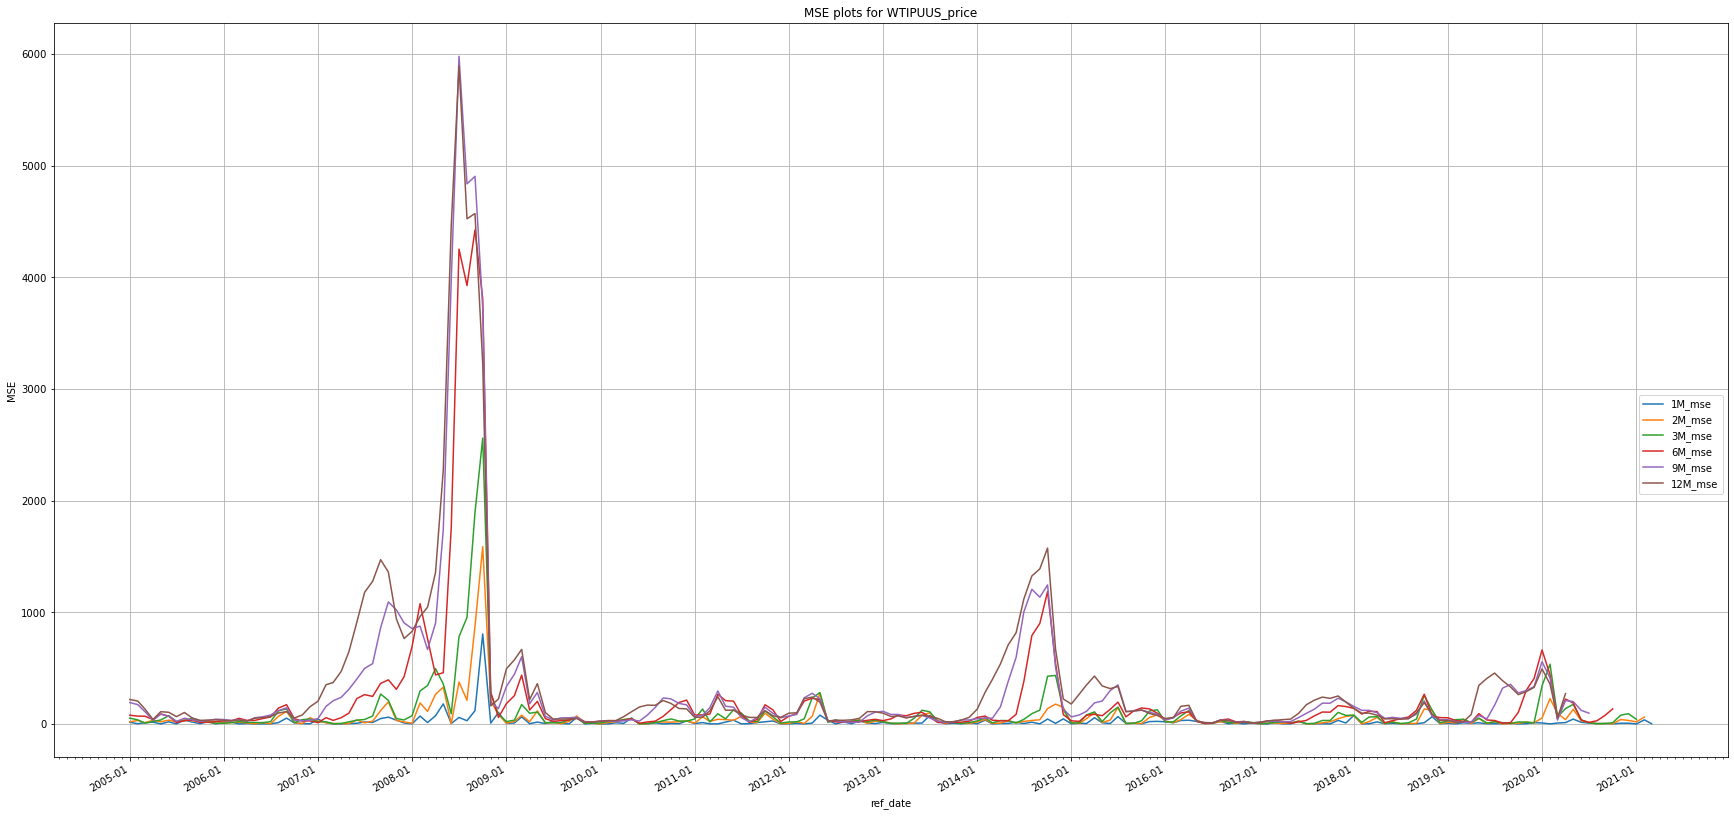




Plotting Evaluations for WTIPUUS_pct


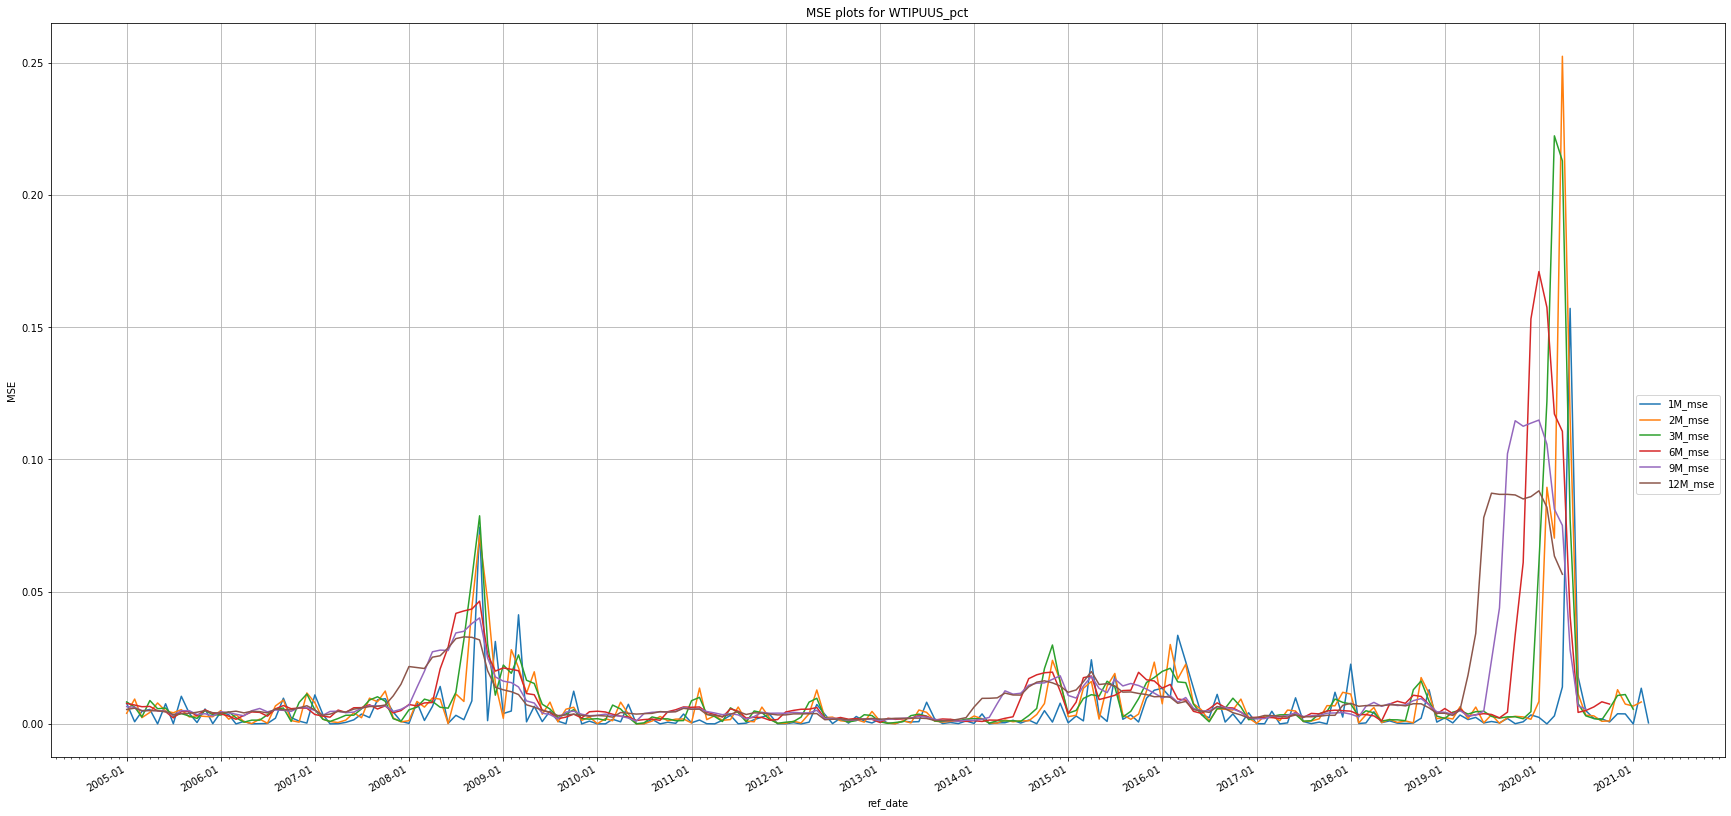




Plotting Evaluations for BREPUUS_price


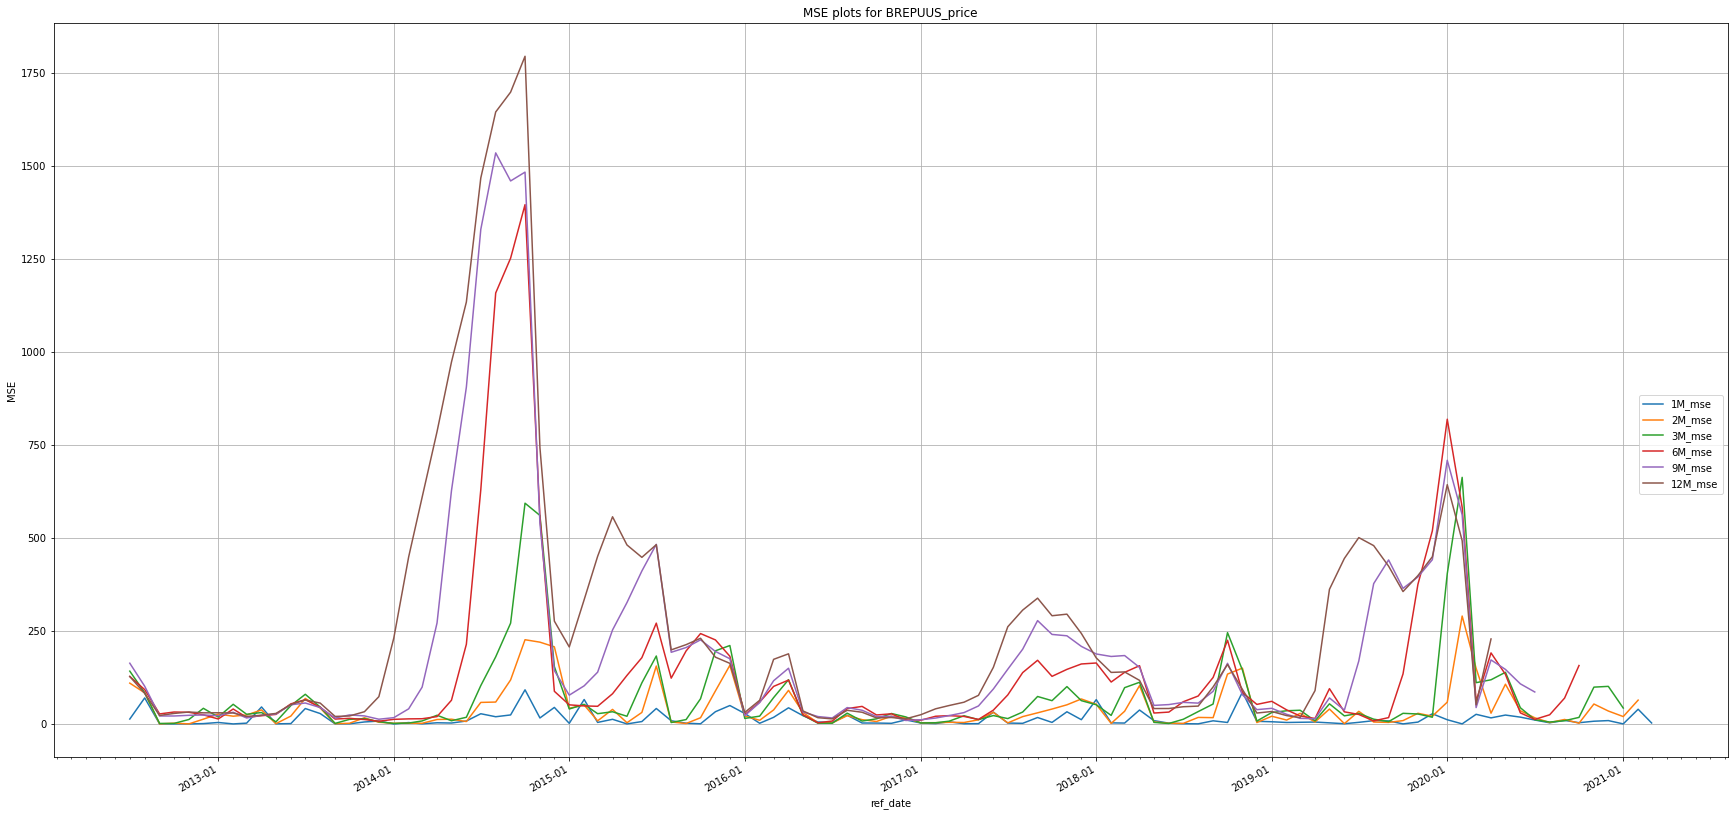




Plotting Evaluations for BREPUUS_pct


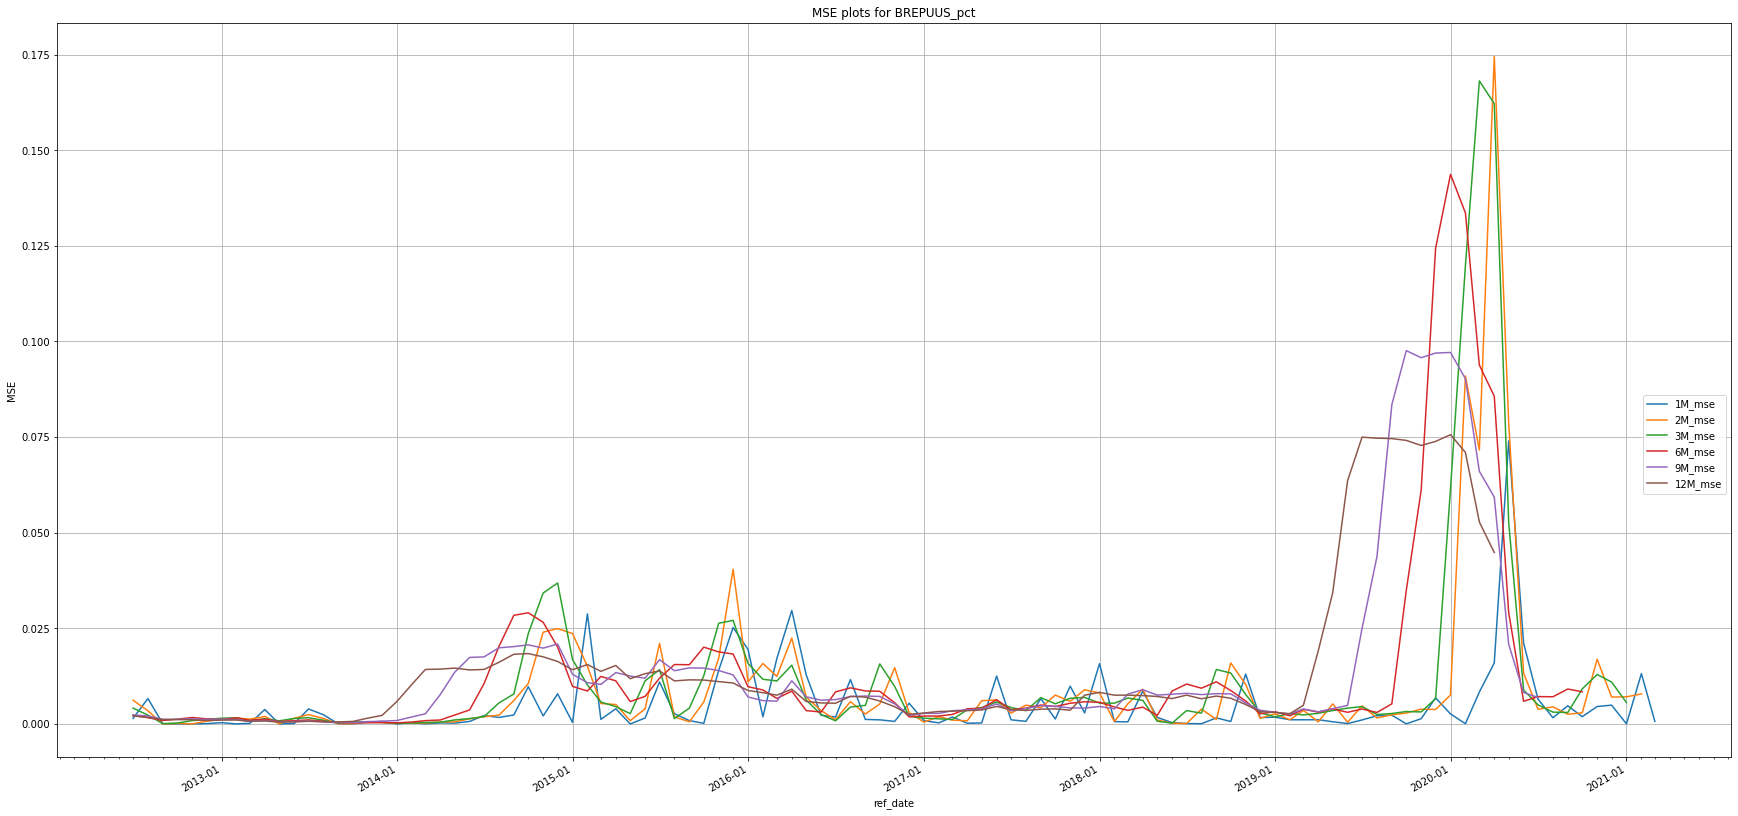




Plotting Evaluations for MGWHUUS_price


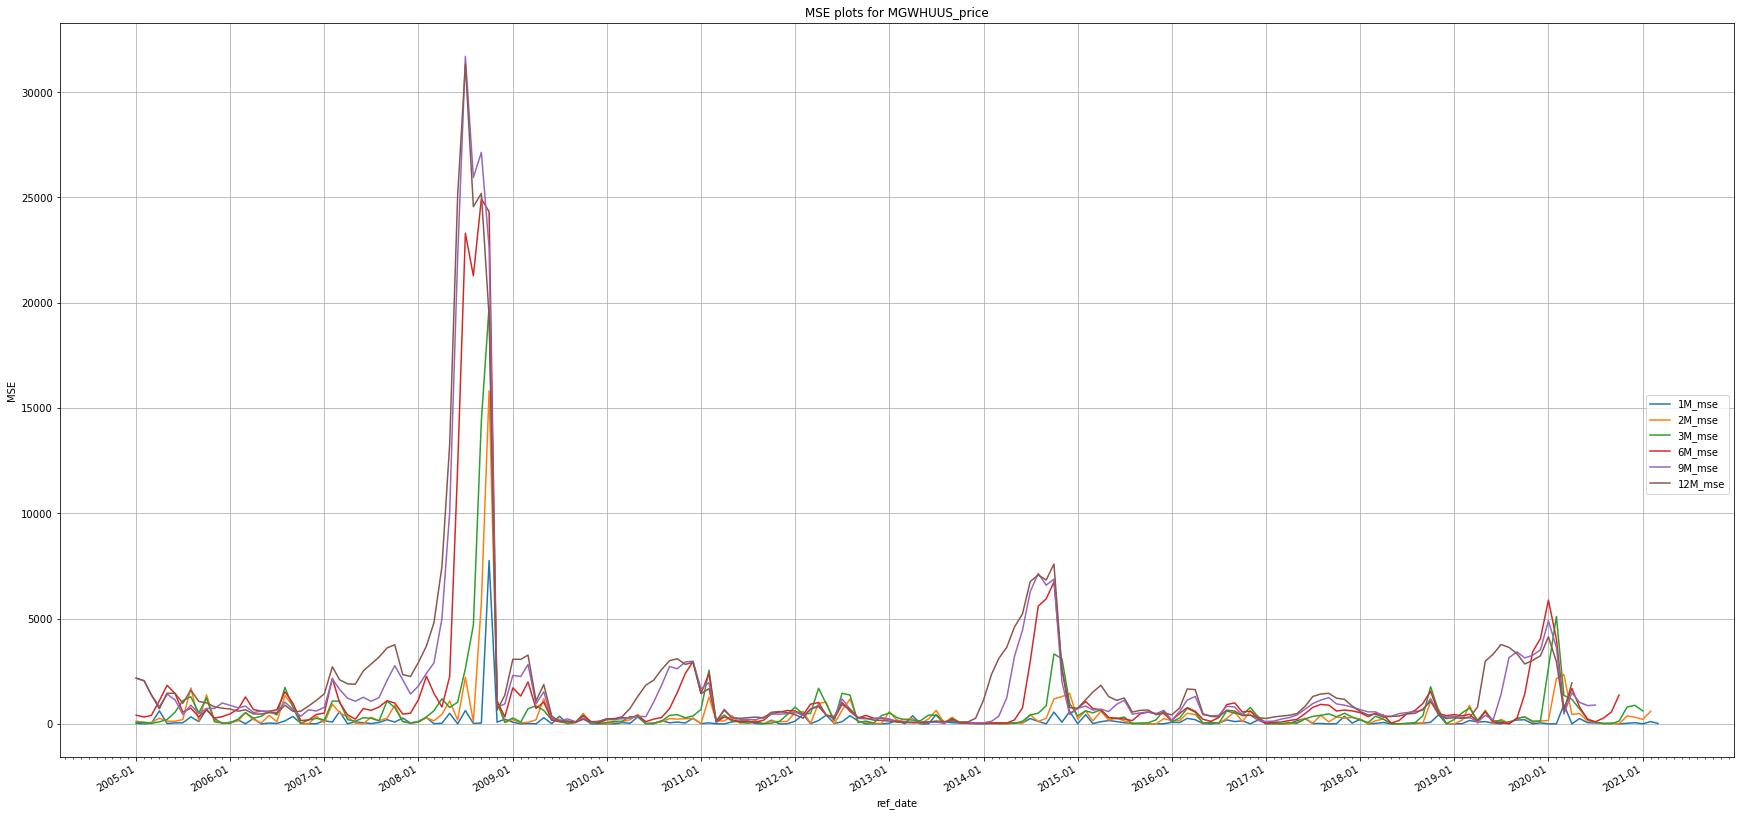




Plotting Evaluations for MGWHUUS_pct


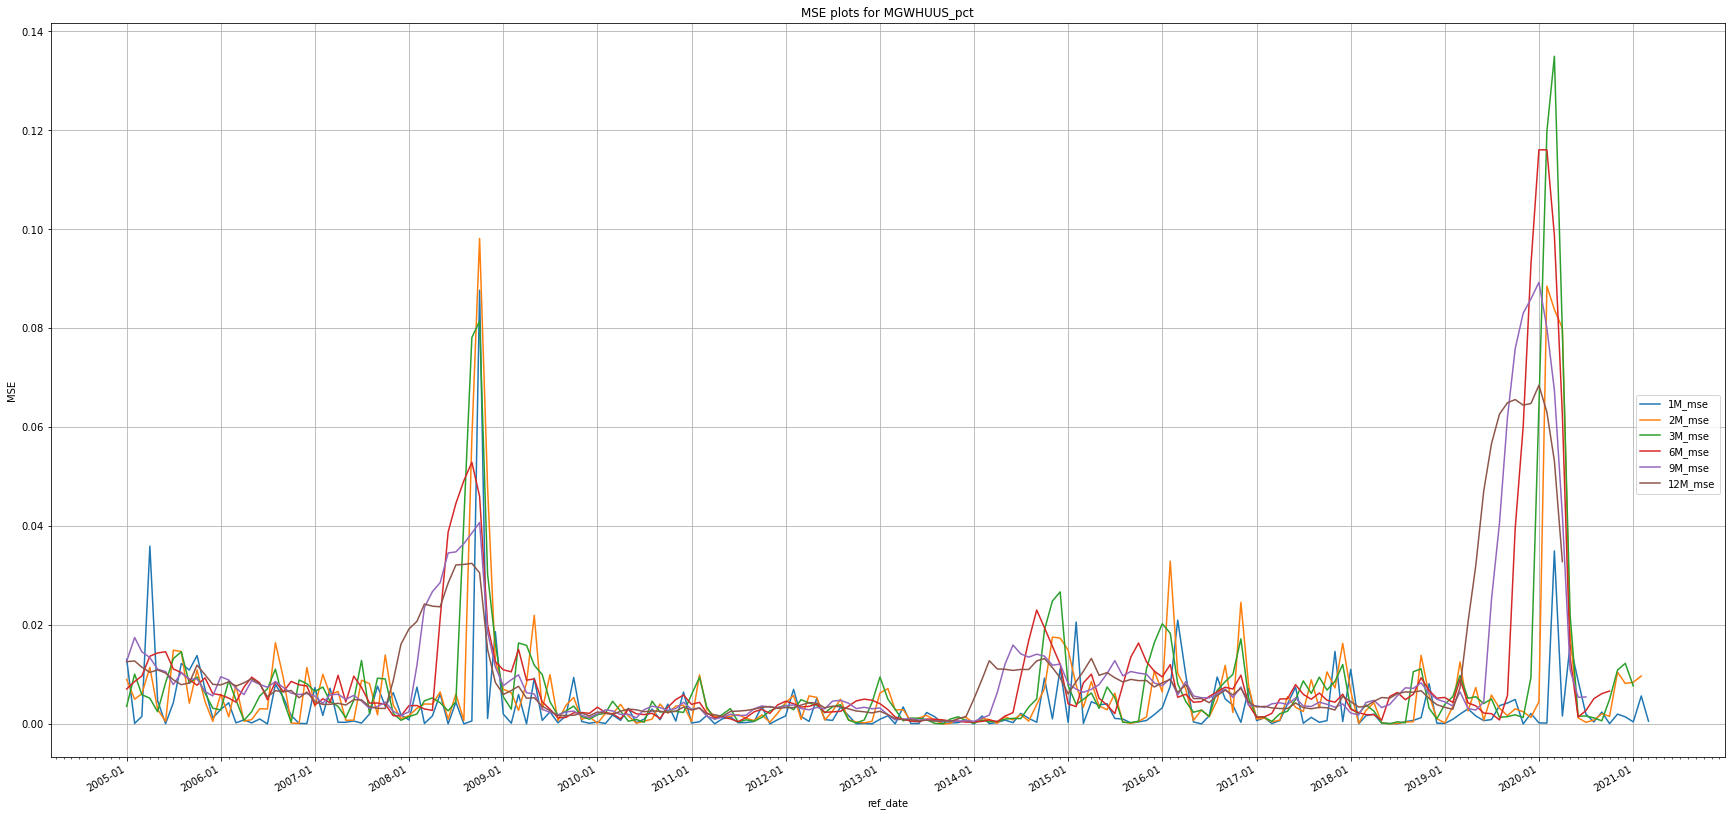




Plotting Evaluations for DSWHUUS_price


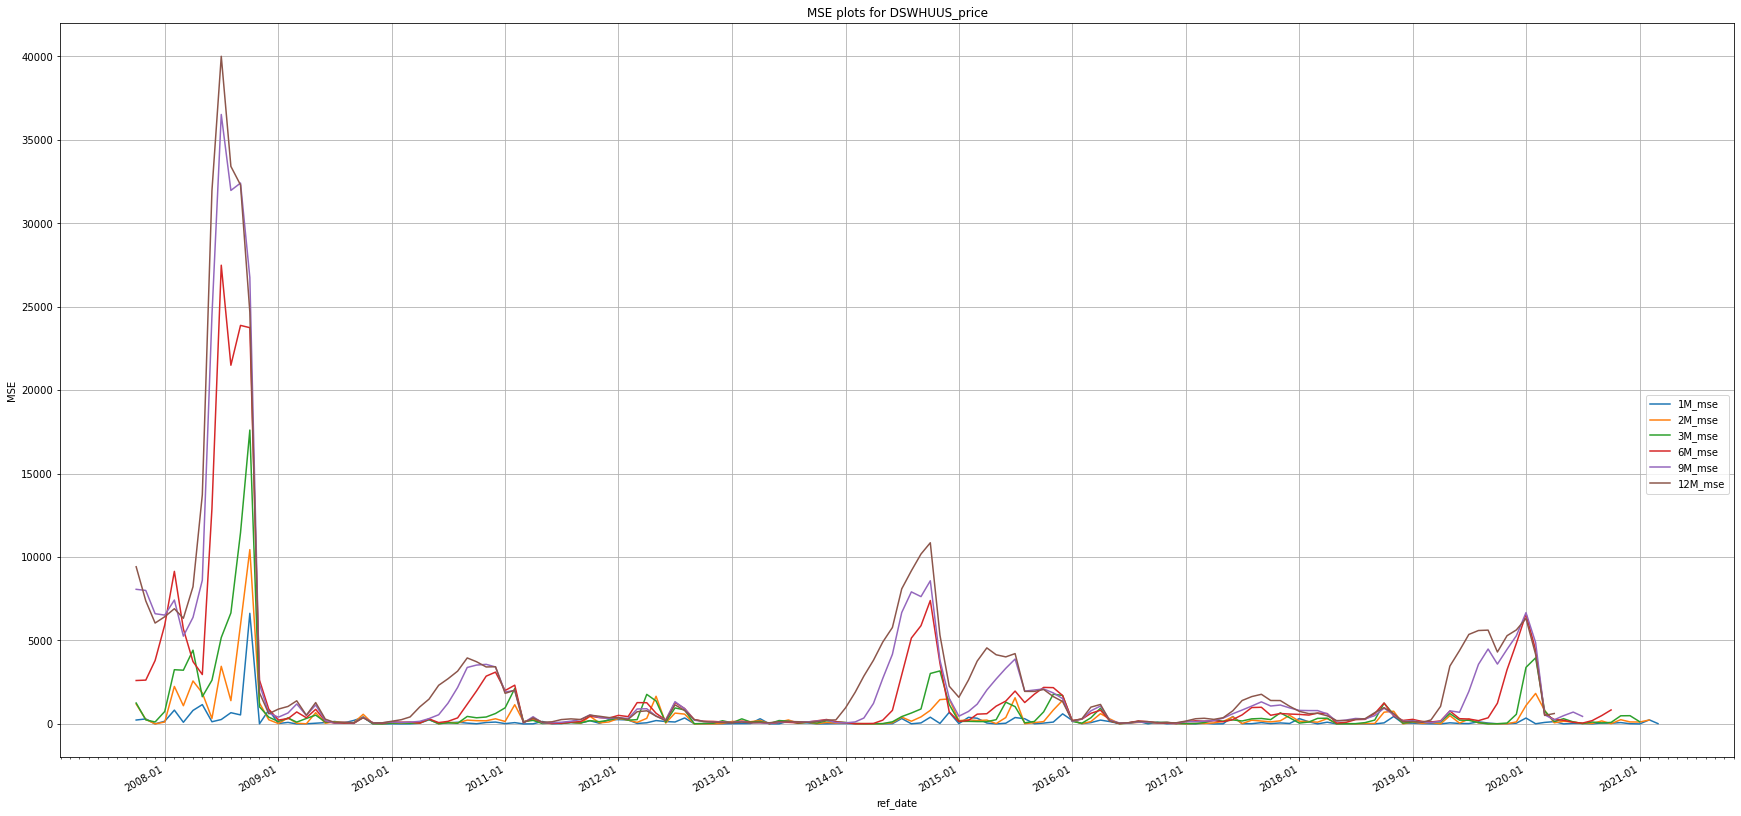




Plotting Evaluations for DSWHUUS_pct


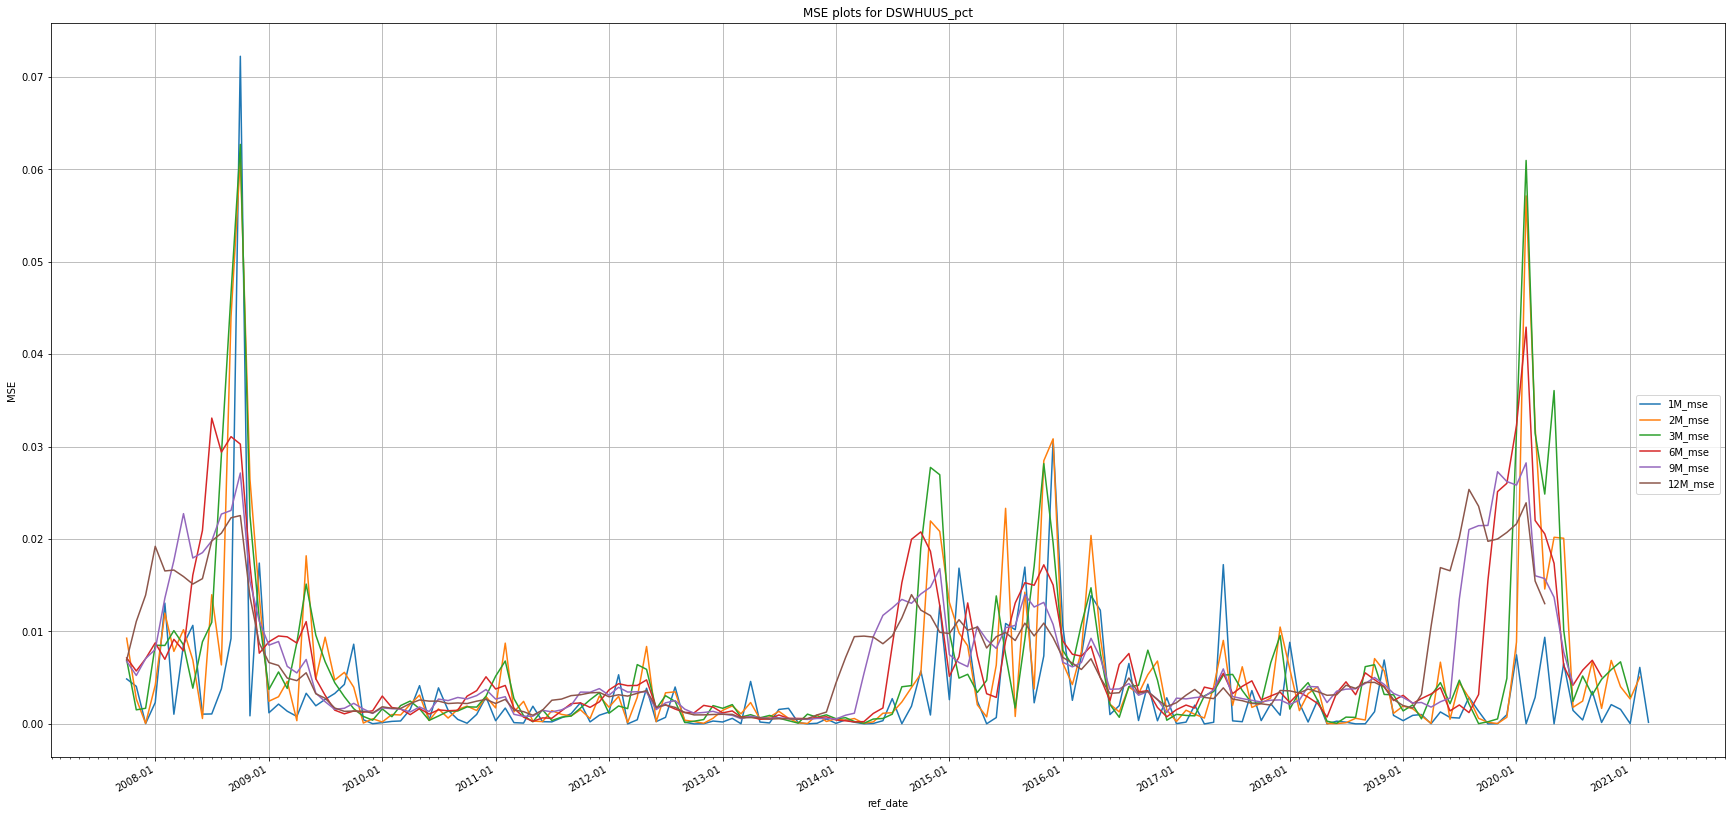




Plotting Evaluations for D2WHUUS_price


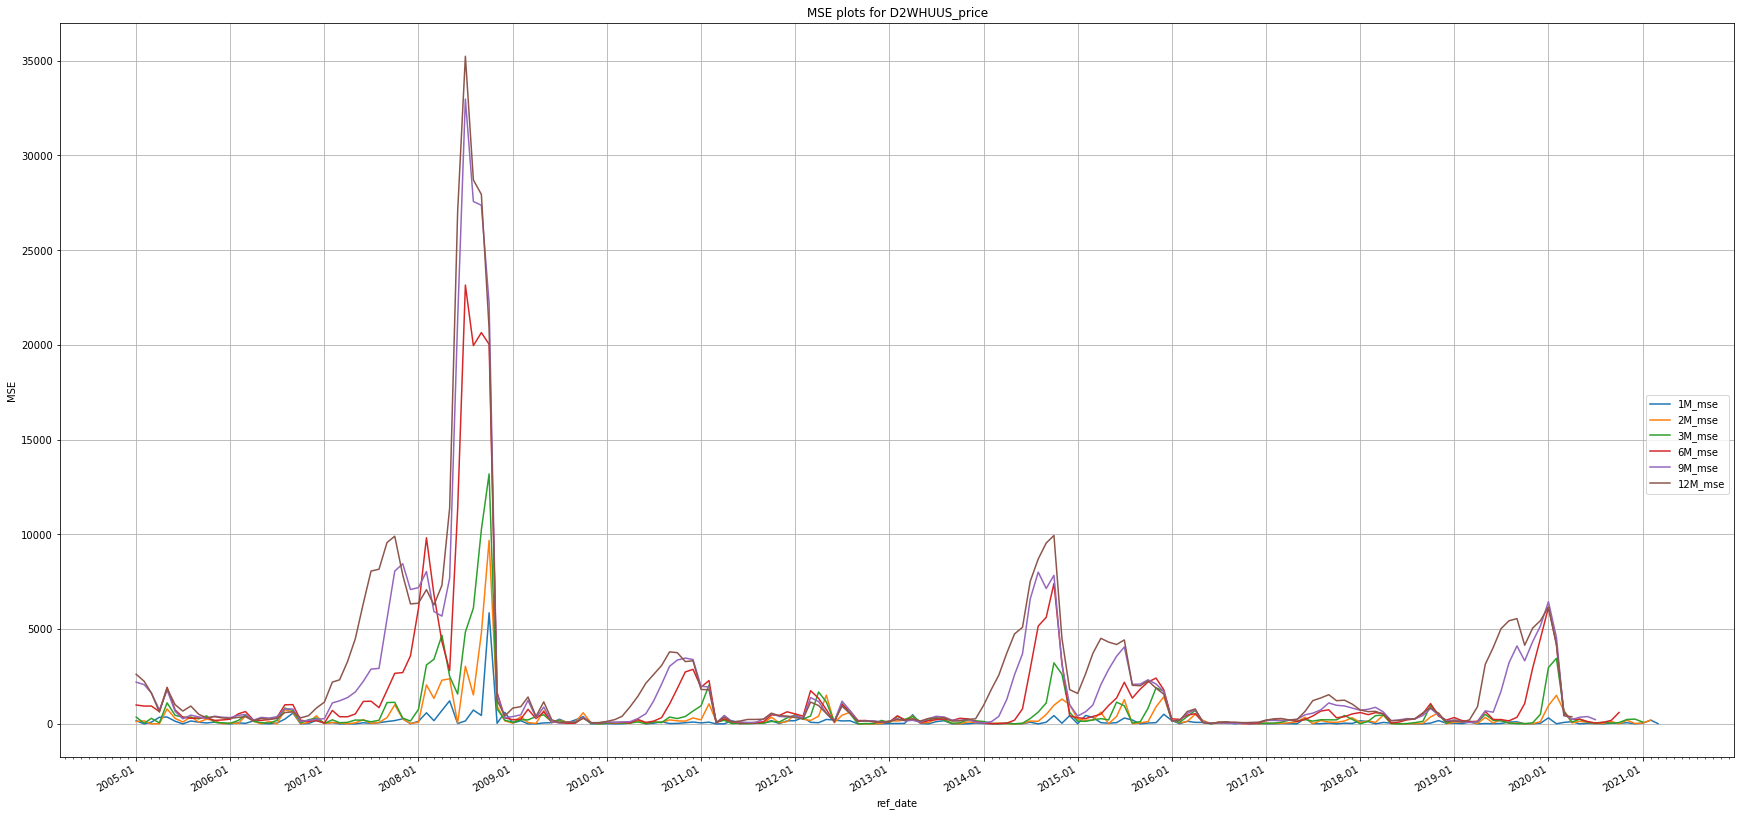




Plotting Evaluations for D2WHUUS_pct


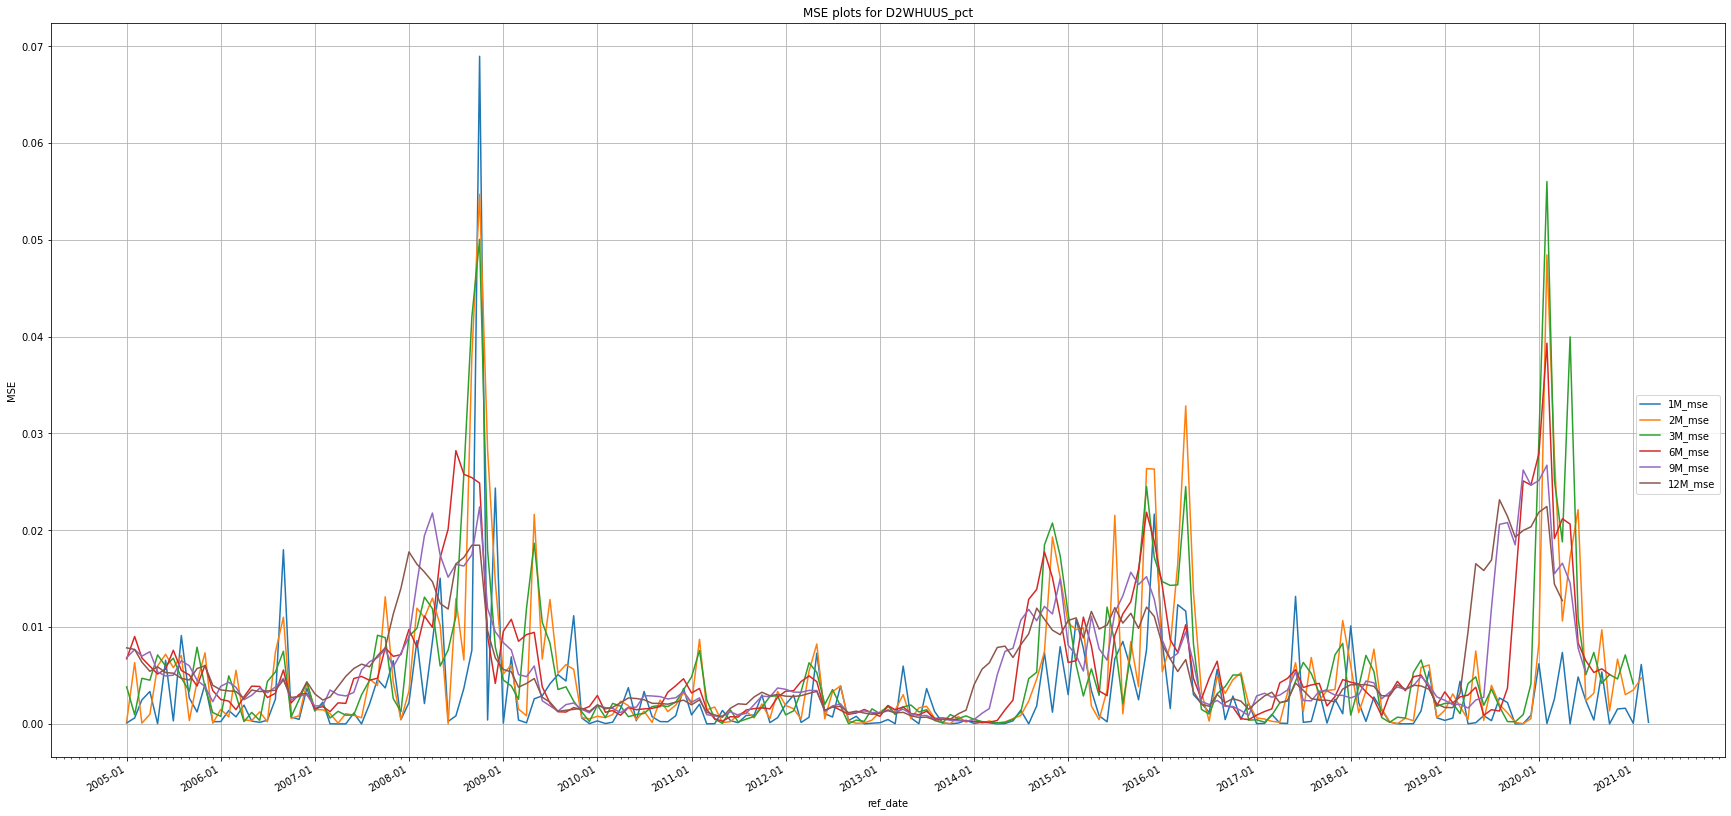




Plotting Evaluations for MGRARUS_price


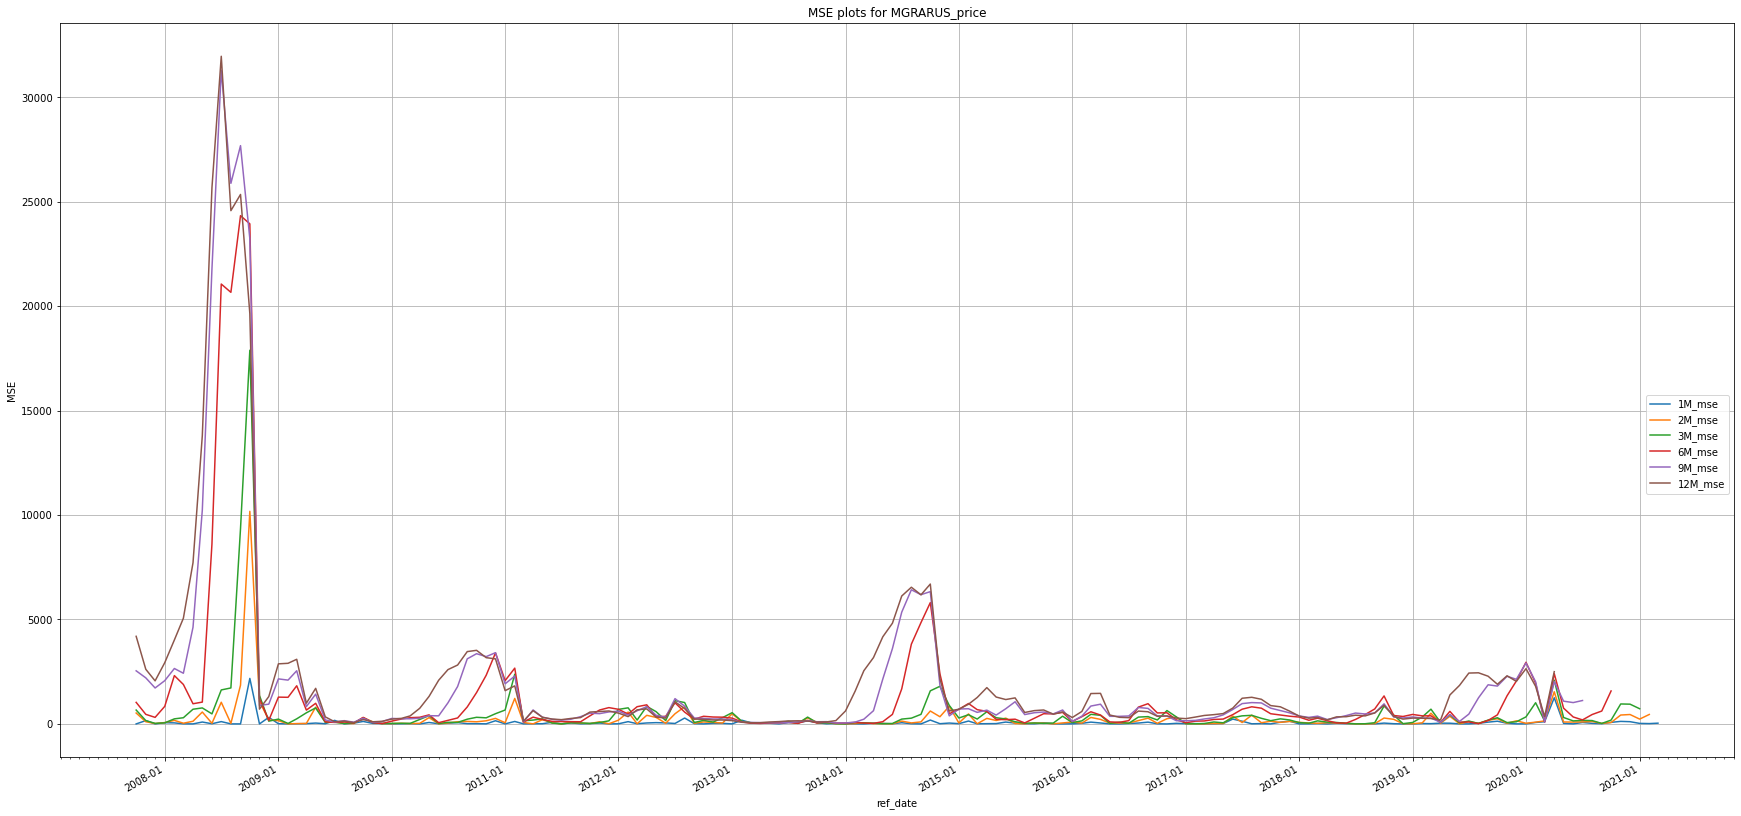




Plotting Evaluations for MGRARUS_pct


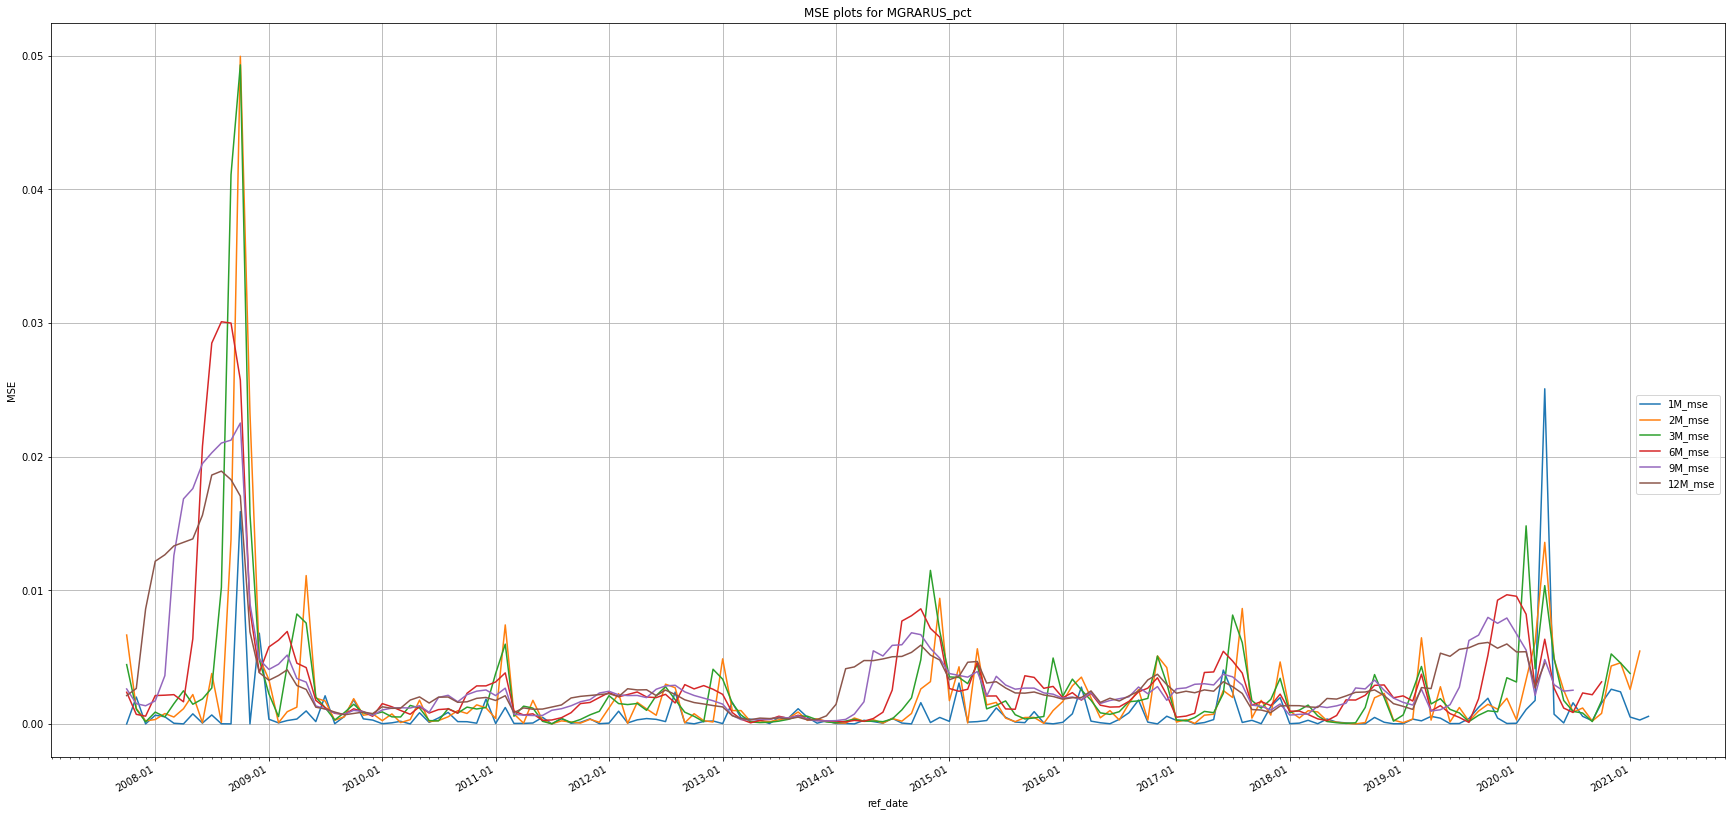




Plotting Evaluations for MGEIAUS_price


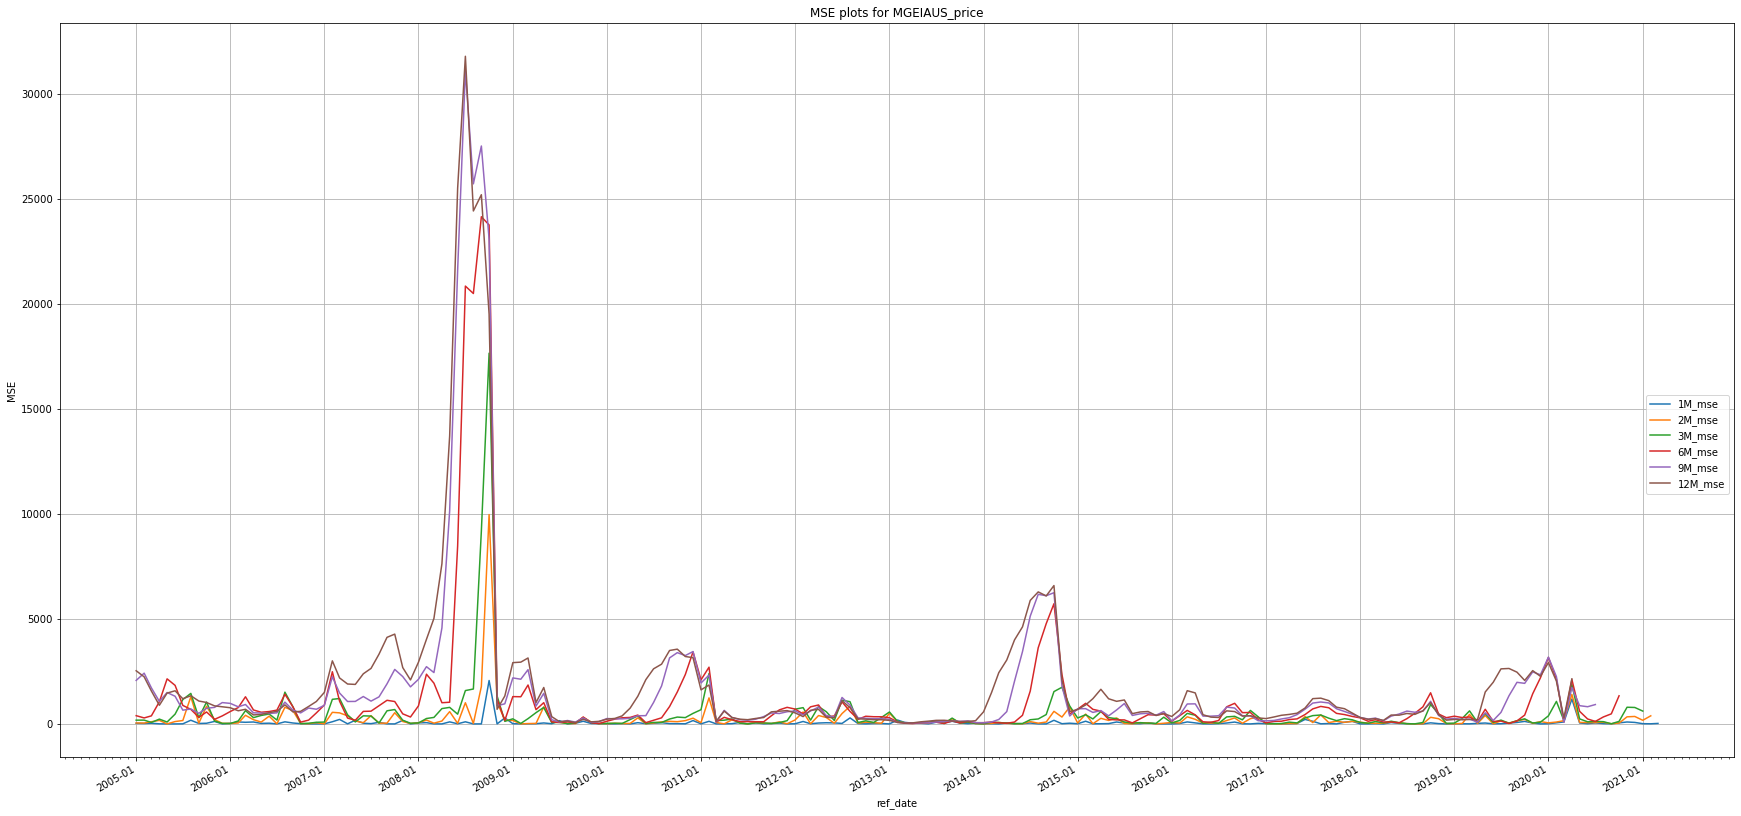




Plotting Evaluations for MGEIAUS_pct


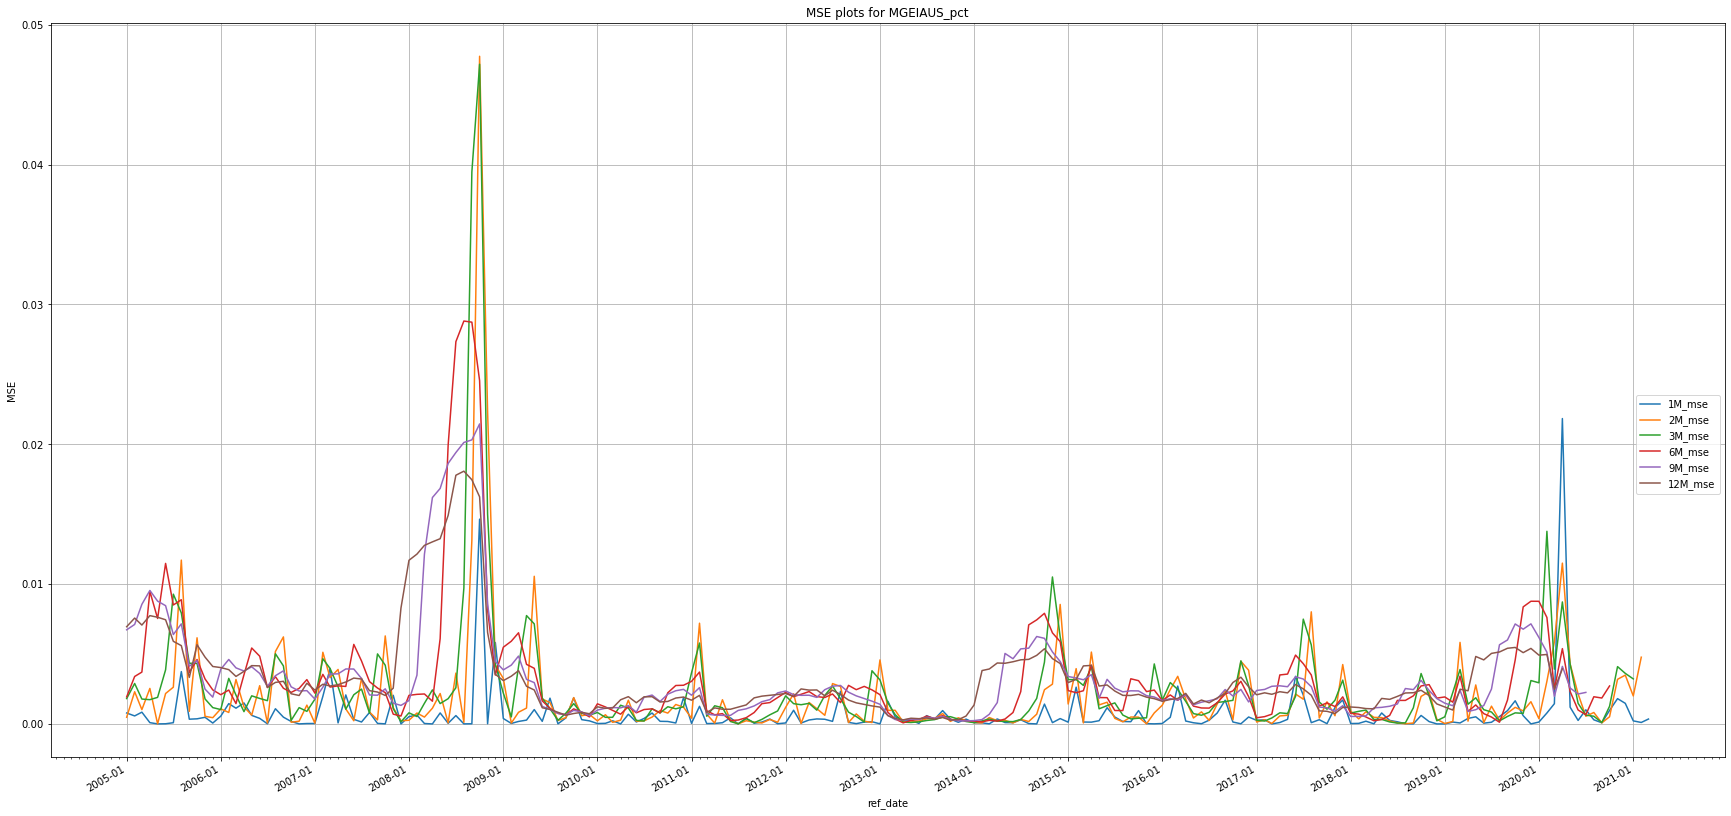




Plotting Evaluations for DSRTUUS_price


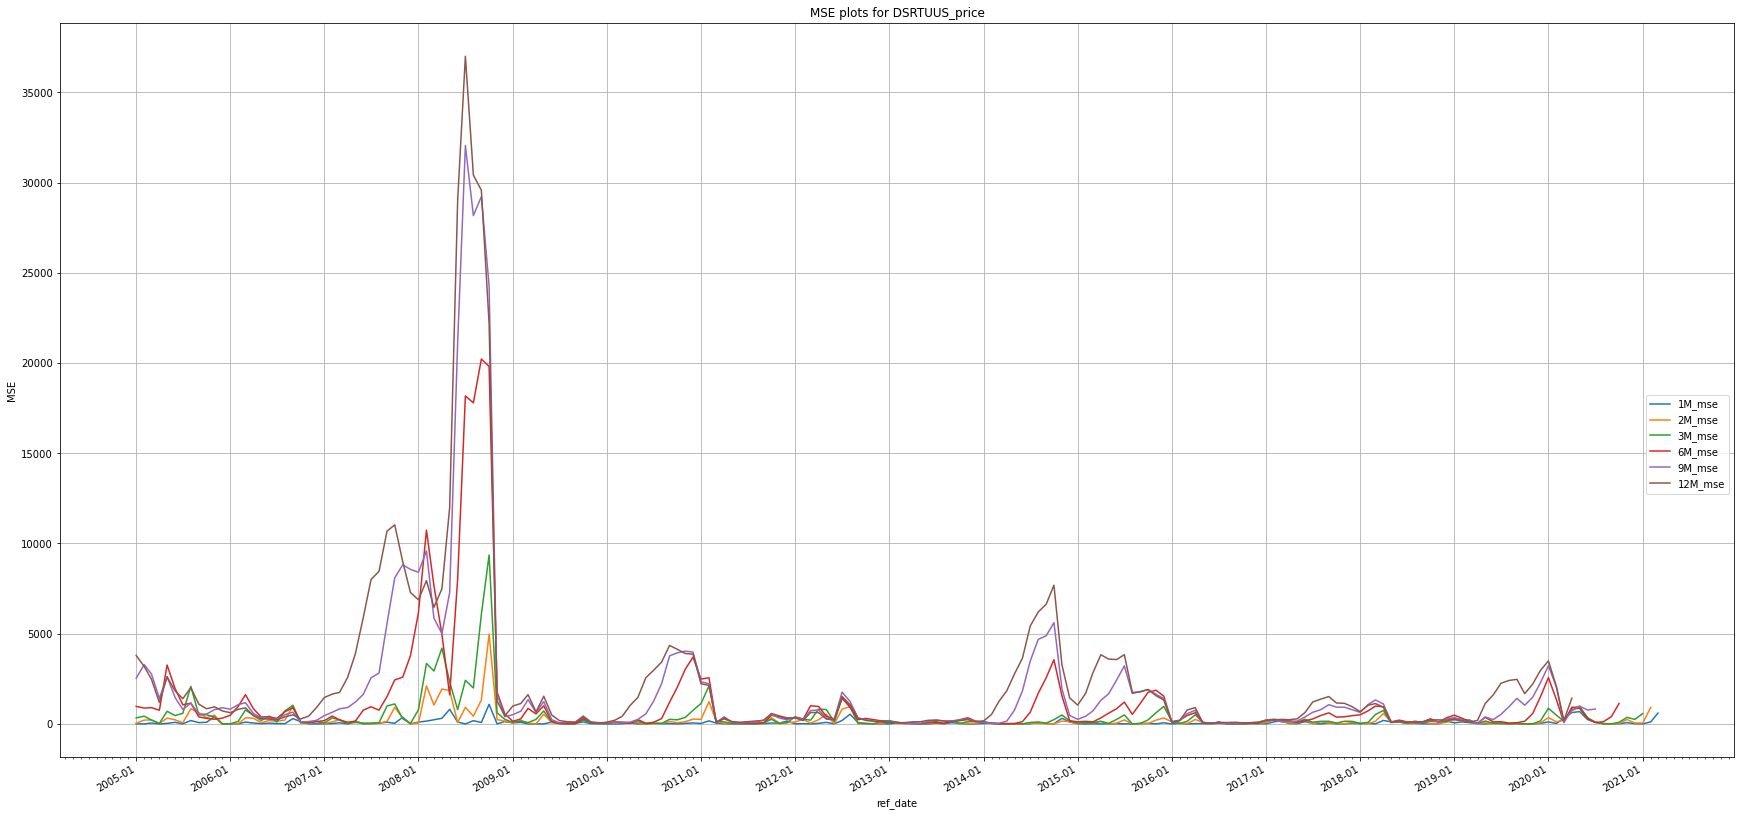




Plotting Evaluations for DSRTUUS_pct


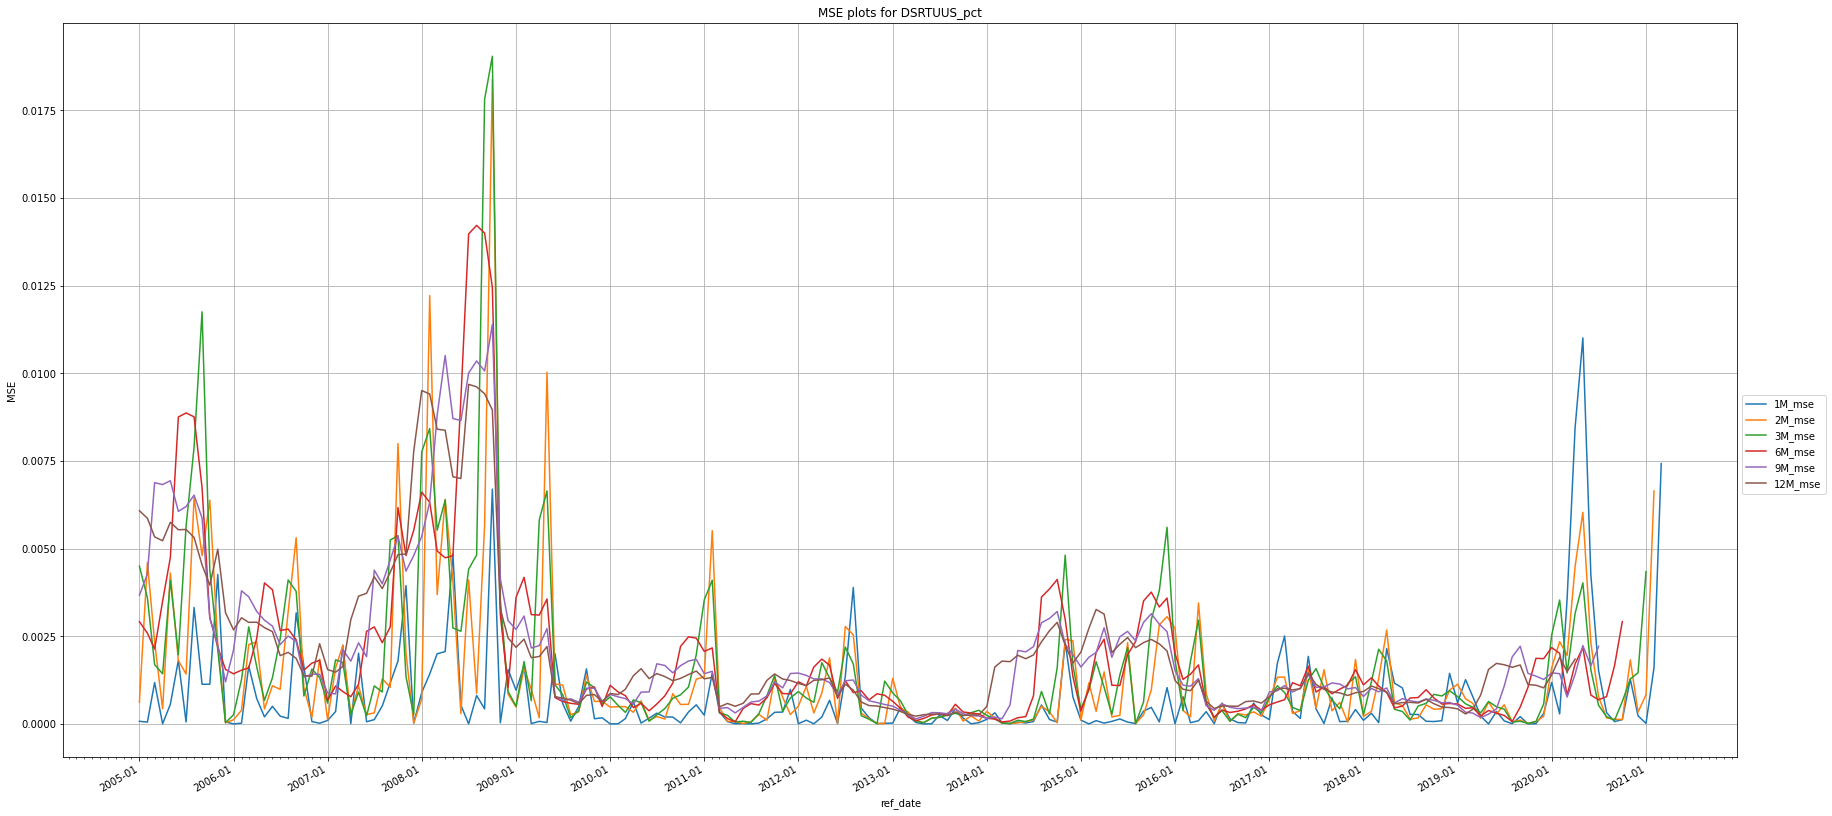




Plotting Evaluations for D2RCAUS_price


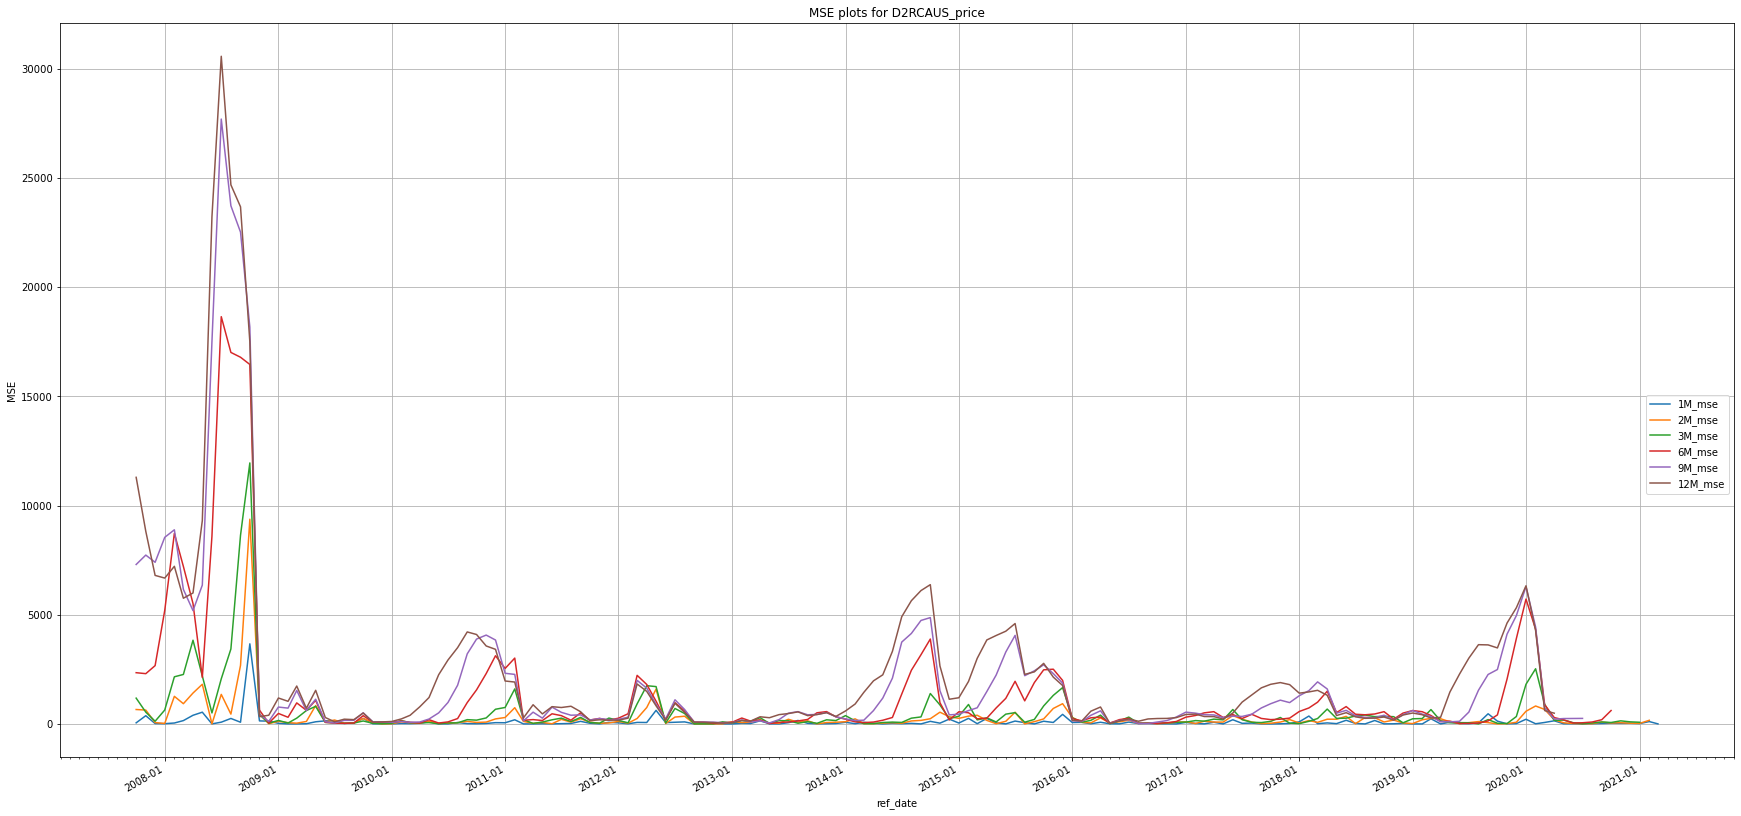




Plotting Evaluations for D2RCAUS_pct


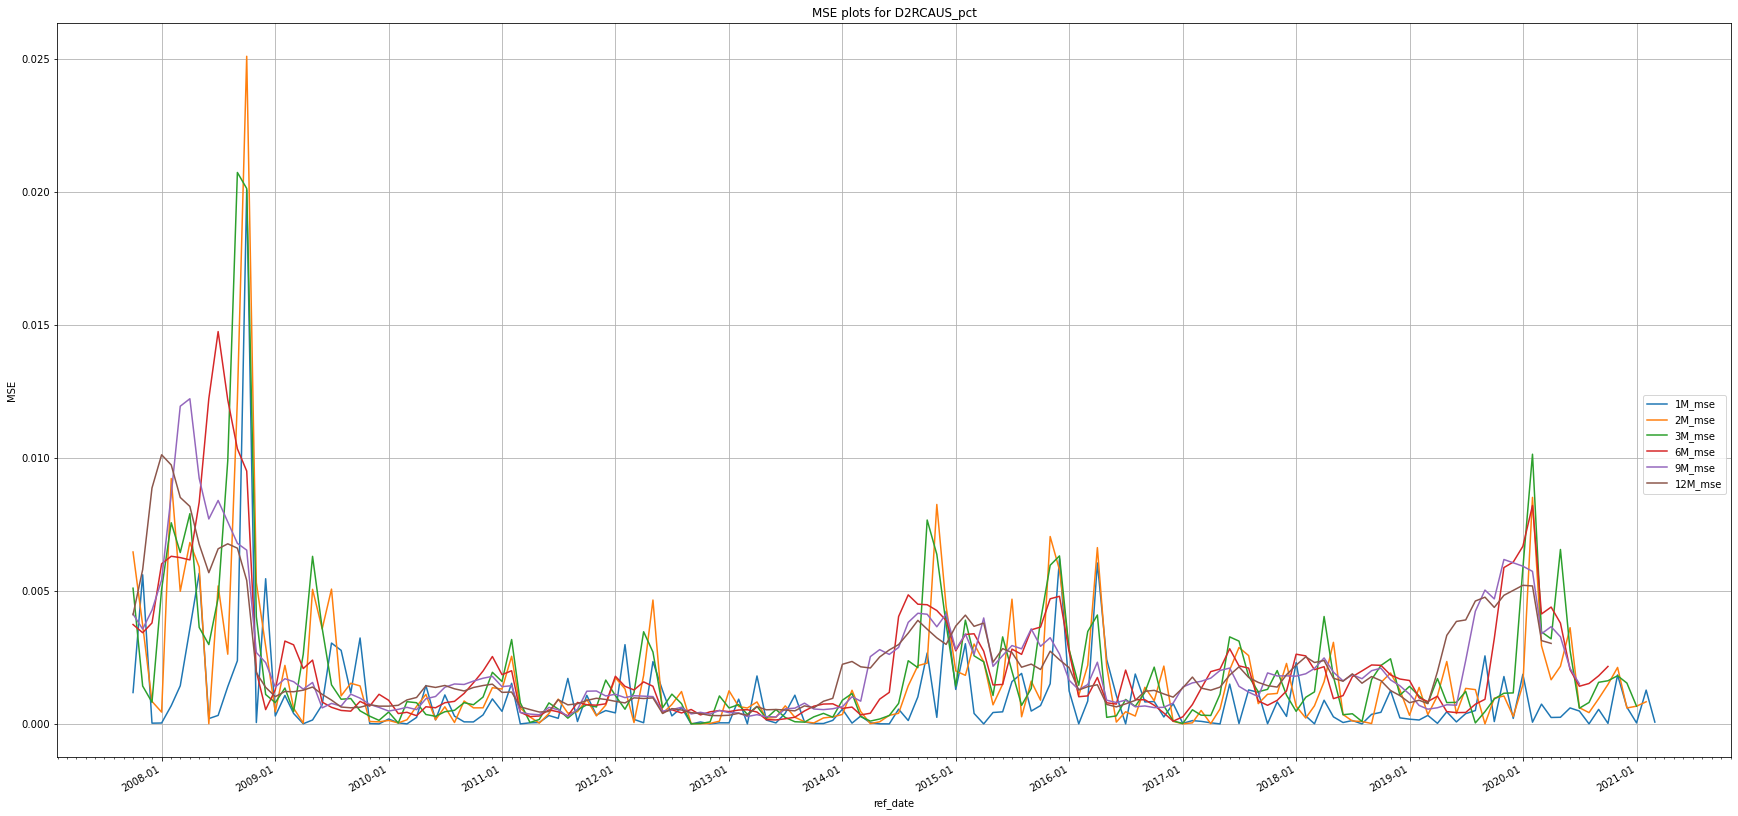




Plotting Evaluations for NGHHMCF_price


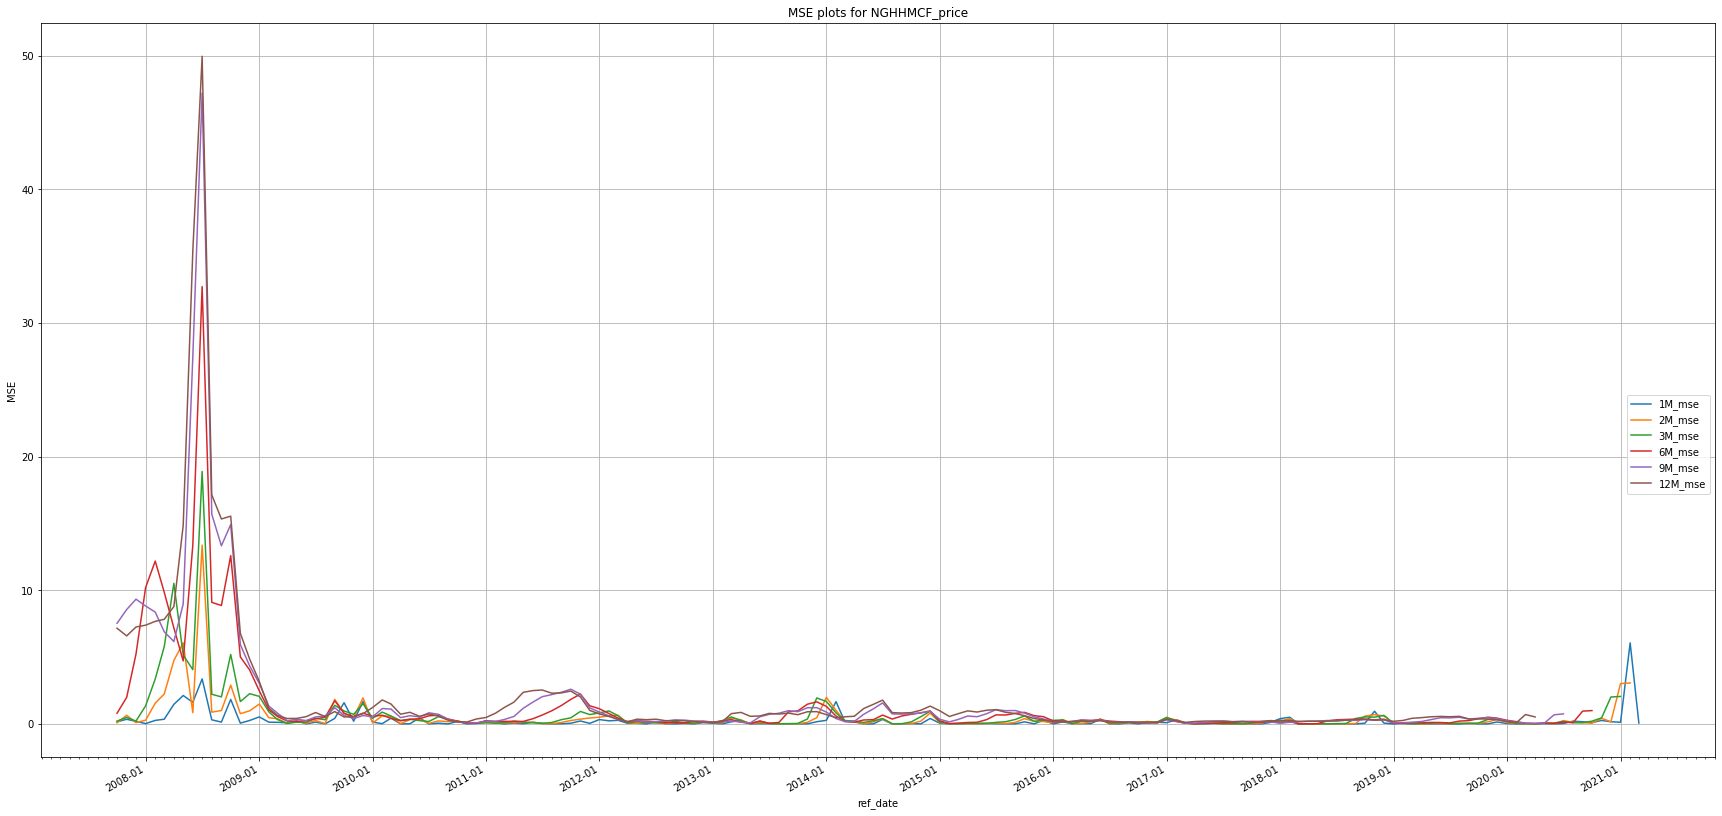




Plotting Evaluations for NGHHMCF_pct


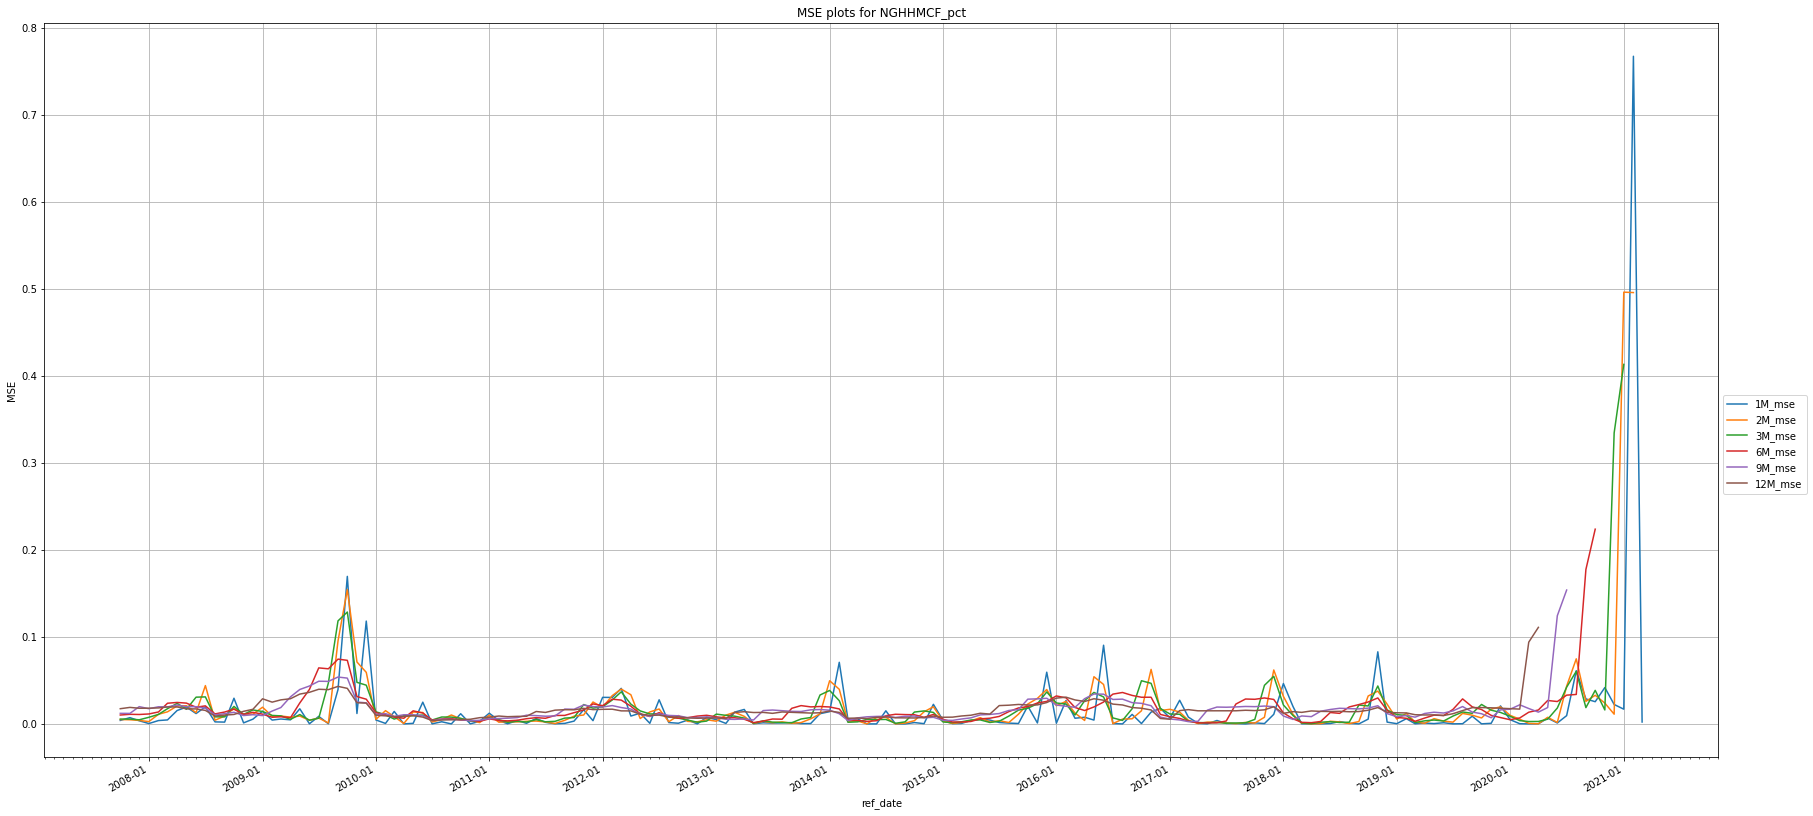




Plotting Evaluations for NGRCUUS_price


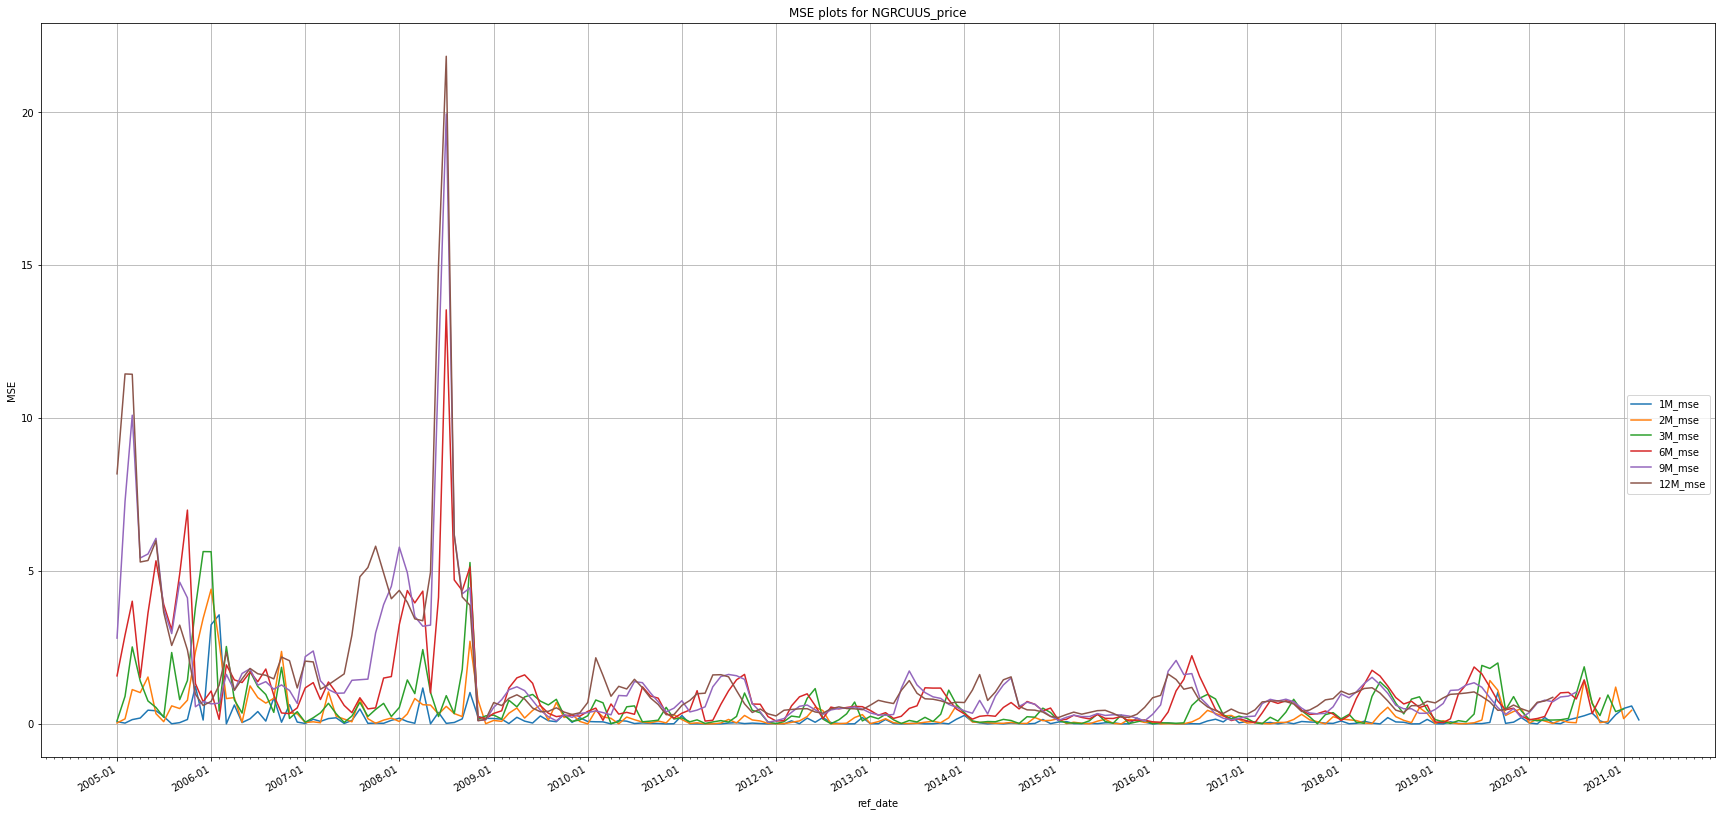




Plotting Evaluations for NGRCUUS_pct


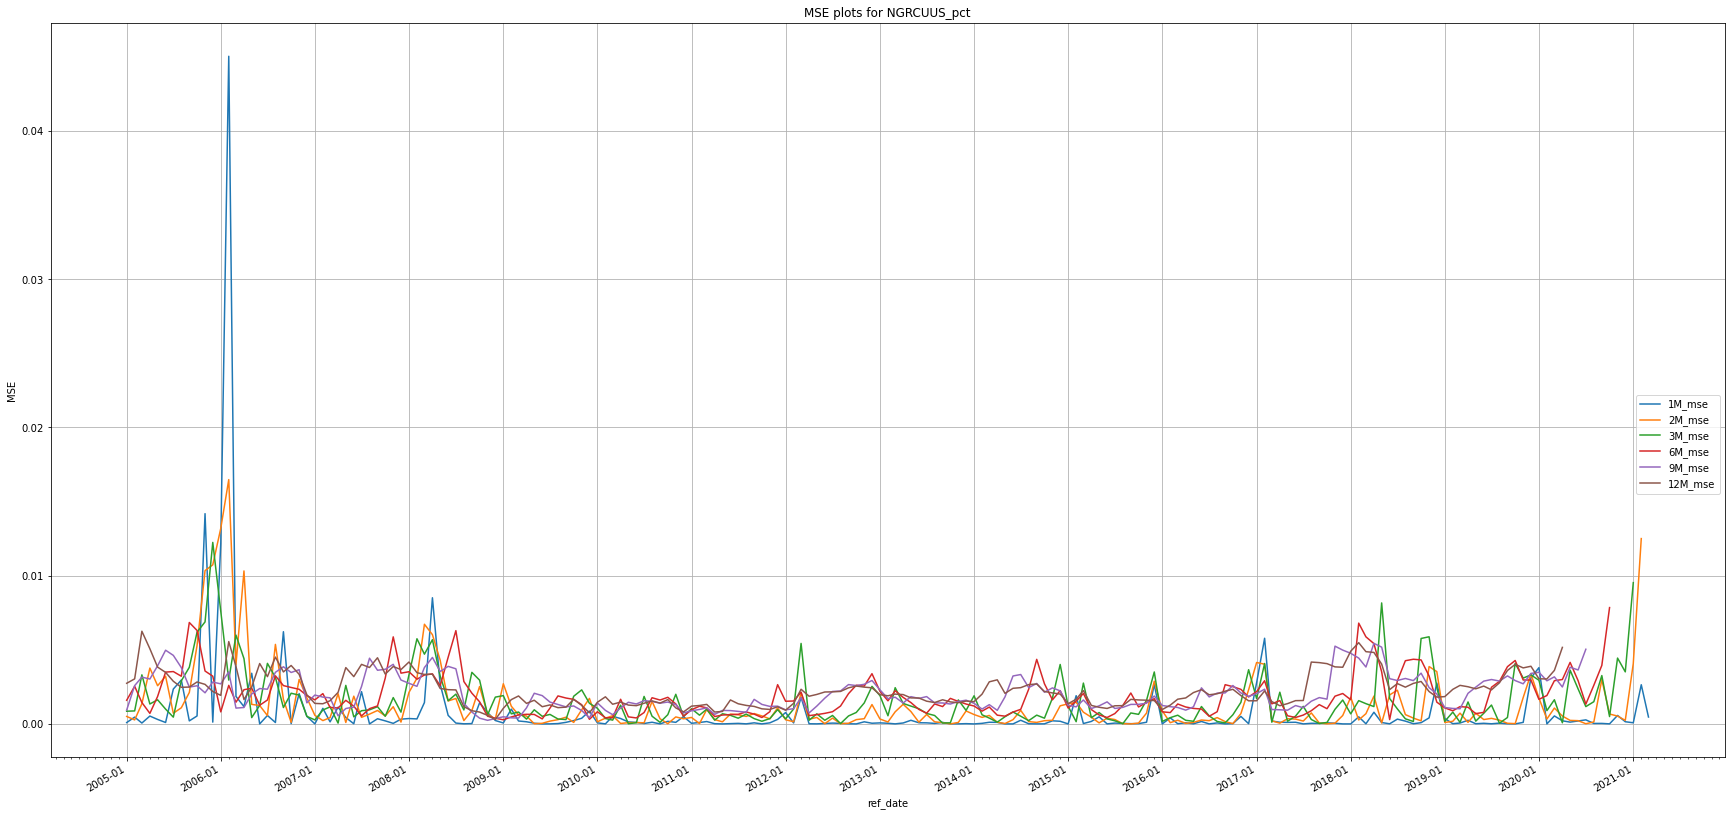




Plotting Evaluations for ESRCUUS_price


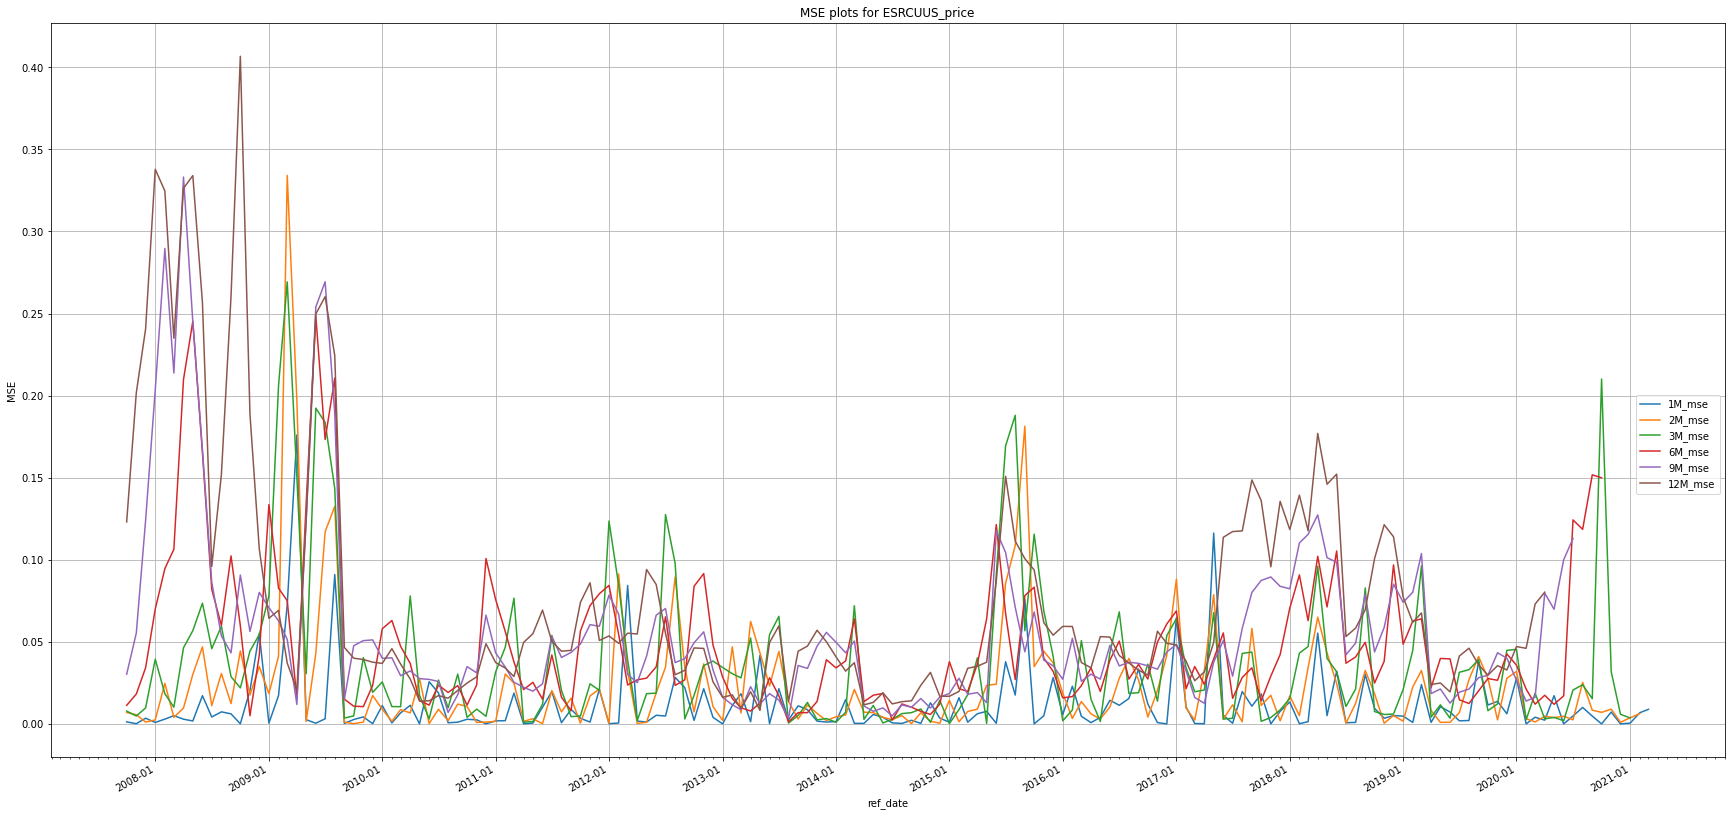




Plotting Evaluations for ESRCUUS_pct


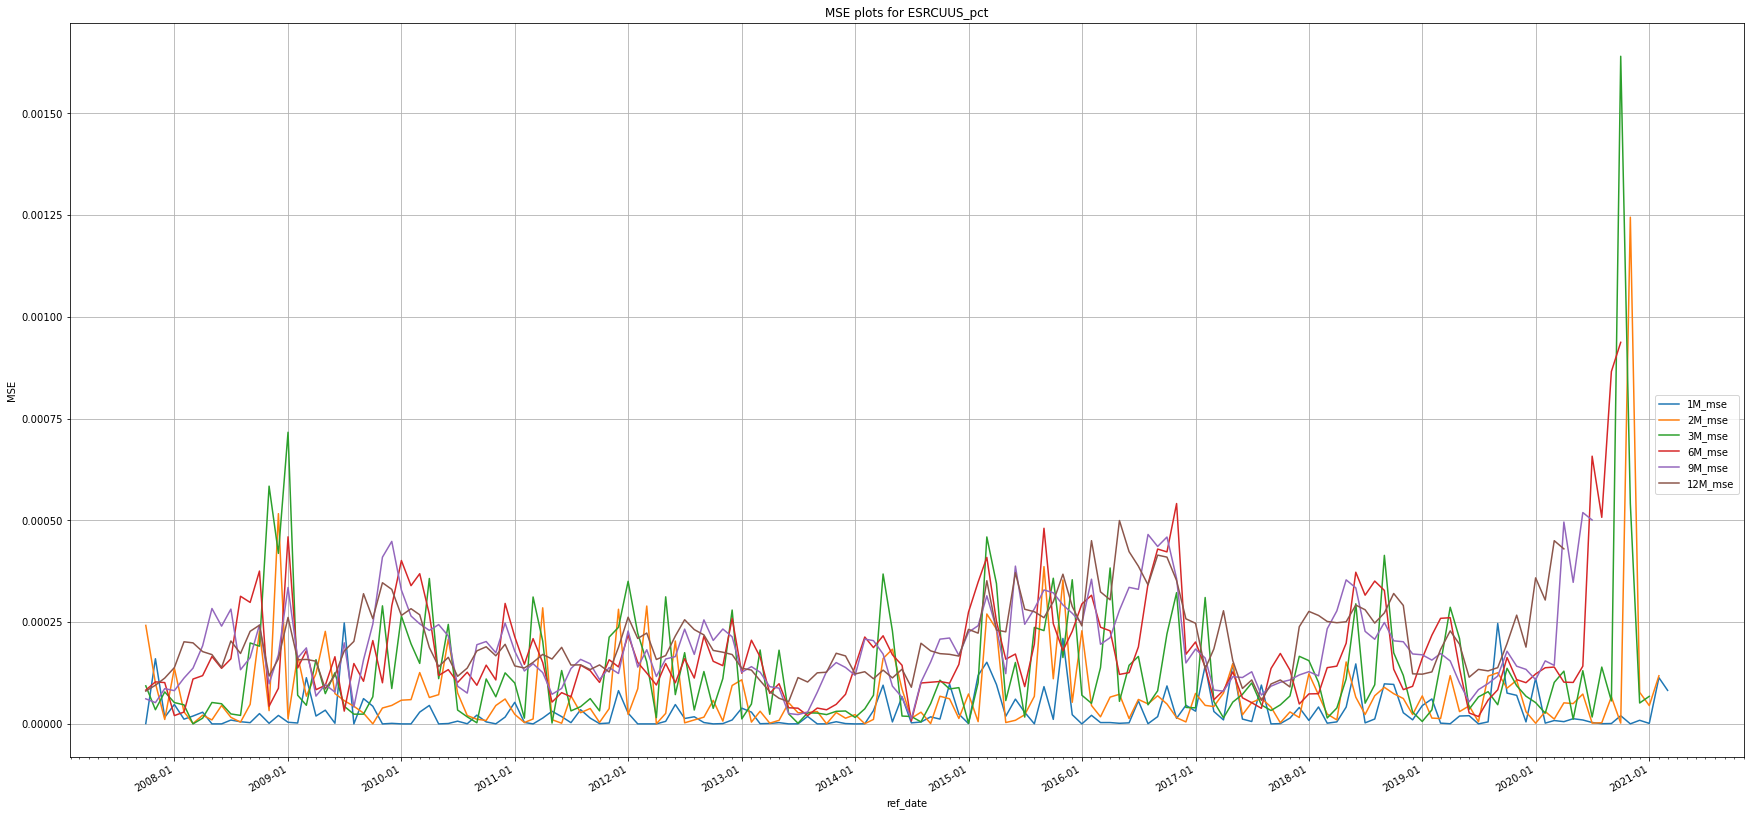

In [6]:
metrics = ["mse"]  # only choosing MSE
for (commod_id, commod_name), val_type in product(commods.items(), ("price", "pct")):
    print(f"Plotting Evaluations for {commod_id}_{val_type}")
    df = pd.read_csv(os.path.join(output_dir, "forecast_evals", f"{commod_id}_{val_type}.csv"))
    for metric in metrics:
        y_ax = [f"{x}M_{metric}" for x in time_horizons]
        line_plot_date(df, "ref_date", y_ax, f"{metric.upper()} plots for {commod_id}_{val_type}", ("ref_date", f"{metric.upper()}"), fig_size=(30, 15))